# Ottawa Tabular Collision Data 2015-2017 - #1# Create Geospatial Features - GeoPandas

# 1. Load Libraries and Define File Names

In [1]:
import sys
print(sys.executable)
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
from shapely.strtree import STRtree
import shapely.speedups
import numpy as np

import fiona
import matplotlib.cm as cm
import matplotlib.colors as colors
import math 

import datetime
import time


basedir = 'C:\\Users\\Enrique\\PycharmProjects\\TestGeopandas'
os.chdir(basedir)

roads_file = basedir + '\\Tabular Data 2015-2015 shapefiles\\Ottawa Road Segments Opendata.shp'
boundaries_file = basedir + '\\Tabular Data 2015-2015 shapefiles\\Ottawa ONS Boundaries.shp'
boundaries_file_noz = basedir + '\\Tabular Data 2015-2015 shapefiles\\Ottawa ONS Boundaries no Z coordinates.shp'
collision_data_intersections_file = basedir + '\\Tabular Data 2015-2015 shapefiles\\Ottawa Intersection Tabular Collision Data 2015-2017 .shp'
collision_data_file = basedir + '\\Tabular Data 2015-2015 shapefiles\\Ottawa Tabular Collision Data 2015-2017.shp'
collision_data_nonintersections_file = basedir + '\\Tabular Data 2015-2015 shapefiles\\Ottawa Non-intersection Tabular Collision Data 2015-2017 .shp'
city_limits_tiles = basedir + '\\Tabular Data 2015-2015 shapefiles\\Ottawa City Limits Tiles.shp'

C:\Users\Enrique\Anaconda3\envs\Test2\python.exe


# 2. Load Ottawa Boundaries Shapefile

In [2]:
boundaries = gpd.read_file(boundaries_file_noz, index = 'ROW_NUMBER')

boundaries.info()
boundaries

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
Name          108 non-null object
Cen2011POP    108 non-null int64
ONS_ID        108 non-null int64
ROW_NUMBER    108 non-null int64
geometry      108 non-null object
dtypes: int64(3), object(2)
memory usage: 4.3+ KB


Name  Cen2011POP  ONS_ID  \
0                                   Orleans Industrial         144      77   
1                                   Beechwood Cemetery         451       5   
2                                  Notre-Dame Cemetery         375      71   
3                                  Carleton University           0      17   
4                                 Lebreton Development         370      60   
5                                            Barrhaven       17250       1   
6                                  Bayshore - Belltown        8060       2   
7                 Beacon Hill South - Cardinal Heights        7305       3   
8                                          Beaverbrook        5180       4   
9                                   Bells Corners East        5110       6   
10                                  Bells Corners West        4355       7   
11                        Billings Bridge - Alta Vista       11880       8   
12                                    Blackburn Hamlet        8260       9   
13   Borden Farm - Stewart Farm - Parkwood Hills - ...       10135      10   
14      Braemar Park - Bel Air Heights - Copeland Park        6810      11   
15                           Briar Green - Leslie Park        5520      12   
16                        Bridlewood - Emerald Meadows       21250      13   
17                                           Britannia        7820      14   
18                                       Byward Market        4835      15   
19                       Carleton Heights - Rideauview        6900      16   
20                                          Carlington       10335      18   
21   Carlingwood West - Glabar Park - McKellar Heights        5375      19   
22                                                Carp        5960      20   
23                                          Carp Ridge         435      21   
24                       Carson Grove - Carson Meadows        7875      22   
25                                        Centrepointe        7555      23   
26                                          Centretown       25660      24   
27                                   Wateridge Village        5430      25   
28     Chapman Mills - Rideau Crest - Davidson Heights       17830      26   
29                  Cityview - Crestview - Meadowlands        8730      31   
..                                                 ...         ...     ...   
78                                  Queenswood Heights       12355      79   
79                       Orleans Village - Chateauneuf       13105      80   
80                                    Osgoode - Vernon        5160      81   
81                                Overbrook - McArthur       11590      84   
82                                         Marlborough        1870      85   
83                                            Pineview        6160      86   
84      Playfair Park - Lynda Park - Guildwood Estates        5975      87   
85                             Qualicum - Redwood Park        4340      88   
86                                            Richmond        7430      89   
87                                      Riverside Park        4565      90   
88                           Riverside South - Leitrim       15270      91   
89                                     Rockcliffe Park        5320      92   
90                Rothwell Heights - Beacon Hill North       10695      93   
91                                   Russell - Edwards        2640      94   
92                                          Sandy Hill       11220      95   
93                                           Sarsfield        1275      96   
94                            Skyline - Fisher Heights        6545      27   
95                         South Keys - Greenboro West        4140      97   
96                                         Stittsville       26635      98   
97                                          Tanglewood        4895      

## 2.1 Plot the Map

In [3]:
print("\n=== CRS:" + str(boundaries.crs))
#boundaries.plot(cmap='tab20b', figsize =(15.0,15.0), column = 'Name', legend = True)
boundaries.plot(cmap='tab20b', figsize =(15.0,15.0), column = 'Name')


=== CRS:{'proj': 'tmerc', 'lat_0': 0, 'lon_0': -76.5, 'k': 0.9999, 'x_0': 304800, 'y_0': 0, 'datum': 'NAD83', 'units': 'm', 'no_defs': True}


## 2.2 Plot the Map of Carleton University Area

In [4]:
carleton = boundaries[boundaries['Name'] == 'Carleton University']
carleton.reset_index(drop=True, inplace=True)
carleton.head()

Name  Cen2011POP  ONS_ID  ROW_NUMBER  \
0  Carleton University           0      17           4   

                                            geometry  
0  POLYGON ((368246.3728 5027514.7599, 368277.463...

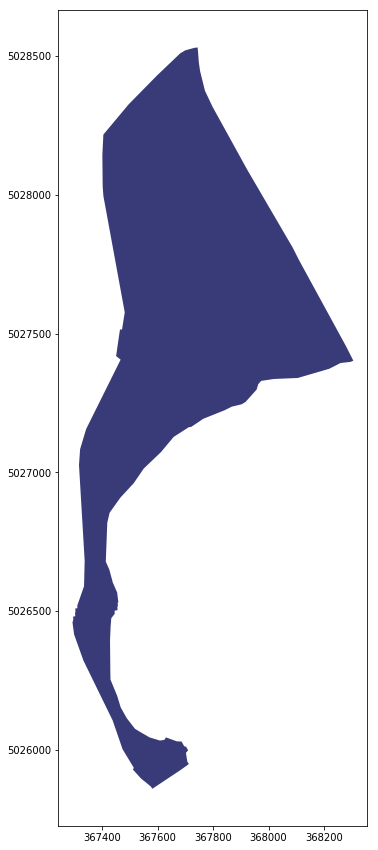

In [5]:
carleton.plot(cmap='tab20b', figsize =(15.0,15.0), color = 'red')

## 2.3 Plot the Map of Carleton University over Ottawa Map

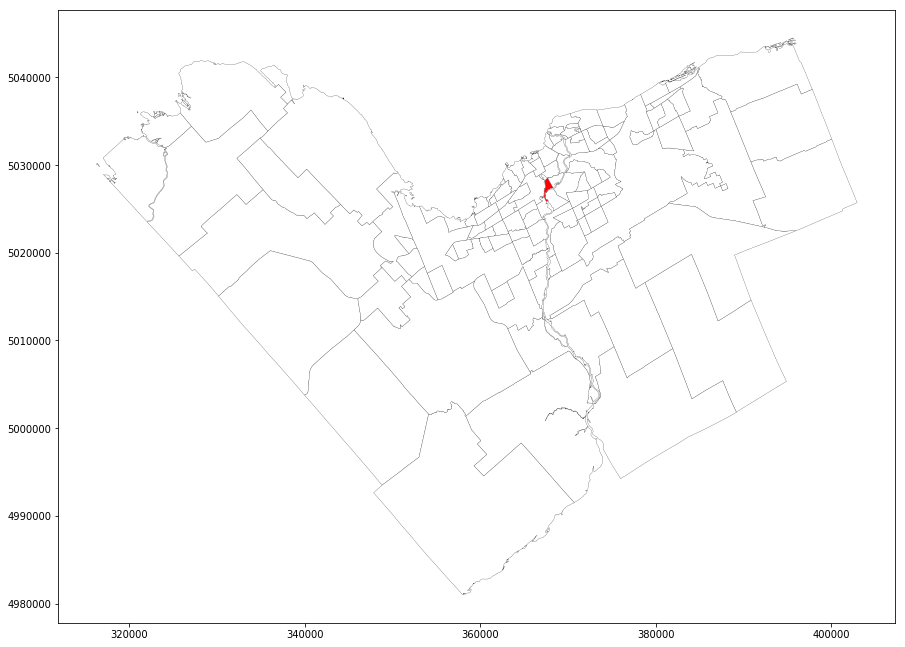

In [6]:
base = boundaries.plot(color='white', edgecolor='black',figsize =(15.0,15.0),linewidth=0.2)
carleton.plot(ax = base,figsize =(15.0,15.0), color = 'red')

# 3. Load Roads Segments Shapefile

In [7]:
roads = gpd.read_file(roads_file)

roads.info()
roads.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26113 entries, 0 to 26112
Data columns (total 15 columns):
SUBTYPE       26113 non-null int64
SUBCLASS      26113 non-null object
FLOW          1600 non-null object
RD_SEGMENT    26113 non-null object
CURRENT_ST    26113 non-null object
ROAD_NAME     26113 non-null object
ROAD_TYPE     26113 non-null object
DIRECTION     582 non-null object
LEFT_FROM     25467 non-null object
LEFT_TO       25463 non-null object
RIGHT_FROM    25436 non-null object
RIGHT_TO      25437 non-null object
SHAPE_Leng    26113 non-null float64
ROW_NUMBER    26113 non-null int64
geometry      26113 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 3.0+ MB


SUBTYPE  SUBCLASS  FLOW RD_SEGMENT   CURRENT_ST       ROAD_NAME ROAD_TYPE  \
0        5     LOCAL  None   e___2HCE         OPEN    BARTONIA CIR       CIR   
1        5     LOCAL  None   __8A9ON4         OPEN  CALVINGTON AVE       AVE   
2        5     LOCAL  None   __8IAYLV  OPERATIONAL    ST. ANDRE DR        DR   
3        2  ARTERIAL  None   __6XB3ZV         OPEN      CAMPEAU DR        DR   
4        2  ARTERIAL  None   __6733MX  OPERATIONAL   TENTH LINE RD        RD   

  DIRECTION LEFT_FROM LEFT_TO RIGHT_FROM RIGHT_TO  SHAPE_Leng  ROW_NUMBER  \
0      None       100     110        101      109   75.292072           1   
1      None         0       0          0        0   71.837967           2   
2      None       770     786        766      766  189.029077           3   
3      None      8210    8200       8231     8201  423.134038           4   
4      None         0       0       2428     2428  367.759795           5   

                                            geometry  
0  LINESTRING (383774.5422999999 5033928.9266, 38...  
1  LINESTRING (348914.8573000003 5018247.95360000...  
2  LINESTRING (379548.7309999997 5038416.6041, 37...  
3  LINESTRING (349912.7670999998 5018593.3422, 34...  
4  LINESTRING (384551.517 5034726.5759, 384697.20...

In [8]:
roads.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': -76.5,
 'k': 0.9999,
 'x_0': 304800,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'm',
 'no_defs': True}

## 3.1 Plot the Roads Layer

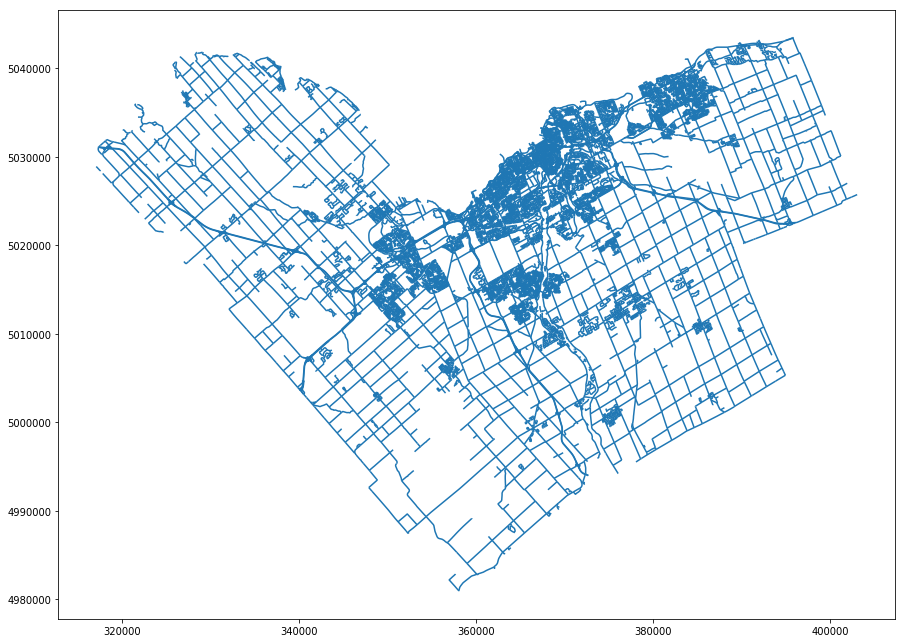

In [9]:
roads.plot(figsize =(15.0,15.0))
#road_colors = ['black', 'grey', 'grey', 'black', 'grey', 'grey' ]
#line_widths = [1, .5, .5, 1, .5,.5]

## 3.2 Plot the Highway 417

In [10]:
highway_417 = roads[roads['ROAD_NAME'] == 'HIGHWAY 417']
highway_417

SUBTYPE SUBCLASS FLOW RD_SEGMENT   CURRENT_ST    ROAD_NAME ROAD_TYPE  \
31           9  HIGHWAY   TF   __3Z07CE  OPERATIONAL  HIGHWAY 417       HWY   
148          9  HIGHWAY   FT   __3Z07FS  OPERATIONAL  HIGHWAY 417       HWY   
426          9  HIGHWAY   TF   __3Z07AJ  OPERATIONAL  HIGHWAY 417       HWY   
438          9  HIGHWAY   TF   e___2IGB  OPERATIONAL  HIGHWAY 417       HWY   
439          9  HIGHWAY   TF   __3Z07FX  OPERATIONAL  HIGHWAY 417       HWY   
440          9  HIGHWAY   TF   e___2IGA  OPERATIONAL  HIGHWAY 417       HWY   
589          9  HIGHWAY   TF   __5DVYB2  OPERATIONAL  HIGHWAY 417       HWY   
601          9  HIGHWAY   TF   __3Z070L  OPERATIONAL  HIGHWAY 417       HWY   
642          9  HIGHWAY   TF   __3Z08R9  OPERATIONAL  HIGHWAY 417       HWY   
1316         9  HIGHWAY   FT   __3Z070I  OPERATIONAL  HIGHWAY 417       HWY   
1484         9  HIGHWAY   FT   __3Z07GZ  OPERATIONAL  HIGHWAY 417       HWY   
1485         9  HIGHWAY   TF   __3Z07G8  OPERATIONAL  HIGHWAY 417       HWY   
1526         9  HIGHWAY   FT   __3Z0796  OPERATIONAL  HIGHWAY 417       HWY   
1548         9  HIGHWAY   TF   __5SPOU0  OPERATIONAL  HIGHWAY 417       HWY   
1583         9  HIGHWAY   TF   __3Z07AO  OPERATIONAL  HIGHWAY 417       HWY   
1808         9  HIGHWAY   TF   __3Z07G1  OPERATIONAL  HIGHWAY 417       HWY   
1867         9  HIGHWAY   FT   __3Z07AX  OPERATIONAL  HIGHWAY 417       HWY   
1901         9  HIGHWAY   TF   __3Z06S6  OPERATIONAL  HIGHWAY 417       HWY   
2166         9  HIGHWAY   TF   __3Z08PZ  OPERATIONAL  HIGHWAY 417       HWY   
2167         9  HIGHWAY   TF   __3Z08QZ  OPERATIONAL  HIGHWAY 417       HWY   
2182         9  HIGHWAY   FT   __3Z06SB  OPERATIONAL  HIGHWAY 417       HWY   
2291         9  HIGHWAY   TF   __3Z08RF  OPERATIONAL  HIGHWAY 417       HWY   
2360         9  HIGHWAY   FT   __3Z066Q  OPERATIONAL  HIGHWAY 417       HWY   
2464         9  HIGHWAY   FT   __3Z07DH  OPERATIONAL  HIGHWAY 417       HWY   
2763         9  HIGHWAY   TF   __3Z079A  OPERATIONAL  HIGHWAY 417       HWY   
2798         9  HIGHWAY   TF   __3Z07DQ  OPERATIONAL  HIGHWAY 417       HWY   
2809         9  HIGHWAY   TF   __3Z08PV  OPERATIONAL  HIGHWAY 417       HWY   
2972         9  HIGHWAY   FT   __3Z053R  OPERATIONAL  HIGHWAY 417       HWY   
3016         9  HIGHWAY   FT   __3Z0790  OPERATIONAL  HIGHWAY 417       HWY   
3017         9  HIGHWAY   FT   __3Z070K  OPERATIONAL  HIGHWAY 417       HWY   
...        ...      ...  ...        ...          ...          ...       ...   
21350        9  HIGHWAY   FT   __3Z08PO  OPERATIONAL  HIGHWAY 417       HWY   
21404        9  HIGHWAY   TF   __3Z07GF  OPERATIONAL  HIGHWAY 417       HWY   
21613        9  HIGHWAY   TF   __3Z07AY  OPERATIONAL  HIGHWAY 417       HWY   
21715        9  HIGHWAY   FT   __3Z070G  OPERATIONAL  HIGHWAY 417       HWY   
21742        9  HIGHWAY   FT   __3Z06S0  OPERATIONAL  HIGHWAY 417       HWY   
21917        9  HIGHWAY   FT   __3Z06TM  OPERATIONAL  HIGHWAY 417       HWY   
22150        9  HIGHWAY   FT   __3Z0798  OPERATIONAL  HIGHWAY 417       HWY   
22453        9  HIGHWAY   FT   __3Z07AU  OPERATIONAL  HIGHWAY 417       HWY   
22880        9  HIGHWAY   TF   __3Z08Q1  OPERATIONAL  HIGHWAY 417       HWY   
23609        9  HIGHWAY   FT   e___2IGD  OPERATIONAL  HIGHWAY 417       HWY   
23611        9  HIGHWAY   FT   e___2IGC  OPERATIONAL  HIGHWAY 417       HWY   
23613        9  HIGHWAY   FT   __3Z07FW  OPERATIONAL  HIGHWAY 417       HWY   
23930        9  HIGHWAY   TF   __6KCVZS  OPERATIONAL  HIGHWAY 417       HWY   
23996        9  HIGHWAY   TF   __3Z08HJ  OPERATIONAL  HIGHWAY 417      RAMP   
24180        9  HIGHWAY   TF   __3Z08SK  OPERATIONAL  HIGHWAY 417       HWY   
24186        9  HIGHWAY   FT   __3Z06FI  OPERATIONAL  HIGHWAY 417       HWY   
24470        9  HIGHWAY   TF   __3Z062R  OPERATIONAL  HIGHWAY 417       HWY   
24614        9  HIGHWAY   FT   __3Z051P  OPERATIONAL  HIGHWAY 417       HWY   
24676        9  HIGHWAY   FT   __3Z07FV  OPERATIONAL  HIG

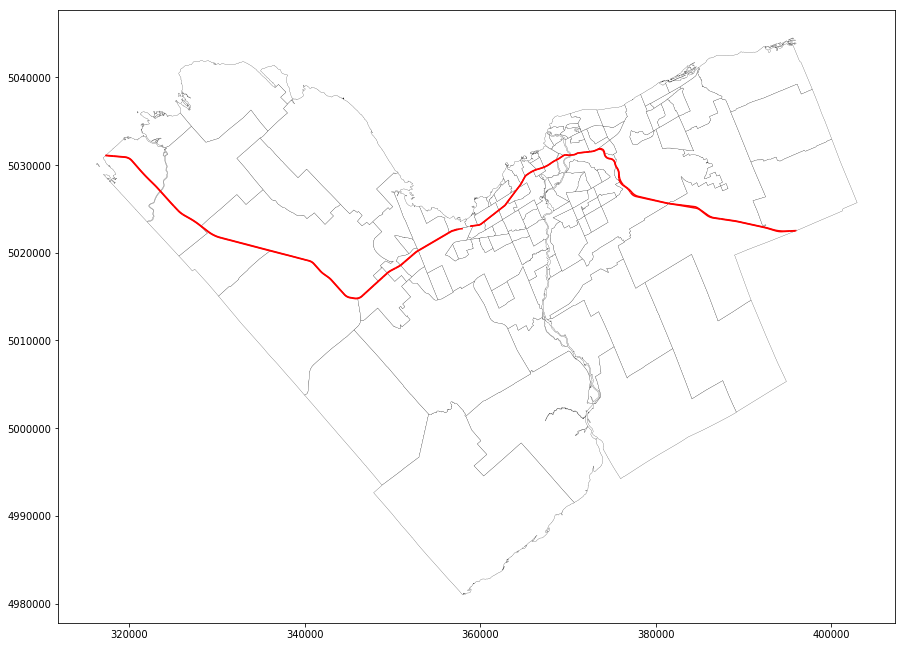

In [11]:
base = boundaries.plot(color='white', edgecolor='black',figsize =(15.0,15.0),linewidth=0.2)
highway_417.plot(ax = base,figsize =(15.0,15.0), color = 'red')

## 3.3 Plot Colonel By Dr

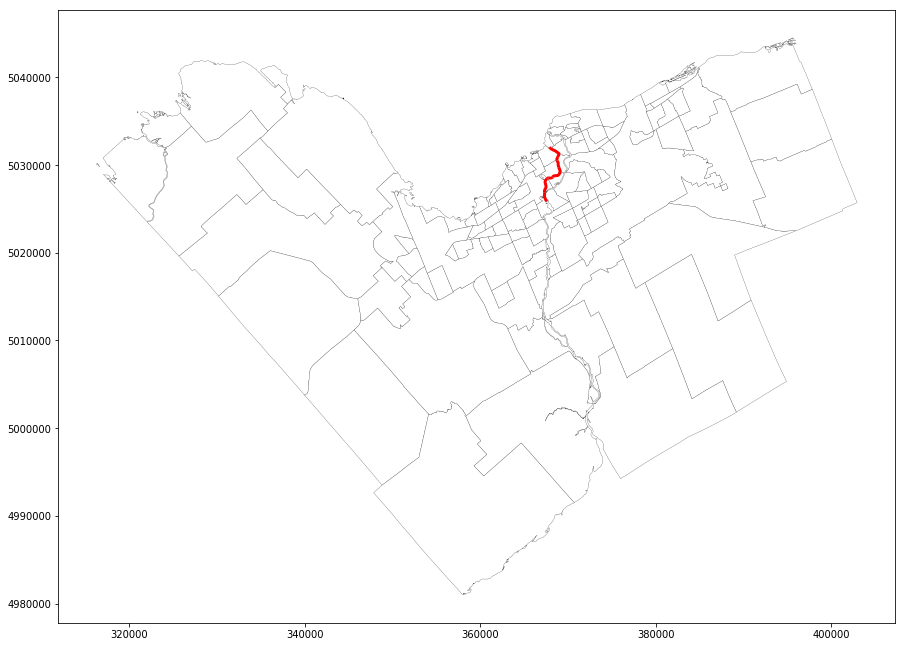

In [12]:
roads_colonel_by_dr = roads[roads['ROAD_NAME'] == 'COLONEL BY DR']
base = boundaries.plot(color='white', edgecolor='black',figsize =(15.0,15.0), linewidth=0.2)
roads_colonel_by_dr.plot(ax = base, figsize =(15.0,15.0), color = 'red', linewidth = 3)

## 3.4 Colonel By and Carleton Area

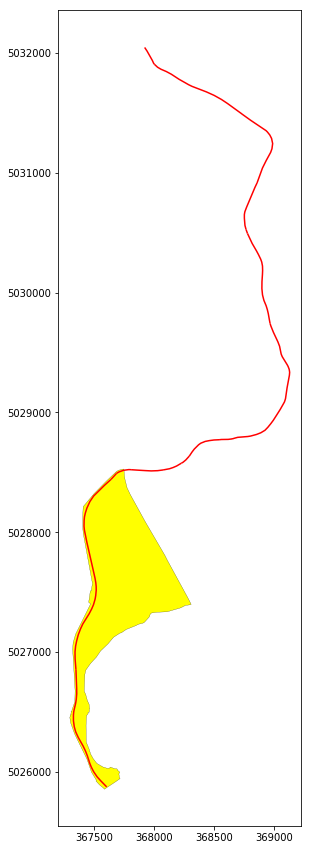

In [13]:
base = carleton.plot(color='yellow', edgecolor='black',figsize =(15.0,15.0),linewidth=0.2)
roads_colonel_by_dr.plot(ax = base,figsize =(15.0,15.0), color = 'red')

# 4. Create a new Layer with only Road Centroids to be Used for Classify Roads by Location

In [14]:
# Create Roads Centroids to be used for Plotting in a Area
roads_centroids = roads.copy()
roads_centroids['geometry'] = roads.centroid 
roads_centroids.to_file('01 - Ottawa Road Centroids Opendata.shp', driver='ESRI Shapefile')
#roads_centroids.to_file('01 - Ottawa Road Centroids Opendata.geojson', driver='GeoJSON')
roads_centroids

C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


SUBTYPE      SUBCLASS  FLOW RD_SEGMENT   CURRENT_ST  \
0            5         LOCAL  None   e___2HCE         OPEN   
1            5         LOCAL  None   __8A9ON4         OPEN   
2            5         LOCAL  None   __8IAYLV  OPERATIONAL   
3            2      ARTERIAL  None   __6XB3ZV         OPEN   
4            2      ARTERIAL  None   __6733MX  OPERATIONAL   
5            9          RAMP    FT   e___1GZP  OPERATIONAL   
6            5         LOCAL  None   __3Z0D2C  OPERATIONAL   
7            5         LOCAL  None   __3Z0DAA  OPERATIONAL   
8            5         LOCAL  None   __3Z0DF1  OPERATIONAL   
9            3  MAJCOLLECTOR  None   __3Z0F4P  OPERATIONAL   
10           5         LOCAL  None   __3Z0F5V  OPERATIONAL   
11           5         LOCAL  None   __3Z0CDP  OPERATIONAL   
12           5         LOCAL    FT   __3Z0CFW  OPERATIONAL   
13           5         LOCAL  None   __3Z0DZP  OPERATIONAL   
14           5         LOCAL  None   __3Z0D6O  OPERATIONAL   
15           3  MAJCOLLECTOR  None   __3Z0FI0  OPERATIONAL   
16           5         LOCAL  None   __3Z0FJS  OPERATIONAL   
17           5         LOCAL  None   __4CZRHY  OPERATIONAL   
18           5         LOCAL  None   __6N55B0  OPERATIONAL   
19           5         LOCAL  None   __3Z0GYK  OPERATIONAL   
20           5         LOCAL  None   e___1G6P         OPEN   
21           2      ARTERIAL  None   __5UW3KC         OPEN   
22           5         LOCAL  None   e___1G5T         OPEN   
23           5         LOCAL  None   __3Z0G3O  OPERATIONAL   
24           5         LOCAL  None   e___1G5U  OPERATIONAL   
25           5         LOCAL  None   __3Z0ESS  OPERATIONAL   
26           4     COLLECTOR  None   __727TE4  OPERATIONAL   
27           5         LOCAL  None   __3Z0A9S  OPERATIONAL   
28           5         LOCAL  None   __3Z078N  OPERATIONAL   
29           5         LOCAL  None   __3Z079W  OPERATIONAL   
...        ...           ...   ...        ...          ...   
26083        5         LOCAL  None   e___2H2S      COMWORK   
26084        5         LOCAL  None   e___2H2T      COMWORK   
26085        5         LOCAL  None   e___2H2R      COMWORK   
26086        5         LOCAL  None   e___2H2K      COMWORK   
26087        5         LOCAL  None   e___2H2O         OPEN   
26088        5         LOCAL  None   e___2H2W      COMWORK   
26089        5         LOCAL  None   e___2H2P         OPEN   
26090        5         LOCAL  None   e___2H1G         OPEN   
26091        5         LOCAL  None   e___2H2I      COMWORK   
26092        5         LOCAL  None   __6OD7GZ  OPERATIONAL   
26093        5         LOCAL  None   __6REWS1  OPERATIONAL   
26094        4         LOCAL  None   __3ZAHTP  OPERATIONAL   
26095        4     COLLECTOR  None   __3Z0CMB  OPERATIONAL   
26096        5         LOCAL  None   __3ZAJOE  OPERATIONAL   
26097        3  MAJCOLLECTOR  None   __8JUUWM  OPERATIONAL   
26098        4     COLLECTOR  None   __3Z0F93  OPERATIONAL   
26099        5         LOCAL  None   __3Z0FFK  OPERATIONAL   
26100        5         LOCAL  None   __3Z0FF5  OPERATIONAL   
26101        5         LOCAL  None   __3Z0GHU  OPERATIONAL   
26102        4     COLLECTOR  None   __3Z0GIK  OPERATIONAL   
26103        4     COLLECTOR  None   __3Z0GJI  OPERATIONAL   
26104        4     COLLECTOR  None   __3Z0E42  OPERATIONAL   
26105        5         LOCAL  None   __3Z0E5S  OPERATIONAL   
26106        5         LOCAL  None   __3ZAJQU  OPERATIONAL   
26107        5         LOCAL  None   __3ZAJTQ  OPERATIONAL   
26108        5         LOCAL  None   __3Z0AQ9  OPERATIONAL   
26109        5         LOCAL  None   __3Z0AQD  OPERATIONAL   
26110        5         LOCAL  None   __3Z0ARH  OPERATIONAL   
26111        5         LOCAL  None   __3Z0AX3  OPERATIONAL   
26112        5         LOCAL  None   __3Z0AYV  OPERATIONAL   

                 ROAD_NAME ROAD_TYPE DIRECTION LEFT_FROM LEFT_TO RIGHT_FROM  \
0             BARTONIA CIR       CIR      None       100     110        101   
1   

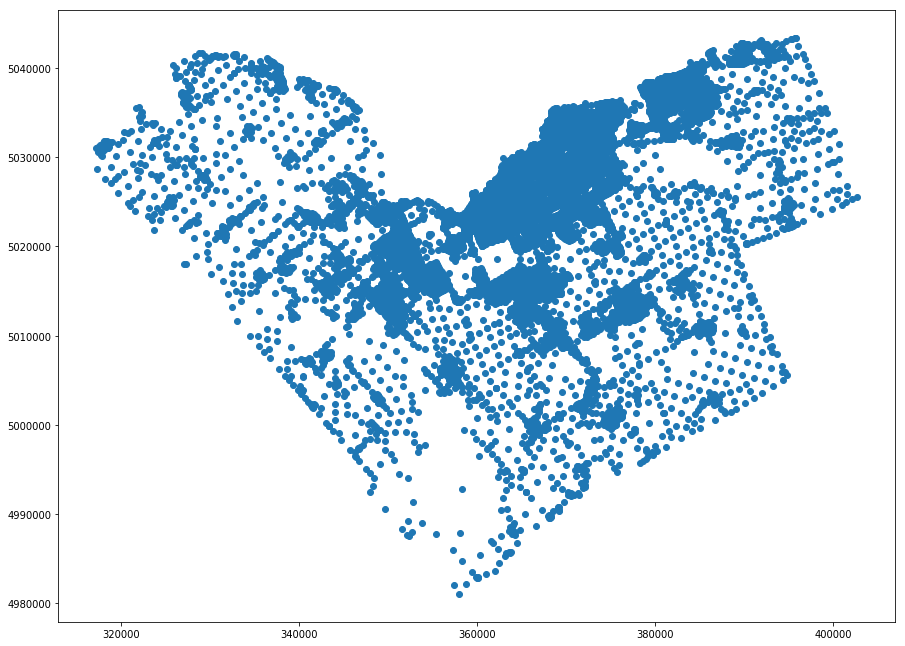

In [15]:
roads_centroids.plot(figsize =(15.0,15.0))

## 4.1 Plot Colonel By Dr Roads Centroids

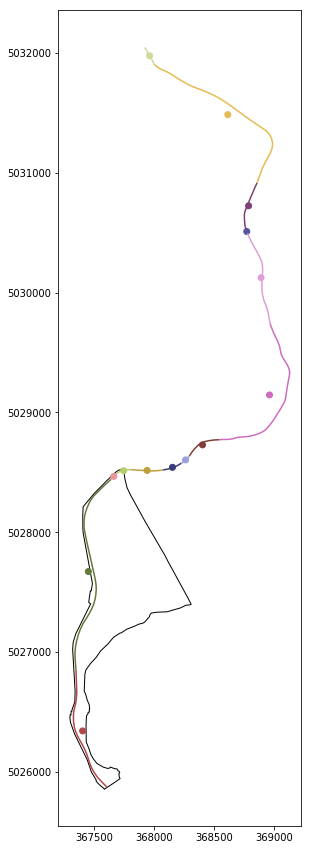

In [16]:
roads_colonel = roads_centroids[roads_centroids['ROAD_NAME'] == 'COLONEL BY DR']

base = carleton.plot(color='white', edgecolor='black',figsize =(15.0,15.0))
roads_colonel_by_dr.plot(ax = base,cmap='tab20b', figsize =(15.0,15.0))
roads_colonel.plot(ax = base,cmap='tab20b', figsize =(15.0,15.0))

## 4.2  Matching Roads Segments using Spatial Index (RTREE) an Roads Centroids in Carleton Area

<class 'pandas.core.frame.DataFrame'>
367293.34520000033
          minx          miny         maxx          maxy
0  367293.3452  5.025860e+06  368305.6358  5.028531e+06
Number of Roads in Carleton Area:17


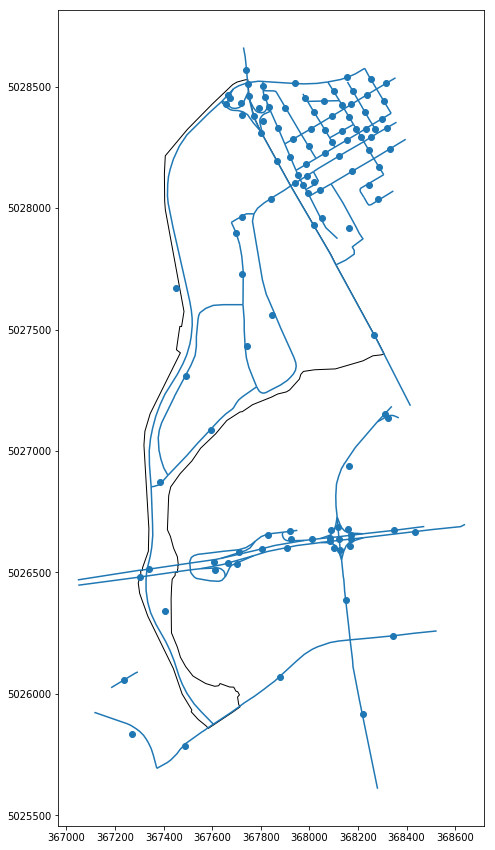

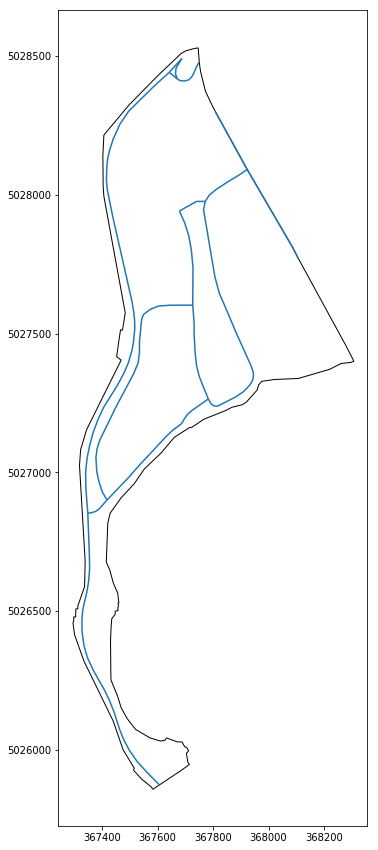

In [17]:
spatial_index = roads.sindex
x = carleton.bounds

print(type(x))
print(x['minx'][0])
print(carleton.bounds)

possible_matches_index = list(spatial_index.intersection([x['minx'][0], x['miny'][0], x['maxx'][0], x['maxy'][0]]))
possible_matches = roads.iloc[possible_matches_index]

# Possible matches roads segments around Carleton Area using Spatial Index
base = carleton.plot(color='white', edgecolor='black',figsize =(15.0,15.0))
possible_matches.centroid.plot(ax = base)
possible_matches.plot(ax = base)

In [ ]:
roads_mask = possible_matches.within(carleton.loc[0,'geometry'])

carleton_roads2 = possible_matches.loc[roads_mask]
print("Number of Roads in Carleton Area:" + str(len(carleton_roads2)))

# Filtered roads in Carleton Area
base = carleton.plot(color='white', edgecolor='black',figsize =(15.0,15.0))
carleton_roads2.plot(ax = base)

## 4.3 Matching Roads Segments in Carleton Area Using "Whithin" with Complete Roads Geometry

In [18]:
roads_mask = roads.within(carleton.loc[0,'geometry'])
carleton_roads = roads.loc[roads_mask]
print("Number of Roads in Carleton Area:" + str(len(carleton_roads)))
carleton_roads

Number of Roads in Carleton Area:17


SUBTYPE   SUBCLASS  FLOW RD_SEGMENT   CURRENT_ST      ROAD_NAME  \
3318         2   ARTERIAL  None   __3Z0883  OPERATIONAL    BRONSON AVE   
3391         8  CONNECTOR    FT   __3Z05LQ  OPERATIONAL           RAMP   
9647         5      LOCAL  None   __3Z0EZ1  OPERATIONAL     LIBRARY RD   
11001        8      LOCAL  None   __3Z08JV  OPERATIONAL  COLONEL BY DR   
11056        5      LOCAL  None   __3Z0DD0  OPERATIONAL  UNIVERSITY RD   
12061        5      LOCAL  None   __3Z0DF4  OPERATIONAL  UNIVERSITY RD   
12648        5      LOCAL  None   __3Z0590  OPERATIONAL     CAMPUS AVE   
15346        8  CONNECTOR    TF   __3Z05LT  OPERATIONAL           RAMP   
15938        5      LOCAL  None   __3Z0E2U  OPERATIONAL     CAMPUS AVE   
15939        5      LOCAL  None   __3Z0DEY  OPERATIONAL  UNIVERSITY RD   
15940        5      LOCAL  None   __3Z0DDC  OPERATIONAL  UNIVERSITY RD   
16546        2   ARTERIAL  None   __3Z09YP  OPERATIONAL    BRONSON AVE   
18694        5      LOCAL  None   __3Z0E3Y  OPERATIONAL     CAMPUS AVE   
20275        5      LOCAL  None   __3Z0599  OPERATIONAL     CAMPUS AVE   
21140        8      LOCAL  None   __3Z08KQ  OPERATIONAL  COLONEL BY DR   
21724        8      LOCAL  None   __3Z08JW  OPERATIONAL  COLONEL BY DR   
25260        8  CONNECTOR    TF   __3Z05LR  OPERATIONAL           RAMP   

      ROAD_TYPE DIRECTION LEFT_FROM LEFT_TO RIGHT_FROM RIGHT_TO   SHAPE_Leng  \
3318        AVE      None         0       0          0        0   238.073764   
3391       RAMP      None         0       0          0        0    82.067488   
9647         RD      None         0       0          0        0   898.811502   
11001        DR      None      1980    1000       1785     1125  1715.019932   
11056        RD      None         0       0          0        0    87.032277   
12061        RD      None         0       0          0        0   191.868665   
12648       AVE      None         0       0          0        0    96.387936   
15346      RAMP      None         0       0          0        0    39.593584   
15938       AVE      None         0       0          0        0   346.109811   
15939        RD      None         0       0          0        0   882.245600   
15940        RD      None         0       0          0        0   518.797420   
16546       AVE      None         0       0          0        0   374.801019   
18694       AVE      None         0       0          0        0   102.592394   
20275       AVE      None         0       0          0        0   250.089881   
21140        DR      None         0       0          0        0  1055.807173   
21724        DR      None         0       0          0        0    69.355718   
25260      RAMP      None         0       0          0        0   115.445583   

       ROW_NUMBER                                           geometry  
3318         3384  LINESTRING (367807.8721000003 5028300.09290000...  
3391         3457  LINESTRING (367672.1529000001 5028416.98, 3676...  
9647         9724  LINESTRING (367417.5988999996 5026899.9641, 36...  
11001       11078  LINESTRING (367348.5478999997 5026852.6381, 36...  
11056       11133  LINESTRING (367348.5478999997 5026852.6381, 36...  
12061       12138  LINESTRING (367771.7089999998 5027976.546, 367...  
12648       12726  LINESTRING (367678.7089999998 5027941.546, 367...  
15346       15425  LINESTRING (367640.7078999998 5028440.54990000...  
15938       16017  LINESTRING (367726.7100999998 5027602.543, 367...  
15939       16018  LINESTRING (367782.9549000002 5027264.5471, 36...  
15940       16019  LINESTRING (367417.5988999996 5026899.9641, 36...  
16546       16625  LINESTRING (367922.7100999998 5028091.5471, 36...  
18694       18773  LINESTRING (367678.7089999998 5027941.546, 367...  
20275       20354  LINESTRING (367726.7100999998 5027602.543, 367...  
21140       21219  LINESTRING (367348.5478999997 5026852.6381, 36...  
21724       21803  LINESTRING (367640.7078999998 5028440.54990000...  
25260       25383  LINESTR

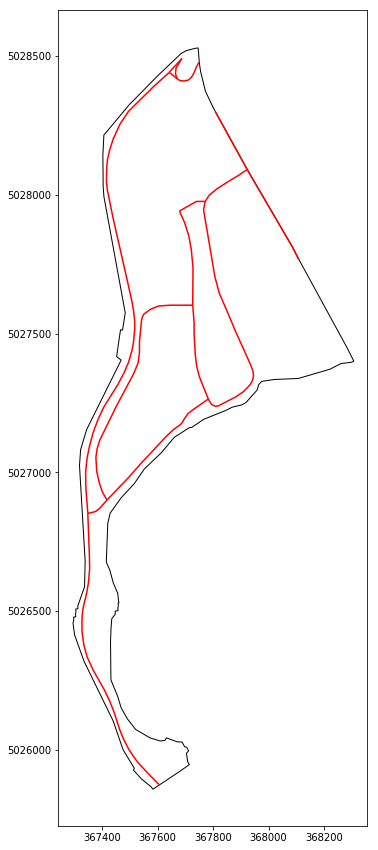

In [19]:
base = carleton.plot(color='white', edgecolor='black',figsize =(15.0,15.0))
carleton_roads.plot(ax = base, color = 'red', figsize =(15.0,15.0) )

## 4.4 Matching Roads Segments in Carleton Area Using "Whithin" with Roads Centroids Geometry

In [20]:
roads_mask_centroids = roads_centroids.within(carleton.loc[0,'geometry'])
carleton_roads_centroids = roads_centroids.loc[roads_mask]
print("Number of Roads in Carleton Area Using Centroids:" + str(len(carleton_roads_centroids)))
carleton_roads_centroids

Number of Roads in Carleton Area Using Centroids:17


SUBTYPE   SUBCLASS  FLOW RD_SEGMENT   CURRENT_ST      ROAD_NAME  \
3318         2   ARTERIAL  None   __3Z0883  OPERATIONAL    BRONSON AVE   
3391         8  CONNECTOR    FT   __3Z05LQ  OPERATIONAL           RAMP   
9647         5      LOCAL  None   __3Z0EZ1  OPERATIONAL     LIBRARY RD   
11001        8      LOCAL  None   __3Z08JV  OPERATIONAL  COLONEL BY DR   
11056        5      LOCAL  None   __3Z0DD0  OPERATIONAL  UNIVERSITY RD   
12061        5      LOCAL  None   __3Z0DF4  OPERATIONAL  UNIVERSITY RD   
12648        5      LOCAL  None   __3Z0590  OPERATIONAL     CAMPUS AVE   
15346        8  CONNECTOR    TF   __3Z05LT  OPERATIONAL           RAMP   
15938        5      LOCAL  None   __3Z0E2U  OPERATIONAL     CAMPUS AVE   
15939        5      LOCAL  None   __3Z0DEY  OPERATIONAL  UNIVERSITY RD   
15940        5      LOCAL  None   __3Z0DDC  OPERATIONAL  UNIVERSITY RD   
16546        2   ARTERIAL  None   __3Z09YP  OPERATIONAL    BRONSON AVE   
18694        5      LOCAL  None   __3Z0E3Y  OPERATIONAL     CAMPUS AVE   
20275        5      LOCAL  None   __3Z0599  OPERATIONAL     CAMPUS AVE   
21140        8      LOCAL  None   __3Z08KQ  OPERATIONAL  COLONEL BY DR   
21724        8      LOCAL  None   __3Z08JW  OPERATIONAL  COLONEL BY DR   
25260        8  CONNECTOR    TF   __3Z05LR  OPERATIONAL           RAMP   

      ROAD_TYPE DIRECTION LEFT_FROM LEFT_TO RIGHT_FROM RIGHT_TO   SHAPE_Leng  \
3318        AVE      None         0       0          0        0   238.073764   
3391       RAMP      None         0       0          0        0    82.067488   
9647         RD      None         0       0          0        0   898.811502   
11001        DR      None      1980    1000       1785     1125  1715.019932   
11056        RD      None         0       0          0        0    87.032277   
12061        RD      None         0       0          0        0   191.868665   
12648       AVE      None         0       0          0        0    96.387936   
15346      RAMP      None         0       0          0        0    39.593584   
15938       AVE      None         0       0          0        0   346.109811   
15939        RD      None         0       0          0        0   882.245600   
15940        RD      None         0       0          0        0   518.797420   
16546       AVE      None         0       0          0        0   374.801019   
18694       AVE      None         0       0          0        0   102.592394   
20275       AVE      None         0       0          0        0   250.089881   
21140        DR      None         0       0          0        0  1055.807173   
21724        DR      None         0       0          0        0    69.355718   
25260      RAMP      None         0       0          0        0   115.445583   

       ROW_NUMBER                                     geometry  
3318         3384               POINT (367865.2911 5028195.82)  
3391         3457  POINT (367671.8791737592 5028455.221900487)  
9647         9724  POINT (367493.8480231712 5027308.046491018)  
11001       11078  POINT (367451.8506870118 5027671.941244493)  
11056       11133  POINT (367386.2616350349 5026870.884925459)  
12061       12138  POINT (367843.2250826107 5028038.252921753)  
12648       12726  POINT (367697.0787161602 5027897.067052614)  
15346       15425  POINT (367656.8883890892 5028429.540676069)  
15938       16017   POINT (367742.821499375 5027431.008019897)  
15939       16018   POINT (367845.609712692 5027561.563841969)  
15940       16019  POINT (367595.9954598458 5027087.614249865)  
16546       16625  POINT (368017.0008880078 5027929.602451279)  
18694       18773     POINT (367723.74050758 5027964.50322353)  
20275       20354  POINT (367724.5357394721 5027727.410512404)  
21140       21219   POINT (367403.8458575461 5026342.01749252)  
21724       21803  POINT (367664.2084499998 5028466.050450001)  
25260       25383  POINT (367717.5474028336 5028433.136546898)

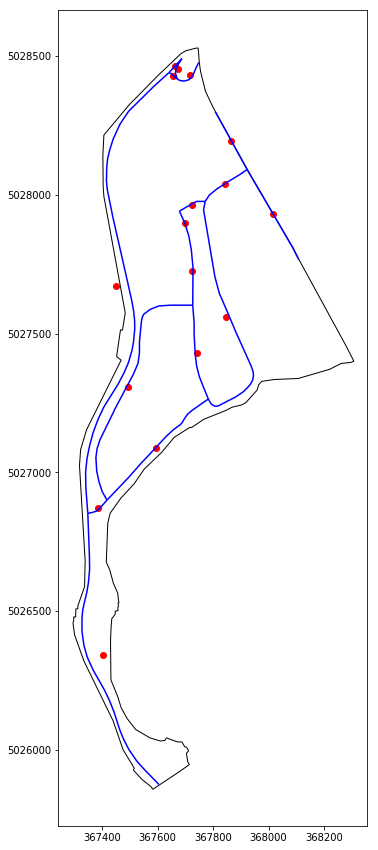

In [21]:
roads_to_plot = carleton_roads_centroids.index
roads_to_plot = list(roads_to_plot)
carleton_roads_original = roads.iloc[roads_to_plot,:]
carleton_roads_original

base = carleton.plot(color='white', edgecolor='black',figsize =(15.0,15.0))
carleton_roads_original.plot(ax = base, color = 'blue')
carleton_roads_centroids.plot(ax = base, color = 'red', figsize =(15.0,15.0))

# 5. Matching a Road Segment to a Neighborhood

In [22]:
roads['ONS_ID'] = ""
roads['ONS_NAME'] = ""
roads.head()

SUBTYPE  SUBCLASS  FLOW RD_SEGMENT   CURRENT_ST       ROAD_NAME ROAD_TYPE  \
0        5     LOCAL  None   e___2HCE         OPEN    BARTONIA CIR       CIR   
1        5     LOCAL  None   __8A9ON4         OPEN  CALVINGTON AVE       AVE   
2        5     LOCAL  None   __8IAYLV  OPERATIONAL    ST. ANDRE DR        DR   
3        2  ARTERIAL  None   __6XB3ZV         OPEN      CAMPEAU DR        DR   
4        2  ARTERIAL  None   __6733MX  OPERATIONAL   TENTH LINE RD        RD   

  DIRECTION LEFT_FROM LEFT_TO RIGHT_FROM RIGHT_TO  SHAPE_Leng  ROW_NUMBER  \
0      None       100     110        101      109   75.292072           1   
1      None         0       0          0        0   71.837967           2   
2      None       770     786        766      766  189.029077           3   
3      None      8210    8200       8231     8201  423.134038           4   
4      None         0       0       2428     2428  367.759795           5   

                                            geometry ONS_ID ONS_NAME  
0  LINESTRING (383774.5422999999 5033928.9266, 38...                  
1  LINESTRING (348914.8573000003 5018247.95360000...                  
2  LINESTRING (379548.7309999997 5038416.6041, 37...                  
3  LINESTRING (349912.7670999998 5018593.3422, 34...                  
4  LINESTRING (384551.517 5034726.5759, 384697.20...

In [23]:
def assing_nearest_area_by_whithin(items, areas):
    
    start = datetime.datetime.now().replace(microsecond=0)
    print("Start Time:"+str(start))
    
    ons_id = items.columns.get_loc('ONS_ID')
    ons_name = items.columns.get_loc('ONS_NAME')

    total = len(items)
    print("Number of items to Assign:" + str(total))
 
    start_iter = datetime.datetime.now().replace(microsecond=0)

    for index, row in areas.iterrows():
 
        if (index != 0):
            print("Iteration Time:" + str(end_iter - start_iter))
            start_iter = datetime.datetime.now().replace(microsecond=0)
            
        print("Checking Roads for Area:" + str(row['Name']))
        items_temp = items[items['ONS_ID'] == ""]
        total_now = len(items_temp)
        
        per_no_assigned = (1 - (total - total_now) / total) * 100
        per_assigned = (100 - per_no_assigned)
        
        print("  Number of Roads No Assigned (Empty ONS_ID):" + str(total_now) + " %:" + str(per_no_assigned))
        
        if row.geometry != None:
            mask = items_temp.within(row['geometry'])
        
            items_in = items_temp[mask]
            print("  Number of Roads to be Assigned (Match Current Area):"+ str(len(items_in)))
        
            for index2, row2 in items_in.iterrows():
                items.iat[index2,ons_id] = row['ONS_ID']
                items.iat[index2,ons_name] = row['Name']
        
        end_iter = datetime.datetime.now().replace(microsecond=0)
    
    end = datetime.datetime.now().replace(microsecond=0)
    
    print("Total Execution Time:" + str(end - start))
            
    return(items)

## 5.1 Using Complete Roads 

In [24]:
roads['ONS_ID'] = ""
roads['ONS_NAME'] = ""
res1 = assing_nearest_area_by_whithin(roads,boundaries)
res1.head()

Start Time:2019-02-21 20:10:05
Number of items to Assign:26113
Checking Roads for Area:Orleans Industrial
  Number of Roads No Assigned (Empty ONS_ID):26113 %:100.0
  Number of Roads to be Assigned (Match Current Area):5
Iteration Time:0:00:00
Checking Roads for Area:Beechwood Cemetery
  Number of Roads No Assigned (Empty ONS_ID):26108 %:99.98085244897177
  Number of Roads to be Assigned (Match Current Area):0
Iteration Time:0:00:00
Checking Roads for Area:Notre-Dame Cemetery
  Number of Roads No Assigned (Empty ONS_ID):26108 %:99.98085244897177
  Number of Roads to be Assigned (Match Current Area):0
Iteration Time:0:00:00
Checking Roads for Area:Carleton University
  Number of Roads No Assigned (Empty ONS_ID):26108 %:99.98085244897177
  Number of Roads to be Assigned (Match Current Area):17
Iteration Time:0:00:01
Checking Roads for Area:Lebreton Development
  Number of Roads No Assigned (Empty ONS_ID):26091 %:99.91575077547581
  Number of Roads to be Assigned (Match Current Area):27
I

Iteration Time:0:00:00
Checking Roads for Area:Glen Cairn - Kanata South Business Park
  Number of Roads No Assigned (Empty ONS_ID):18854 %:72.20158541722515
  Number of Roads to be Assigned (Match Current Area):265
Iteration Time:0:00:00
Checking Roads for Area:Greely
  Number of Roads No Assigned (Empty ONS_ID):18589 %:71.18676521272928
  Number of Roads to be Assigned (Match Current Area):406
Iteration Time:0:00:00
Checking Roads for Area:Greenbelt
  Number of Roads No Assigned (Empty ONS_ID):18183 %:69.63198406923755
  Number of Roads to be Assigned (Match Current Area):274
Iteration Time:0:00:09
Checking Roads for Area:Greenboro East
  Number of Roads No Assigned (Empty ONS_ID):17909 %:68.5826982728909
  Number of Roads to be Assigned (Match Current Area):178
Iteration Time:0:00:01
Checking Roads for Area:Hawthorne Meadows - Sheffield Glen
  Number of Roads No Assigned (Empty ONS_ID):17731 %:67.90104545628614
  Number of Roads to be Assigned (Match Current Area):58
Iteration Time:

  Number of Roads to be Assigned (Match Current Area):129
Iteration Time:0:00:00
Checking Roads for Area:Qualicum - Redwood Park
  Number of Roads No Assigned (Empty ONS_ID):7909 %:30.287596216443912
  Number of Roads to be Assigned (Match Current Area):111
Iteration Time:0:00:00
Checking Roads for Area:Richmond
  Number of Roads No Assigned (Empty ONS_ID):7798 %:29.862520583617357
  Number of Roads to be Assigned (Match Current Area):562
Iteration Time:0:00:00
Checking Roads for Area:Riverside Park
  Number of Roads No Assigned (Empty ONS_ID):7236 %:27.71033584804503
  Number of Roads to be Assigned (Match Current Area):142
Iteration Time:0:00:00
Checking Roads for Area:Riverside South - Leitrim
  Number of Roads No Assigned (Empty ONS_ID):7094 %:27.16654539884349
  Number of Roads to be Assigned (Match Current Area):582
Iteration Time:0:00:01
Checking Roads for Area:Rockcliffe Park
  Number of Roads No Assigned (Empty ONS_ID):6512 %:24.93777045915827
  Number of Roads to be Assigned 

SUBTYPE  SUBCLASS  FLOW RD_SEGMENT   CURRENT_ST       ROAD_NAME ROAD_TYPE  \
0        5     LOCAL  None   e___2HCE         OPEN    BARTONIA CIR       CIR   
1        5     LOCAL  None   __8A9ON4         OPEN  CALVINGTON AVE       AVE   
2        5     LOCAL  None   __8IAYLV  OPERATIONAL    ST. ANDRE DR        DR   
3        2  ARTERIAL  None   __6XB3ZV         OPEN      CAMPEAU DR        DR   
4        2  ARTERIAL  None   __6733MX  OPERATIONAL   TENTH LINE RD        RD   

  DIRECTION LEFT_FROM LEFT_TO RIGHT_FROM RIGHT_TO  SHAPE_Leng  ROW_NUMBER  \
0      None       100     110        101      109   75.292072           1   
1      None         0       0          0        0   71.837967           2   
2      None       770     786        766      766  189.029077           3   
3      None      8210    8200       8231     8201  423.134038           4   
4      None         0       0       2428     2428  367.759795           5   

                                            geometry ONS_ID  \
0  LINESTRING (383774.5422999999 5033928.9266, 38...     68   
1  LINESTRING (348914.8573000003 5018247.95360000...     56   
2  LINESTRING (379548.7309999997 5038416.6041, 37...     78   
3  LINESTRING (349912.7670999998 5018593.3422, 34...     56   
4  LINESTRING (384551.517 5034726.5759, 384697.20...          

                                            ONS_NAME  
0                           Navan - Carlsbad Springs  
1  Kanata Lakes - Marchwood Lakeside - Morgan's G...  
2                                 Orleans North West  
3  Kanata Lakes - Marchwood Lakeside - Morgan's G...  
4

In [25]:
res1_blank = res1[res1['ONS_ID'] == ""]
print("Number of Roads whithout Neighborhood Assigned:"+str(len(res1_blank)))

Number of Roads whithout Neighborhood Assigned:2495


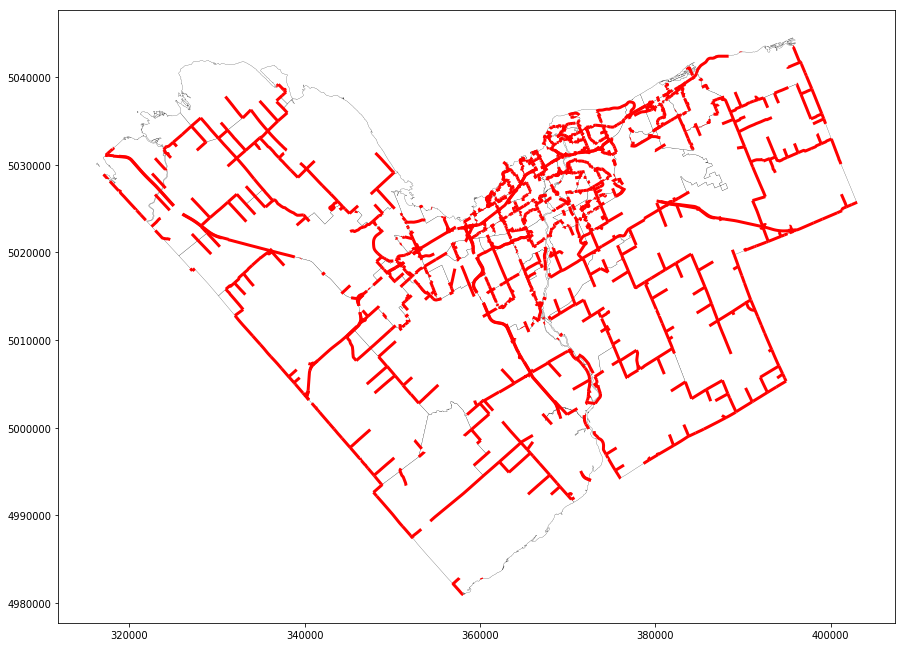

In [26]:
base = boundaries.plot(color='white', edgecolor='black',figsize =(15.0,15.0), linewidth=0.2)
res1_blank.plot(ax = base, color = 'red', linewidth = 3)

## 5.2 Using Roads Centroids

In [27]:
roads_centroids['ONS_ID'] = ""
roads_centroids['ONS_NAME'] = ""
res2 = assing_nearest_area_by_whithin(roads_centroids,boundaries)
res2.head()

Start Time:2019-02-21 20:10:34
Number of items to Assign:26113
Checking Roads for Area:Orleans Industrial
  Number of Roads No Assigned (Empty ONS_ID):26113 %:100.0
  Number of Roads to be Assigned (Match Current Area):12
Iteration Time:0:00:00
Checking Roads for Area:Beechwood Cemetery
  Number of Roads No Assigned (Empty ONS_ID):26101 %:99.95404587753227
  Number of Roads to be Assigned (Match Current Area):7
Iteration Time:0:00:00
Checking Roads for Area:Notre-Dame Cemetery
  Number of Roads No Assigned (Empty ONS_ID):26094 %:99.92723930609276
  Number of Roads to be Assigned (Match Current Area):1
Iteration Time:0:00:00
Checking Roads for Area:Carleton University
  Number of Roads No Assigned (Empty ONS_ID):26093 %:99.92340979588711
  Number of Roads to be Assigned (Match Current Area):21
Iteration Time:0:00:00
Checking Roads for Area:Lebreton Development
  Number of Roads No Assigned (Empty ONS_ID):26072 %:99.84299008156857
  Number of Roads to be Assigned (Match Current Area):40


  Number of Roads No Assigned (Empty ONS_ID):18087 %:69.26435108949565
  Number of Roads to be Assigned (Match Current Area):281
Iteration Time:0:00:00
Checking Roads for Area:Greely
  Number of Roads No Assigned (Empty ONS_ID):17806 %:68.18825872170949
  Number of Roads to be Assigned (Match Current Area):428
Iteration Time:0:00:01
Checking Roads for Area:Greenbelt
  Number of Roads No Assigned (Empty ONS_ID):17378 %:66.54922835369356
  Number of Roads to be Assigned (Match Current Area):353
Iteration Time:0:00:07
Checking Roads for Area:Greenboro East
  Number of Roads No Assigned (Empty ONS_ID):17025 %:65.19741125110099
  Number of Roads to be Assigned (Match Current Area):204
Iteration Time:0:00:01
Checking Roads for Area:Hawthorne Meadows - Sheffield Glen
  Number of Roads No Assigned (Empty ONS_ID):16821 %:64.41619116914947
  Number of Roads to be Assigned (Match Current Area):74
Iteration Time:0:00:00
Checking Roads for Area:Hintonburg - Mechanicsville
  Number of Roads No Assig

  Number of Roads to be Assigned (Match Current Area):614
Iteration Time:0:00:01
Checking Roads for Area:Riverside Park
  Number of Roads No Assigned (Empty ONS_ID):5343 %:20.461073028759625
  Number of Roads to be Assigned (Match Current Area):155
Iteration Time:0:00:00
Checking Roads for Area:Riverside South - Leitrim
  Number of Roads No Assigned (Empty ONS_ID):5188 %:19.867498946884698
  Number of Roads to be Assigned (Match Current Area):602
Iteration Time:0:00:00
Checking Roads for Area:Rockcliffe Park
  Number of Roads No Assigned (Empty ONS_ID):4586 %:17.56213380308659
  Number of Roads to be Assigned (Match Current Area):310
Iteration Time:0:00:00
Checking Roads for Area:Rothwell Heights - Beacon Hill North
  Number of Roads No Assigned (Empty ONS_ID):4276 %:16.374985639336725
  Number of Roads to be Assigned (Match Current Area):261
Iteration Time:0:00:00
Checking Roads for Area:Russell - Edwards
  Number of Roads No Assigned (Empty ONS_ID):4015 %:15.375483475663465
  Number 

SUBTYPE  SUBCLASS  FLOW RD_SEGMENT   CURRENT_ST       ROAD_NAME ROAD_TYPE  \
0        5     LOCAL  None   e___2HCE         OPEN    BARTONIA CIR       CIR   
1        5     LOCAL  None   __8A9ON4         OPEN  CALVINGTON AVE       AVE   
2        5     LOCAL  None   __8IAYLV  OPERATIONAL    ST. ANDRE DR        DR   
3        2  ARTERIAL  None   __6XB3ZV         OPEN      CAMPEAU DR        DR   
4        2  ARTERIAL  None   __6733MX  OPERATIONAL   TENTH LINE RD        RD   

  DIRECTION LEFT_FROM LEFT_TO RIGHT_FROM RIGHT_TO  SHAPE_Leng  ROW_NUMBER  \
0      None       100     110        101      109   75.292072           1   
1      None         0       0          0        0   71.837967           2   
2      None       770     786        766      766  189.029077           3   
3      None      8210    8200       8231     8201  423.134038           4   
4      None         0       0       2428     2428  367.759795           5   

                                      geometry ONS_ID  \
0      POINT (383809.3879999998 5033943.17445)     68   
1      POINT (348942.0968500003 5018271.36685)     56   
2  POINT (379611.0776498511 5038373.372804687)     78   
3  POINT (350112.4206675051 5018646.319394454)     56   
4       POINT (384624.3585000001 5034557.7389)     72   

                                            ONS_NAME  
0                           Navan - Carlsbad Springs  
1  Kanata Lakes - Marchwood Lakeside - Morgan's G...  
2                                 Orleans North West  
3  Kanata Lakes - Marchwood Lakeside - Morgan's G...  
4  Orleans Avalon - Notting Gate - Fallingbrook -...

In [28]:
res2_blank = res2[res2['ONS_ID'] == ""]
print("Number of Roads whithout Neighborhood Assigned:"+str(len(res2)))
res2_blank

Number of Roads whithout Neighborhood Assigned:26113


SUBTYPE      SUBCLASS  FLOW RD_SEGMENT   CURRENT_ST  \
262          5         LOCAL  None   __814905  OPERATIONAL   
584          2      ARTERIAL  None   e___2H44  OPERATIONAL   
643          2      ARTERIAL  None   __3Z08XF  OPERATIONAL   
689          8         LOCAL  None   __3Z08I7  OPERATIONAL   
850          4         LOCAL  None   __8IAYWE  OPERATIONAL   
1021         8         LOCAL    FT   __3Z08GH  OPERATIONAL   
1188         8         LOCAL    TF   __3Z066N  OPERATIONAL   
2043         5         LOCAL  None   __3Z07DU  OPERATIONAL   
2045         5         LOCAL  None   __3Z08HZ  OPERATIONAL   
2168         2      ARTERIAL  None   __3Z08UE  OPERATIONAL   
2562         2      ARTERIAL  None   __3Z06S7  OPERATIONAL   
2764         2      ARTERIAL  None   __3Z07CS  OPERATIONAL   
2882         2      ARTERIAL  None   __3Z06WH  OPERATIONAL   
2902         5         LOCAL  None   __3ZAJP8  OPERATIONAL   
2906         2      ARTERIAL  None   __3Z09JL  OPERATIONAL   
3020         4     COLLECTOR  None   __3Z0BH6  OPERATIONAL   
3512         2      ARTERIAL  None   __3Z08IQ  OPERATIONAL   
3758         4     COLLECTOR  None   __3ZAJ5G  OPERATIONAL   
4496         4     COLLECTOR  None   __3Z0BSR  OPERATIONAL   
5163         2      ARTERIAL  None   __3Z085Z  OPERATIONAL   
5488         5         LOCAL  None   __3Z00Y1  OPERATIONAL   
5844         8         LOCAL    TF   __3Z08KF  OPERATIONAL   
5851         5         LOCAL  None   __3Z075A  OPERATIONAL   
6074         2      ARTERIAL  None   __3Z09OQ  OPERATIONAL   
6103         2      ARTERIAL  None   __3Z08ZI  OPERATIONAL   
6206         4     COLLECTOR  None   __3ZAJ14  OPERATIONAL   
6394         4     COLLECTOR  None   __3ZAJ18  OPERATIONAL   
6852         4     COLLECTOR  None   __3Z077A  OPERATIONAL   
6881         2      ARTERIAL  None   __3Z08IL  OPERATIONAL   
7606         4     COLLECTOR  None   __3Z0BSG  OPERATIONAL   
...        ...           ...   ...        ...          ...   
17472        2      ARTERIAL    FT   __3Z05AJ  OPERATIONAL   
17636        2      ARTERIAL  None   __3Z09KZ  OPERATIONAL   
17680        2      ARTERIAL  None   __3Z09OR  OPERATIONAL   
18483        4     COLLECTOR  None   __3Z00YI  OPERATIONAL   
18982        2      ARTERIAL  None   __3Z08FE  OPERATIONAL   
19225        2      ARTERIAL  None   __3Z00M0  OPERATIONAL   
19240        2      ARTERIAL  None   __3Z00PO  OPERATIONAL   
19315        2      ARTERIAL  None   __3Z09KX  OPERATIONAL   
19350        2      ARTERIAL  None   __3Z08E9  OPERATIONAL   
19372        2      ARTERIAL  None   __3Z09UR  OPERATIONAL   
19504        4     COLLECTOR  None   __3AU2JE  OPERATIONAL   
19741        4     COLLECTOR  None   __3Z0BSV  OPERATIONAL   
19905        4     COLLECTOR  None   __3Z0BST  OPERATIONAL   
20495        4     COLLECTOR  None   __3Z0BSP  OPERATIONAL   
20881        8         LOCAL  None   __3Z08J1  OPERATIONAL   
21646        2      ARTERIAL  None   __3Z06S9  OPERATIONAL   
21872        3  MAJCOLLECTOR  None   __4CZFU3  OPERATIONAL   
22521        4     COLLECTOR  None   __3Z0AAM  OPERATIONAL   
22674        4     COLLECTOR  None   __3ZAJWR  OPERATIONAL   
22737        4     COLLECTOR  None   __3ZAJWQ  OPERATIONAL   
23128        5         LOCAL  None   __3Z00XE  OPERATIONAL   
23242        4     COLLECTOR  None   __3ZAJ9Y  OPERATIONAL   
23317        2      ARTERIAL    TF   __3Z06E9  OPERATIONAL   
24308        2      ARTERIAL  None   __3Z08IP  OPERATIONAL   
24342        2      ARTERIAL  None   __3Z082C  OPERATIONAL   
24818        2      ARTERIAL  None   __3Z00N7  OPERATIONAL   
25274        2      ARTERIAL  None   __3Z090I  OPERATIONAL   
25318        5         LOCAL  None   __3ZAJ2J  OPERATIONAL   
25393        2      ARTERIAL  None   __3Z08M5  OPERATIONAL   
25988        3  MAJCOLLECTOR  None   __3ZAJOF  OPERATIONAL   

                       ROAD_NAME ROAD_TYPE DIRECTION LEFT_FROM LEFT_TO  \
262                    BURTON RD        RD      None         0       0   
584           

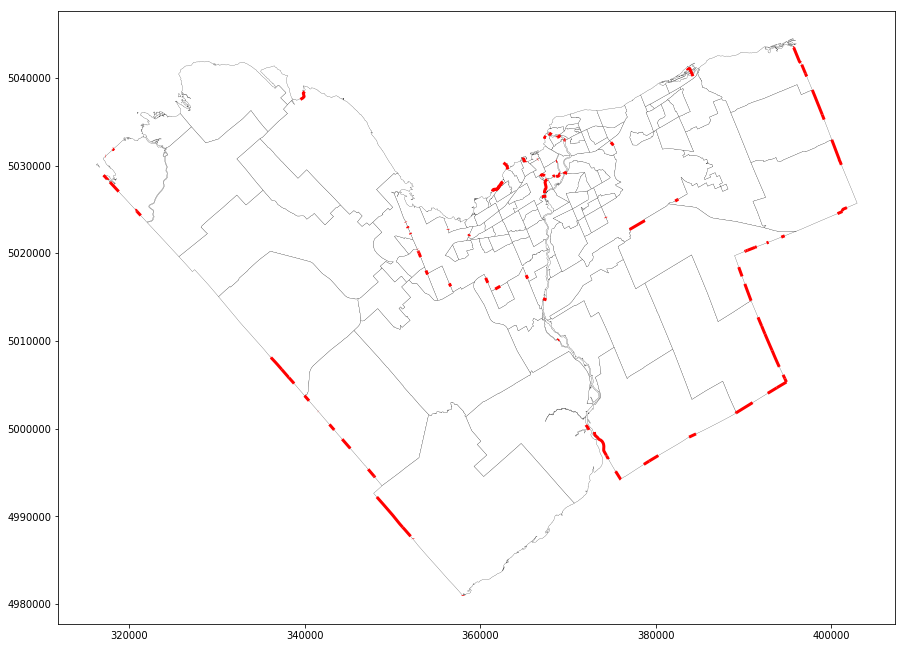

In [29]:
roads_to_plot = res2_blank.index
roads_to_plot = list(roads_to_plot)
roads_original = roads.iloc[roads_to_plot,:]

base = boundaries.plot(color='white', edgecolor='black',figsize =(15.0,15.0), linewidth=0.2)
roads_original.plot(ax = base,color = 'red', linewidth=3)

## 5.3 Matching Roads Segments to Neighborhoods by Road Centroids and the Missing ones by Distance

In [30]:
def assign_nearest_area_by_mindistance(items, areas):
    
    start = datetime.datetime.now().replace(microsecond=0)
    print("Start Time:"+str(start))
    
    ons_id = items.columns.get_loc('ONS_ID')
    ons_name = items.columns.get_loc('ONS_NAME')

    items_temp = items[items['ONS_ID'] == ""]
    total = len(items_temp)
    print("Number of items to Assign:" + str(total))
    one_per = int(round(total / 100))
    j = 0
    start_per = datetime.datetime.now().replace(microsecond=0)
    for index,row in items_temp.iterrows():
    
        if (j == index): 
            end_per = datetime.datetime.now().replace(microsecond=0)
            per_done = round((1 - (total - index)/total)*100)
            print(" Percentage done: " + str(per_done) + str("% in ") + str(end_per - start_per))
            j = 0
            start_per = datetime.datetime.now().replace(microsecond=0)
    
        if row.geometry != None:
            d = areas.distance(row.geometry)
            d_min = d.min()
            bound_id = d[d==d_min].index[0]
            closest_area = areas.iloc[bound_id]    
            items.iat[index,ons_id] = closest_area['ONS_ID']
            items.iat[index,ons_name] = closest_area['Name']
            
        j = j + 1
    print("  Percentage done: 100%")
    end = datetime.datetime.now().replace(microsecond=0)    
    print("Total Execution Time:" + str(end - start))
    return(items)

In [31]:
roads_centroids['ONS_ID'] = ""
roads_centroids['ONS_NAME'] = ""
roads_centroids = assing_nearest_area_by_whithin(roads_centroids,boundaries)
roads.head()

Start Time:2019-02-21 20:11:01
Number of items to Assign:26113
Checking Roads for Area:Orleans Industrial
  Number of Roads No Assigned (Empty ONS_ID):26113 %:100.0
  Number of Roads to be Assigned (Match Current Area):12
Iteration Time:0:00:00
Checking Roads for Area:Beechwood Cemetery
  Number of Roads No Assigned (Empty ONS_ID):26101 %:99.95404587753227
  Number of Roads to be Assigned (Match Current Area):7
Iteration Time:0:00:00
Checking Roads for Area:Notre-Dame Cemetery
  Number of Roads No Assigned (Empty ONS_ID):26094 %:99.92723930609276
  Number of Roads to be Assigned (Match Current Area):1
Iteration Time:0:00:01
Checking Roads for Area:Carleton University
  Number of Roads No Assigned (Empty ONS_ID):26093 %:99.92340979588711
  Number of Roads to be Assigned (Match Current Area):21
Iteration Time:0:00:00
Checking Roads for Area:Lebreton Development
  Number of Roads No Assigned (Empty ONS_ID):26072 %:99.84299008156857
  Number of Roads to be Assigned (Match Current Area):40


  Number of Roads to be Assigned (Match Current Area):310
Iteration Time:0:00:00
Checking Roads for Area:Glen Cairn - Kanata South Business Park
  Number of Roads No Assigned (Empty ONS_ID):18087 %:69.26435108949565
  Number of Roads to be Assigned (Match Current Area):281
Iteration Time:0:00:01
Checking Roads for Area:Greely
  Number of Roads No Assigned (Empty ONS_ID):17806 %:68.18825872170949
  Number of Roads to be Assigned (Match Current Area):428
Iteration Time:0:00:00
Checking Roads for Area:Greenbelt
  Number of Roads No Assigned (Empty ONS_ID):17378 %:66.54922835369356
  Number of Roads to be Assigned (Match Current Area):353
Iteration Time:0:00:08
Checking Roads for Area:Greenboro East
  Number of Roads No Assigned (Empty ONS_ID):17025 %:65.19741125110099
  Number of Roads to be Assigned (Match Current Area):204
Iteration Time:0:00:00
Checking Roads for Area:Hawthorne Meadows - Sheffield Glen
  Number of Roads No Assigned (Empty ONS_ID):16821 %:64.41619116914947
  Number of R

Iteration Time:0:00:00
Checking Roads for Area:Qualicum - Redwood Park
  Number of Roads No Assigned (Empty ONS_ID):6088 %:23.31405813196492
  Number of Roads to be Assigned (Match Current Area):131
Iteration Time:0:00:00
Checking Roads for Area:Richmond
  Number of Roads No Assigned (Empty ONS_ID):5957 %:22.812392295025465
  Number of Roads to be Assigned (Match Current Area):614
Iteration Time:0:00:00
Checking Roads for Area:Riverside Park
  Number of Roads No Assigned (Empty ONS_ID):5343 %:20.461073028759625
  Number of Roads to be Assigned (Match Current Area):155
Iteration Time:0:00:00
Checking Roads for Area:Riverside South - Leitrim
  Number of Roads No Assigned (Empty ONS_ID):5188 %:19.867498946884698
  Number of Roads to be Assigned (Match Current Area):602
Iteration Time:0:00:01
Checking Roads for Area:Rockcliffe Park
  Number of Roads No Assigned (Empty ONS_ID):4586 %:17.56213380308659
  Number of Roads to be Assigned (Match Current Area):310
Iteration Time:0:00:00
Checking 

SUBTYPE  SUBCLASS  FLOW RD_SEGMENT   CURRENT_ST       ROAD_NAME ROAD_TYPE  \
0        5     LOCAL  None   e___2HCE         OPEN    BARTONIA CIR       CIR   
1        5     LOCAL  None   __8A9ON4         OPEN  CALVINGTON AVE       AVE   
2        5     LOCAL  None   __8IAYLV  OPERATIONAL    ST. ANDRE DR        DR   
3        2  ARTERIAL  None   __6XB3ZV         OPEN      CAMPEAU DR        DR   
4        2  ARTERIAL  None   __6733MX  OPERATIONAL   TENTH LINE RD        RD   

  DIRECTION LEFT_FROM LEFT_TO RIGHT_FROM RIGHT_TO  SHAPE_Leng  ROW_NUMBER  \
0      None       100     110        101      109   75.292072           1   
1      None         0       0          0        0   71.837967           2   
2      None       770     786        766      766  189.029077           3   
3      None      8210    8200       8231     8201  423.134038           4   
4      None         0       0       2428     2428  367.759795           5   

                                            geometry ONS_ID  \
0  LINESTRING (383774.5422999999 5033928.9266, 38...     68   
1  LINESTRING (348914.8573000003 5018247.95360000...     56   
2  LINESTRING (379548.7309999997 5038416.6041, 37...     78   
3  LINESTRING (349912.7670999998 5018593.3422, 34...     56   
4  LINESTRING (384551.517 5034726.5759, 384697.20...          

                                            ONS_NAME  
0                           Navan - Carlsbad Springs  
1  Kanata Lakes - Marchwood Lakeside - Morgan's G...  
2                                 Orleans North West  
3  Kanata Lakes - Marchwood Lakeside - Morgan's G...  
4

In [32]:
roads_centroids_blank = roads_centroids[roads_centroids['ONS_ID'] == ""]
print("Number of Roads whithout Neighborhood Assigned:"+str(len(roads_centroids_blank)))
roads_centroids_blank

Number of Roads whithout Neighborhood Assigned:107


SUBTYPE      SUBCLASS  FLOW RD_SEGMENT   CURRENT_ST  \
262          5         LOCAL  None   __814905  OPERATIONAL   
584          2      ARTERIAL  None   e___2H44  OPERATIONAL   
643          2      ARTERIAL  None   __3Z08XF  OPERATIONAL   
689          8         LOCAL  None   __3Z08I7  OPERATIONAL   
850          4         LOCAL  None   __8IAYWE  OPERATIONAL   
1021         8         LOCAL    FT   __3Z08GH  OPERATIONAL   
1188         8         LOCAL    TF   __3Z066N  OPERATIONAL   
2043         5         LOCAL  None   __3Z07DU  OPERATIONAL   
2045         5         LOCAL  None   __3Z08HZ  OPERATIONAL   
2168         2      ARTERIAL  None   __3Z08UE  OPERATIONAL   
2562         2      ARTERIAL  None   __3Z06S7  OPERATIONAL   
2764         2      ARTERIAL  None   __3Z07CS  OPERATIONAL   
2882         2      ARTERIAL  None   __3Z06WH  OPERATIONAL   
2902         5         LOCAL  None   __3ZAJP8  OPERATIONAL   
2906         2      ARTERIAL  None   __3Z09JL  OPERATIONAL   
3020         4     COLLECTOR  None   __3Z0BH6  OPERATIONAL   
3512         2      ARTERIAL  None   __3Z08IQ  OPERATIONAL   
3758         4     COLLECTOR  None   __3ZAJ5G  OPERATIONAL   
4496         4     COLLECTOR  None   __3Z0BSR  OPERATIONAL   
5163         2      ARTERIAL  None   __3Z085Z  OPERATIONAL   
5488         5         LOCAL  None   __3Z00Y1  OPERATIONAL   
5844         8         LOCAL    TF   __3Z08KF  OPERATIONAL   
5851         5         LOCAL  None   __3Z075A  OPERATIONAL   
6074         2      ARTERIAL  None   __3Z09OQ  OPERATIONAL   
6103         2      ARTERIAL  None   __3Z08ZI  OPERATIONAL   
6206         4     COLLECTOR  None   __3ZAJ14  OPERATIONAL   
6394         4     COLLECTOR  None   __3ZAJ18  OPERATIONAL   
6852         4     COLLECTOR  None   __3Z077A  OPERATIONAL   
6881         2      ARTERIAL  None   __3Z08IL  OPERATIONAL   
7606         4     COLLECTOR  None   __3Z0BSG  OPERATIONAL   
...        ...           ...   ...        ...          ...   
17472        2      ARTERIAL    FT   __3Z05AJ  OPERATIONAL   
17636        2      ARTERIAL  None   __3Z09KZ  OPERATIONAL   
17680        2      ARTERIAL  None   __3Z09OR  OPERATIONAL   
18483        4     COLLECTOR  None   __3Z00YI  OPERATIONAL   
18982        2      ARTERIAL  None   __3Z08FE  OPERATIONAL   
19225        2      ARTERIAL  None   __3Z00M0  OPERATIONAL   
19240        2      ARTERIAL  None   __3Z00PO  OPERATIONAL   
19315        2      ARTERIAL  None   __3Z09KX  OPERATIONAL   
19350        2      ARTERIAL  None   __3Z08E9  OPERATIONAL   
19372        2      ARTERIAL  None   __3Z09UR  OPERATIONAL   
19504        4     COLLECTOR  None   __3AU2JE  OPERATIONAL   
19741        4     COLLECTOR  None   __3Z0BSV  OPERATIONAL   
19905        4     COLLECTOR  None   __3Z0BST  OPERATIONAL   
20495        4     COLLECTOR  None   __3Z0BSP  OPERATIONAL   
20881        8         LOCAL  None   __3Z08J1  OPERATIONAL   
21646        2      ARTERIAL  None   __3Z06S9  OPERATIONAL   
21872        3  MAJCOLLECTOR  None   __4CZFU3  OPERATIONAL   
22521        4     COLLECTOR  None   __3Z0AAM  OPERATIONAL   
22674        4     COLLECTOR  None   __3ZAJWR  OPERATIONAL   
22737        4     COLLECTOR  None   __3ZAJWQ  OPERATIONAL   
23128        5         LOCAL  None   __3Z00XE  OPERATIONAL   
23242        4     COLLECTOR  None   __3ZAJ9Y  OPERATIONAL   
23317        2      ARTERIAL    TF   __3Z06E9  OPERATIONAL   
24308        2      ARTERIAL  None   __3Z08IP  OPERATIONAL   
24342        2      ARTERIAL  None   __3Z082C  OPERATIONAL   
24818        2      ARTERIAL  None   __3Z00N7  OPERATIONAL   
25274        2      ARTERIAL  None   __3Z090I  OPERATIONAL   
25318        5         LOCAL  None   __3ZAJ2J  OPERATIONAL   
25393        2      ARTERIAL  None   __3Z08M5  OPERATIONAL   
25988        3  MAJCOLLECTOR  None   __3ZAJOF  OPERATIONAL   

                       ROAD_NAME ROAD_TYPE DIRECTION LEFT_FROM LEFT_TO  \
262                    BURTON RD        RD      None         0       0   
584           

In [33]:
roads_centroids = assign_nearest_area_by_mindistance(roads_centroids,boundaries)

roads_centroids['ONS_ID'] = roads_centroids['ONS_ID'].astype(str)
roads_centroids['ONS_NAME'] = roads_centroids['ONS_NAME'].astype(str)

roads_centroids.to_file('02 - Ottawa Road Centroids Opendata with Neighborhoods.shp', driver='ESRI Shapefile')
#roads_centroids.to_file('02 - Ottawa Road Centroids Opendata with Neighborhoods.geojson', driver='GeoJSON')
roads_centroids[roads_centroids['ONS_ID']==""]

Start Time:2019-02-21 20:11:28
Number of items to Assign:107
  Percentage done: 100%
Total Execution Time:0:00:01


Empty GeoDataFrame
Columns: [SUBTYPE, SUBCLASS, FLOW, RD_SEGMENT, CURRENT_ST, ROAD_NAME, ROAD_TYPE, DIRECTION, LEFT_FROM, LEFT_TO, RIGHT_FROM, RIGHT_TO, SHAPE_Leng, ROW_NUMBER, geometry, ONS_ID, ONS_NAME]
Index: []

In [34]:
roads['ONS_ID'] = roads_centroids['ONS_ID'].astype(str)
roads['ONS_NAME'] = roads_centroids['ONS_NAME'].astype(str)

roads.info()

roads.to_file('03 - Ottawa Road Segments Opendata with Neighborhoods.shp', driver='ESRI Shapefile')
#roads.to_file('03 - Ottawa Road Segments Opendata with Neighborhoods.geojson', driver='GeoJSON')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26113 entries, 0 to 26112
Data columns (total 17 columns):
SUBTYPE       26113 non-null int64
SUBCLASS      26113 non-null object
FLOW          1600 non-null object
RD_SEGMENT    26113 non-null object
CURRENT_ST    26113 non-null object
ROAD_NAME     26113 non-null object
ROAD_TYPE     26113 non-null object
DIRECTION     582 non-null object
LEFT_FROM     25467 non-null object
LEFT_TO       25463 non-null object
RIGHT_FROM    25436 non-null object
RIGHT_TO      25437 non-null object
SHAPE_Leng    26113 non-null float64
ROW_NUMBER    26113 non-null int64
geometry      26113 non-null object
ONS_ID        26113 non-null object
ONS_NAME      26113 non-null object
dtypes: float64(1), int64(2), object(14)
memory usage: 3.4+ MB


# 6 Create Road Intersections

## 6.1 Create Init, End Road Points and Road Direction

In [35]:
def create_init_end_points(items):
    
    start = datetime.datetime.now().replace(microsecond=0)
    print("Start Time:"+str(start))
    
    items['FIRST_POINT'] = ""
    items['LAST_POINT'] = ""
    items['DIRECTION'] = ""
    items['FIRST_POINT_COORD'] = ""
    items['SINUOSITY'] = ""
    
    first_point = items.columns.get_loc('FIRST_POINT')
    last_point = items.columns.get_loc('LAST_POINT')
    direction = items.columns.get_loc('DIRECTION')
    first_point_coord = items.columns.get_loc('FIRST_POINT_COORD')
    sinuosity = items.columns.get_loc('SINUOSITY')
    shape_length = items.columns.get_loc('SHAPE_Leng')
    
    total = len(items)
    one_per = int(round(total / 100))
    print("Total number of Items to Handle:" + str(total))
    j = 0
    
    start_per = datetime.datetime.now().replace(microsecond=0)
    for index, row in items.iterrows():
        
        if (j == one_per): 
            end_per = datetime.datetime.now().replace(microsecond=0)
            per_done = round((1 - (total - index)/total)*100)
            print(" Percentage done: " + str(per_done) + str("% in ") + str(end_per - start_per))
            j = 0
            start_per = datetime.datetime.now().replace(microsecond=0)
        
        
        if row.geometry != None:
        
            segment_coords = list(row['geometry'].coords)
            c0 = segment_coords[0]
            cn = segment_coords[-1]
            
            x0 = c0[0]
            y0 = c0[1]
            
            x1 = cn[0]
            y1 = cn[1]
        
        
            items.iat[index,first_point_coord] = c0
            

            p0 = Point(x0,y0)
            pn = Point(x1,y1)
            
            items.iat[index,first_point] = p0
            items.iat[index,last_point] = pn
        
            if (abs(y1 - y0) > abs(x1 - x0)):
                items.iat[index,direction] = "NS"
            else:
                items.iat[index,direction] = "EW"
        
            # AQUI ROAD SINUOSITY
            
            euclid_dis = math.sqrt((x0 - x1)**2 + (y0 - y1)**2)
            
            length = items.iat[index,shape_length]
            
            if (euclid_dis > 0):
                items.iat[index,sinuosity] = length/euclid_dis
            else:
                items.iat[index,sinuosity] = 1.0
        
           
        j = j + 1
        
    print("  Percentage done: 100%")
    end = datetime.datetime.now().replace(microsecond=0)    
    print("Total Execution Time:" + str(end - start))
    return(items)

In [36]:
roads = create_init_end_points(roads)
roads.head()

Start Time:2019-02-21 20:12:00
Total number of Items to Handle:26113
 Percentage done: 1% in 0:00:00
 Percentage done: 2% in 0:00:00
 Percentage done: 3% in 0:00:00
 Percentage done: 4% in 0:00:00
 Percentage done: 5% in 0:00:00
 Percentage done: 6% in 0:00:00
 Percentage done: 7% in 0:00:00
 Percentage done: 8% in 0:00:00
 Percentage done: 9% in 0:00:00
 Percentage done: 10% in 0:00:00
 Percentage done: 11% in 0:00:01
 Percentage done: 12% in 0:00:00
 Percentage done: 13% in 0:00:00
 Percentage done: 14% in 0:00:00
 Percentage done: 15% in 0:00:00
 Percentage done: 16% in 0:00:00
 Percentage done: 17% in 0:00:00
 Percentage done: 18% in 0:00:00
 Percentage done: 19% in 0:00:00
 Percentage done: 20% in 0:00:00
 Percentage done: 21% in 0:00:00
 Percentage done: 22% in 0:00:00
 Percentage done: 23% in 0:00:00
 Percentage done: 24% in 0:00:00
 Percentage done: 25% in 0:00:01
 Percentage done: 26% in 0:00:00
 Percentage done: 27% in 0:00:00
 Percentage done: 28% in 0:00:00
 Percentage done

SUBTYPE  SUBCLASS  FLOW RD_SEGMENT   CURRENT_ST       ROAD_NAME ROAD_TYPE  \
0        5     LOCAL  None   e___2HCE         OPEN    BARTONIA CIR       CIR   
1        5     LOCAL  None   __8A9ON4         OPEN  CALVINGTON AVE       AVE   
2        5     LOCAL  None   __8IAYLV  OPERATIONAL    ST. ANDRE DR        DR   
3        2  ARTERIAL  None   __6XB3ZV         OPEN      CAMPEAU DR        DR   
4        2  ARTERIAL  None   __6733MX  OPERATIONAL   TENTH LINE RD        RD   

  DIRECTION LEFT_FROM LEFT_TO    ...    RIGHT_TO  SHAPE_Leng  ROW_NUMBER  \
0        EW       100     110    ...         109   75.292072           1   
1        EW         0       0    ...           0   71.837967           2   
2        EW       770     786    ...         766  189.029077           3   
3        EW      8210    8200    ...        8201  423.134038           4   
4        NS         0       0    ...        2428  367.759795           5   

                                            geometry ONS_ID  \
0  LINESTRING (383774.5422999999 5033928.9266, 38...     68   
1  LINESTRING (348914.8573000003 5018247.95360000...     56   
2  LINESTRING (379548.7309999997 5038416.6041, 37...     78   
3  LINESTRING (349912.7670999998 5018593.3422, 34...     56   
4  LINESTRING (384551.517 5034726.5759, 384697.20...     72   

                                            ONS_NAME  \
0                           Navan - Carlsbad Springs   
1  Kanata Lakes - Marchwood Lakeside - Morgan's G...   
2                                 Orleans North West   
3  Kanata Lakes - Marchwood Lakeside - Morgan's G...   
4  Orleans Avalon - Notting Gate - Fallingbrook -...   

                                   FIRST_POINT  \
0       POINT (383774.5422999999 5033928.9266)   
1  POINT (348914.8573000003 5018247.953600001)   
2       POINT (379548.7309999997 5038416.6041)   
3       POINT (349912.7670999998 5018593.3422)   
4              POINT (384551.517 5034726.5759)   

                                    LAST_POINT  \
0       POINT (383844.2336999997 5033957.4223)   
1  POINT (348969.3364000004 5018294.780099999)   
2        POINT (379696.7309999997 5038379.603)   
3        POINT (350289.6010999996 5018754.466)   
4  POINT (384697.2000000002 5034388.901900001)   

                         FIRST_POINT_COORD SINUOSITY  
0       (383774.54229999986, 5033928.9266)         1  
1  (348914.85730000027, 5018247.953600001)         1  
2        (379548.7309999997, 5038416.6041)   1.23909  
3        (349912.7670999998, 5018593.3422)   1.03245  
4               (384551.517, 5034726.5759)         1  

[5 rows x 21 columns]

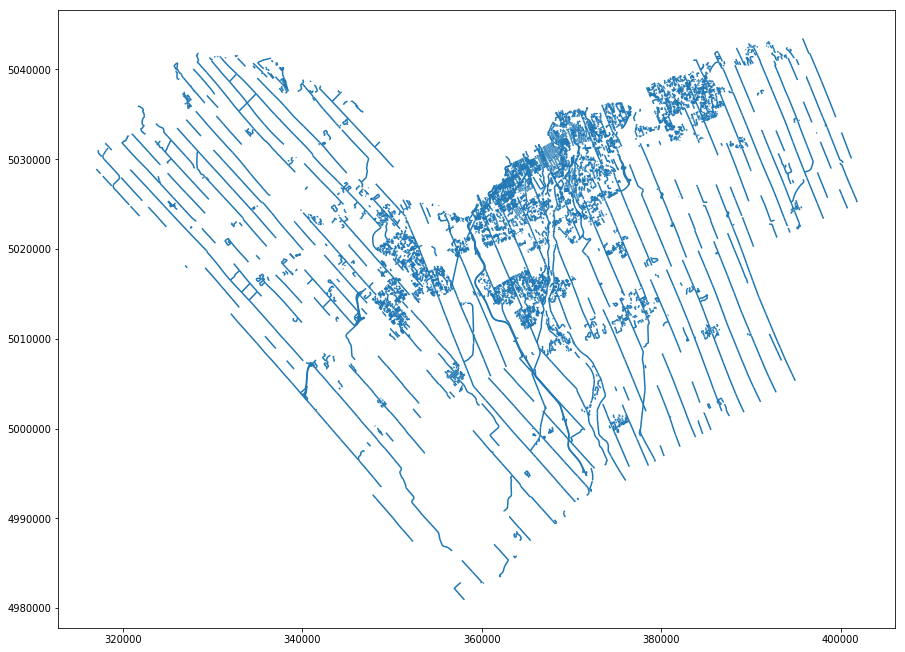

In [37]:
roads_temp_NS = roads[roads['DIRECTION'] == 'NS']
roads_temp_NS.plot(figsize =(15.0,15.0))

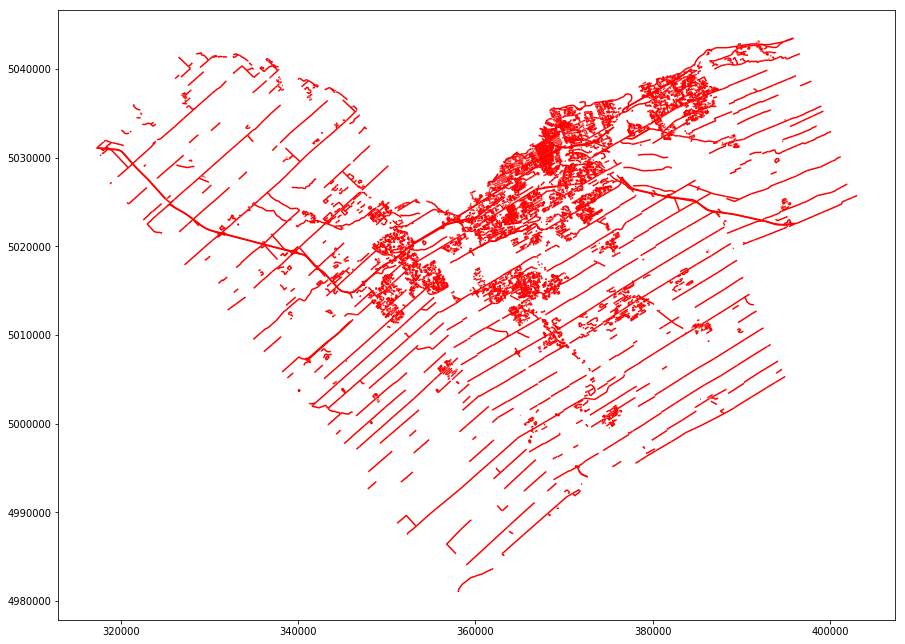

In [38]:
roads_temp_EW = roads[roads['DIRECTION'] != 'NS']
roads_temp_EW.plot(figsize =(15.0,15.0), color = 'red')

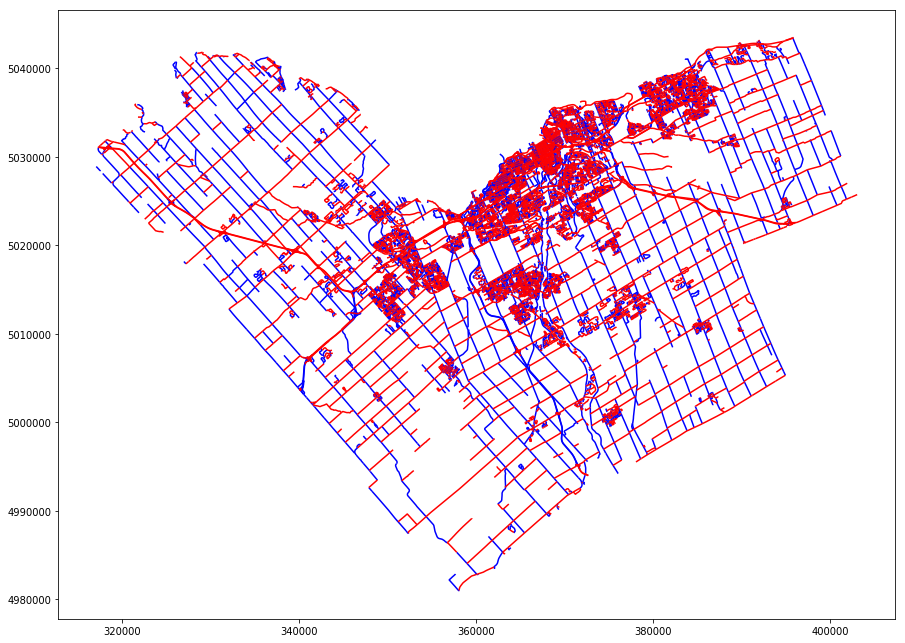

In [39]:
base = roads_temp_NS.plot(figsize =(15.0,15.0), color = 'blue')
roads_temp_EW.plot(ax = base, color = 'red')

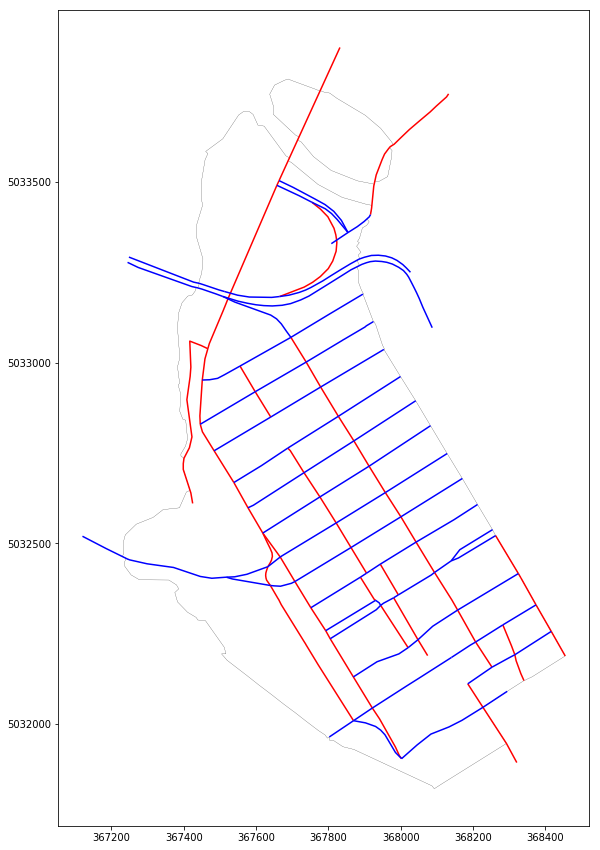

In [40]:
# Byward Market Area
byward = boundaries[boundaries['Name'] == 'Byward Market']
base = byward.plot(figsize =(15.0,15.0), edgecolor = 'black', color = 'white', linewidth = 0.2)
roads_temp_NS = roads_temp_NS[roads_temp_NS['ONS_NAME'] == 'Byward Market']

roads_temp_NS.plot(ax = base,figsize =(15.0,15.0), color = 'red')
roads_temp_EW = roads_temp_EW[roads_temp_EW['ONS_NAME'] == 'Byward Market']
roads_temp_EW.plot(ax = base, figsize =(15.0,15.0), color = 'blue')

## 6.2 Create Intersections

In [41]:
def create_intersections(items):
    
    start = datetime.datetime.now().replace(microsecond=0)
    print("Start Time:"+str(start))
    
    spatial_index = items.sindex
    
    df = pd.DataFrame(columns=['SUBTYPE','SUBCLASS','ROW_NUMBER', 'INTER_NAME', 
                               'INTER_RD_SEGMENT','geometry', 'ONS_ID', 'ONS_NAME'])        
    i = 0
    
    points_coords = pd.unique(items['FIRST_POINT_COORD']).tolist()
    
    total = len(items)
    one_per = int(round(total / 100))
    j = 0
    
    print(" Number of Roads to Validate:" + str(total))
    start_per = datetime.datetime.now().replace(microsecond=0)
    
    for index_items, row_items in items.iterrows():
        
        if (j == one_per): 
            end_per = datetime.datetime.now().replace(microsecond=0)
            per_done = round((1 - (total - index_items)/total)*100)
            print(" Percentage done: " + str(per_done) + str("% in ") + str(end_per - start_per))
            j = 0
            start_per = datetime.datetime.now().replace(microsecond=0)
            
        
        if row_items.geometry != None:
        
            if row_items['FIRST_POINT_COORD'] in points_coords:
                intersection_name = ""
                road_name = row_items['ROAD_NAME']
                road_segment = row_items['RD_SEGMENT']
                road_row_number = row_items['ROW_NUMBER']
                road_subtype = row_items['SUBTYPE']
                road_subclass = row_items['SUBCLASS'] 
                #road_ons_id = row_items['ONS_ID']
                #road_ons_name = row_items['ONS_NAME'] 
            
                p0 = row_items['FIRST_POINT']
                
            
                buffer_point = p0.buffer(1.0)
            
                buffer_point_bounds = buffer_point.bounds
             
                mask = list(spatial_index.intersection(buffer_point_bounds)) 
            
                items_intersec = items.iloc[mask]
                
                #mask = items.intersects(p0)
                #items_intersec = items[mask]
            
                items_intersec = items_intersec[items_intersec['ROW_NUMBER']!= road_row_number]
                items_intersec = items_intersec[items_intersec['RD_SEGMENT']!= road_segment]
                items_intersec.reset_index(drop=True, inplace=True)
            
                if (len(items_intersec) > 0):
                
                    #print("\nRoad Segment Name= " + str(road_name) + " / " + str(road_segment))
                    #print("    Number of Intersections:"+ str(len(items_intersec)))
                
                    names = pd.unique(items_intersec['ROAD_NAME']).tolist()
                    
                    #m = len(names)
                    #print("     Number of Unique names" + str(m))
                    #print("     Unique names" + str(names))
                
                    if (len(names) == 1):
                        intersection_name = road_name + ' @ ' + names[0]
                        intersection_rd_segment = road_segment + ' @ ' + items_intersec.loc[0,'RD_SEGMENT']
                    else:
                        if names.count(road_name) == 1:
                            names.remove(road_name) 
                            items_intersec = items_intersec[items_intersec['ROAD_NAME']!= road_name]
                            items_intersec.reset_index(drop=True, inplace=True)
                        
                            
                        intersection_name = road_name
                        intersection_rd_segment = road_segment
                
                        names.sort()
                        for x in names:
                            intersection_name = intersection_name + ' @ ' + str(x) 
                            
                            items_temp = items_intersec[items_intersec['ROAD_NAME'] == x]
                            items_temp.reset_index(drop=True, inplace=True)
                            
                            intersection_rd_segment = intersection_rd_segment + ' @ ' + items_temp.loc[0,'RD_SEGMENT']
                
                    #print("Intersection name:" + str(intersection_name))
        
                    df = df.append({'ROW_NUMBER': i, 
                                'SUBTYPE' : road_subtype,
                                'SUBCLASS' : "INTER-" + road_subclass,
                                'INTER_NAME' : intersection_name,
                                'INTER_RD_SEGMENT' : intersection_rd_segment,
                                'geometry' : p0}, ignore_index=True)
                    i = i + 1
            
                points_coords.remove(row_items['FIRST_POINT_COORD'])
        j = j + 1
    print("  Percentage done: 100%")    
    gdf = gpd.GeoDataFrame(df, geometry='geometry', crs={'init':'epsg:32189'})
    end = datetime.datetime.now().replace(microsecond=0)    
    print("Total Execution Time:" + str(end - start))
    return(gdf)

In [42]:
intersections = create_intersections(roads)
intersections.head()

Start Time:2019-02-21 20:12:11
 Number of Roads to Validate:26113
 Percentage done: 1% in 0:00:03
 Percentage done: 2% in 0:00:01
 Percentage done: 3% in 0:00:02
 Percentage done: 4% in 0:00:02
 Percentage done: 5% in 0:00:02
 Percentage done: 6% in 0:00:02
 Percentage done: 7% in 0:00:03
 Percentage done: 8% in 0:00:02
 Percentage done: 9% in 0:00:02
 Percentage done: 10% in 0:00:02
 Percentage done: 11% in 0:00:02
 Percentage done: 12% in 0:00:02
 Percentage done: 13% in 0:00:02
 Percentage done: 14% in 0:00:02
 Percentage done: 15% in 0:00:02
 Percentage done: 16% in 0:00:02
 Percentage done: 17% in 0:00:03
 Percentage done: 18% in 0:00:02
 Percentage done: 19% in 0:00:02
 Percentage done: 20% in 0:00:03
 Percentage done: 21% in 0:00:02
 Percentage done: 22% in 0:00:02
 Percentage done: 23% in 0:00:03
 Percentage done: 24% in 0:00:02
 Percentage done: 25% in 0:00:03
 Percentage done: 26% in 0:00:02
 Percentage done: 27% in 0:00:02
 Percentage done: 28% in 0:00:02
 Percentage done: 2

SUBTYPE        SUBCLASS ROW_NUMBER  \
0       5     INTER-LOCAL          0   
1       5     INTER-LOCAL          1   
2       5     INTER-LOCAL          2   
3       2  INTER-ARTERIAL          3   
4       9      INTER-RAMP          4   

                                          INTER_NAME  \
0  BARTONIA CIR @ JEROME JODOIN DR @ WILLOW ASTER...   
1   CALVINGTON AVE @ HUNTMAR DR @ MISSION TRAIL CRES   
2                        ST. ANDRE DR @ ST. ANDRE DR   
3        TENTH LINE RD @ DECOEUR DR @ SOUTHFIELD WAY   
4  HWY417 IC109 RAMP52 @ HIGHWAY 417 @ HWY417 IC1...   

                            INTER_RD_SEGMENT  \
0             e___2HCE @ e___2HCB @ e___2HC9   
1             __8A9ON4 @ e___2I5H @ __8A9OOV   
2                        __8IAYLV @ __8IAYSS   
3             __6733MX @ e___2HVA @ __68J6MQ   
4  e___1GZP @ e___2IGC @ e___1GZO @ e___1GZN   

                                      geometry ONS_ID ONS_NAME  
0       POINT (383774.5422999999 5033928.9266)    NaN      NaN  
1  POINT (348914.8573000003 5018247.953600001)    NaN      NaN  
2       POINT (379548.7309999997 5038416.6041)    NaN      NaN  
3              POINT (384551.517 5034726.5759)    NaN      NaN  
4  POINT (376293.8168000001 5027451.412699999)    NaN      NaN

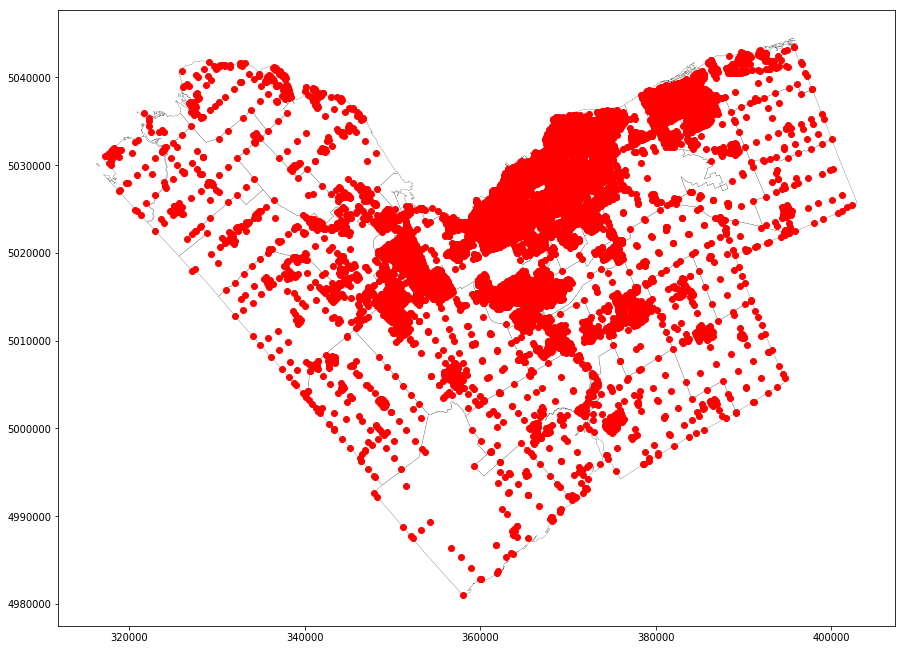

In [43]:
base = boundaries.plot(figsize =(15.0,15.0), edgecolor = 'black', color = 'white', linewidth = 0.2)
intersections.plot(ax = base,figsize =(15.0,15.0), color = 'red')

In [44]:
intersections.to_file('04 - Ottawa Intersections Opendata.shp', driver='ESRI Shapefile')
#intersections.to_file('04 - Ottawa Intersections Opendata.geojson', driver='GeoJSON')

## 6.3 Match Neighborhoods

In [45]:
intersections['ONS_ID'] = ""
intersections['ONS_NAME'] = ""

intersections = assing_nearest_area_by_whithin(intersections,boundaries)
intersections.head()

Start Time:2019-02-21 20:15:27
Number of items to Assign:15995
Checking Roads for Area:Orleans Industrial
  Number of Roads No Assigned (Empty ONS_ID):15995 %:100.0
  Number of Roads to be Assigned (Match Current Area):8
Iteration Time:0:00:00
Checking Roads for Area:Beechwood Cemetery
  Number of Roads No Assigned (Empty ONS_ID):15987 %:99.94998437011566
  Number of Roads to be Assigned (Match Current Area):4
Iteration Time:0:00:00
Checking Roads for Area:Notre-Dame Cemetery
  Number of Roads No Assigned (Empty ONS_ID):15983 %:99.9249765551735
  Number of Roads to be Assigned (Match Current Area):0
Iteration Time:0:00:00
Checking Roads for Area:Carleton University
  Number of Roads No Assigned (Empty ONS_ID):15983 %:99.9249765551735
  Number of Roads to be Assigned (Match Current Area):14
Iteration Time:0:00:00
Checking Roads for Area:Lebreton Development
  Number of Roads No Assigned (Empty ONS_ID):15969 %:99.83744920287589
  Number of Roads to be Assigned (Match Current Area):27
Ite

  Number of Roads to be Assigned (Match Current Area):188
Iteration Time:0:00:00
Checking Roads for Area:Glen Cairn - Kanata South Business Park
  Number of Roads No Assigned (Empty ONS_ID):11073 %:69.22788371366052
  Number of Roads to be Assigned (Match Current Area):175
Iteration Time:0:00:00
Checking Roads for Area:Greely
  Number of Roads No Assigned (Empty ONS_ID):10898 %:68.13379180994062
  Number of Roads to be Assigned (Match Current Area):264
Iteration Time:0:00:00
Checking Roads for Area:Greenbelt
  Number of Roads No Assigned (Empty ONS_ID):10634 %:66.48327602375743
  Number of Roads to be Assigned (Match Current Area):222
Iteration Time:0:00:05
Checking Roads for Area:Greenboro East
  Number of Roads No Assigned (Empty ONS_ID):10412 %:65.09534229446703
  Number of Roads to be Assigned (Match Current Area):123
Iteration Time:0:00:00
Checking Roads for Area:Hawthorne Meadows - Sheffield Glen
  Number of Roads No Assigned (Empty ONS_ID):10289 %:64.32635198499531
  Number of R

  Number of Roads to be Assigned (Match Current Area):87
Iteration Time:0:00:00
Checking Roads for Area:Qualicum - Redwood Park
  Number of Roads No Assigned (Empty ONS_ID):3767 %:23.551109721788055
  Number of Roads to be Assigned (Match Current Area):80
Iteration Time:0:00:00
Checking Roads for Area:Richmond
  Number of Roads No Assigned (Empty ONS_ID):3687 %:23.050953422944676
  Number of Roads to be Assigned (Match Current Area):373
Iteration Time:0:00:00
Checking Roads for Area:Riverside Park
  Number of Roads No Assigned (Empty ONS_ID):3314 %:20.718974679587376
  Number of Roads to be Assigned (Match Current Area):95
Iteration Time:0:00:00
Checking Roads for Area:Riverside South - Leitrim
  Number of Roads No Assigned (Empty ONS_ID):3219 %:20.12503907471085
  Number of Roads to be Assigned (Match Current Area):374
Iteration Time:0:00:00
Checking Roads for Area:Rockcliffe Park
  Number of Roads No Assigned (Empty ONS_ID):2845 %:17.786808377618
  Number of Roads to be Assigned (Mat

SUBTYPE        SUBCLASS ROW_NUMBER  \
0       5     INTER-LOCAL          0   
1       5     INTER-LOCAL          1   
2       5     INTER-LOCAL          2   
3       2  INTER-ARTERIAL          3   
4       9      INTER-RAMP          4   

                                          INTER_NAME  \
0  BARTONIA CIR @ JEROME JODOIN DR @ WILLOW ASTER...   
1   CALVINGTON AVE @ HUNTMAR DR @ MISSION TRAIL CRES   
2                        ST. ANDRE DR @ ST. ANDRE DR   
3        TENTH LINE RD @ DECOEUR DR @ SOUTHFIELD WAY   
4  HWY417 IC109 RAMP52 @ HIGHWAY 417 @ HWY417 IC1...   

                            INTER_RD_SEGMENT  \
0             e___2HCE @ e___2HCB @ e___2HC9   
1             __8A9ON4 @ e___2I5H @ __8A9OOV   
2                        __8IAYLV @ __8IAYSS   
3             __6733MX @ e___2HVA @ __68J6MQ   
4  e___1GZP @ e___2IGC @ e___1GZO @ e___1GZN   

                                      geometry ONS_ID  \
0       POINT (383774.5422999999 5033928.9266)     68   
1  POINT (348914.8573000003 5018247.953600001)     56   
2       POINT (379548.7309999997 5038416.6041)     78   
3              POINT (384551.517 5034726.5759)     72   
4  POINT (376293.8168000001 5027451.412699999)     44   

                                            ONS_NAME  
0                           Navan - Carlsbad Springs  
1  Kanata Lakes - Marchwood Lakeside - Morgan's G...  
2                                 Orleans North West  
3  Orleans Avalon - Notting Gate - Fallingbrook -...  
4                                          Greenbelt

In [46]:
intersections = assign_nearest_area_by_mindistance(intersections,boundaries)

intersections['ONS_ID'] = intersections['ONS_ID'].astype(str)
intersections['ONS_NAME'] = intersections['ONS_NAME'].astype(str)

intersections.to_file('05 - Ottawa Intersections with Neighborhoods Opendata.shp', driver='ESRI Shapefile')
#intersections.to_file('05 - Ottawa Intersections with Neighborhoods Opendata.geojson', driver='GeoJSON')
intersections[intersections['ONS_ID']==""]

Start Time:2019-02-21 20:15:43
Number of items to Assign:104
  Percentage done: 100%
Total Execution Time:0:00:01


Empty GeoDataFrame
Columns: [SUBTYPE, SUBCLASS, ROW_NUMBER, INTER_NAME, INTER_RD_SEGMENT, geometry, ONS_ID, ONS_NAME]
Index: []

# 7. Tabular Collision Data (2015-2017)

## 7.1 Load Shapefile

In [47]:
collision_data = gpd.read_file(collision_data_file, index = 'Record')
collision_data.info()
collision_data.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43494 entries, 0 to 43493
Data columns (total 19 columns):
Record        43494 non-null int64
Location      43494 non-null object
LocationA     43485 non-null object
LocationB     43485 non-null object
X             43494 non-null float64
Y             43494 non-null float64
Date          43494 non-null object
Time          43494 non-null object
Environmen    43493 non-null object
Road_Surfa    43494 non-null object
Traffic_Co    43472 non-null object
Collision_    43488 non-null object
Light         43492 non-null object
Collisio_1    43494 non-null object
Impact_typ    43494 non-null object
Longitude     43494 non-null float64
Latitude      43494 non-null float64
Date_Time     43494 non-null object
geometry      43494 non-null object
dtypes: float64(4), int64(1), object(14)
memory usage: 6.3+ MB


Record                                           Location  \
0       1                          LAURIER AVE @ O'CONNOR ST   
1       2    EVEREST PRIV btwn RUSSELL RD & ST. LAURENT BLVD   
2       3            DAVID DR btwn HOWDEN AVE & SULLIVAN AVE   
3       4  JEANNE D'ARC BLVD btwn HARLEQUIN CRES & HARLEQ...   
4       5              HUNT CLUB RD btwn MALAK ST & ESSON ST   

           LocationA                             LocationB            X  \
0        LAURIER AVE                         @ O'CONNOR ST  367635.7368   
1       EVEREST PRIV    btwn RUSSELL RD & ST. LAURENT BLVD  372924.6597   
2           DAVID DR        btwn HOWDEN AVE & SULLIVAN AVE  363134.9056   
3  JEANNE D'ARC BLVD  btwn HARLEQUIN CRES & HARLEQUIN CRES  382379.4913   
4       HUNT CLUB RD              btwn MALAK ST & ESSON ST  374210.1205   

             Y      Date         Time  Environmen Road_Surfa  \
0  5031359.059  1/1/2015  12:30:00 AM  01 - Clear   01 - Dry   
1  5029755.729  1/1/2015   2:55:00 AM  01 - Clear   01 - Dry   
2  5022989.571  1/1/2015   3:11:00 AM  01 - Clear   06 - Ice   
3  5039190.164  1/1/2015   4:00:00 AM  01 - Clear   01 - Dry   
4  5025666.529  1/1/2015   4:51:00 AM  01 - Clear   01 - Dry   

            Traffic_Co             Collision_      Light      Collisio_1  \
0  01 - Traffic signal   03 - At intersection  07 - Dark  03 - P.D. only   
1      10 - No control  01 - Non intersection  07 - Dark  03 - P.D. only   
2      10 - No control  01 - Non intersection  07 - Dark  03 - P.D. only   
3      10 - No control  01 - Non intersection  07 - Dark  03 - P.D. only   
4      10 - No control  01 - Non intersection  07 - Dark  03 - P.D. only   

                    Impact_typ  Longitude   Latitude      Date_Time  \
0                   02 - Angle -75.697108  45.419345  1/1/2015 0:30   
1               07 - SMV other -75.629757  45.404424  1/1/2015 2:55   
2  06 - SMV unattended vehicle -75.755601  45.344427  1/1/2015 3:11   
3  06 - SMV unattended vehicle -75.507508  45.488323  1/1/2015 4:00   
4               07 - SMV other -75.613913  45.367505  1/1/2015 4:51   

                          geometry  
0  POINT (367635.7368 5031359.059)  
1  POINT (372924.6597 5029755.729)  
2  POINT (363134.9056 5022989.571)  
3  POINT (382379.4913 5039190.164)  
4  POINT (374210.1205 5025666.529)

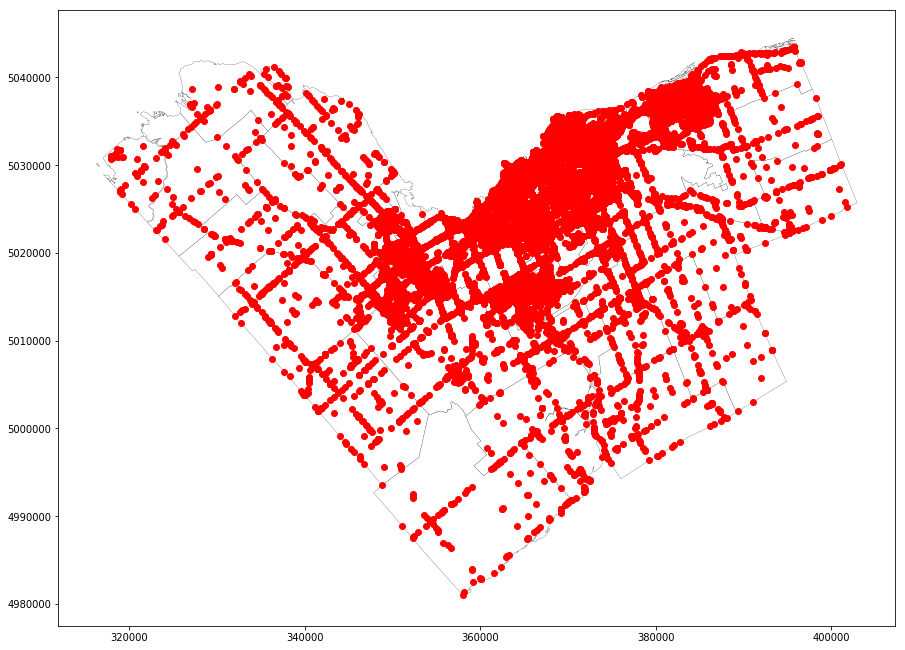

In [48]:
base = boundaries.plot(figsize =(15.0,15.0), edgecolor = 'black', color = 'white', linewidth = 0.2)
collision_data.plot(ax = base,figsize =(15.0,15.0), color = 'red')

## 7.2 Collisions Related with Intersections

In [49]:
#collision_data_inter = gpd.read_file(collision_data_intersections_file, index = 'ROW_NUMBER')
collision_data_inter = collision_data[ (collision_data['Collision_'] == '02 - Intersection related') | 
                                      (collision_data['Collision_'] == '03 - At intersection')]
collision_data_inter.reset_index(drop=True, inplace=True)
collision_data_inter.info()
collision_data_inter.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23249 entries, 0 to 23248
Data columns (total 19 columns):
Record        23249 non-null int64
Location      23249 non-null object
LocationA     23245 non-null object
LocationB     23245 non-null object
X             23249 non-null float64
Y             23249 non-null float64
Date          23249 non-null object
Time          23249 non-null object
Environmen    23249 non-null object
Road_Surfa    23249 non-null object
Traffic_Co    23227 non-null object
Collision_    23249 non-null object
Light         23249 non-null object
Collisio_1    23249 non-null object
Impact_typ    23249 non-null object
Longitude     23249 non-null float64
Latitude      23249 non-null float64
Date_Time     23249 non-null object
geometry      23249 non-null object
dtypes: float64(4), int64(1), object(14)
memory usage: 3.4+ MB


Record                                   Location             LocationA  \
0       1                  LAURIER AVE @ O'CONNOR ST           LAURIER AVE   
1       8                KING EDWARD AVE @ RIDEAU ST       KING EDWARD AVE   
2       9                BEATRICE DR @ STRANDHERD DR           BEATRICE DR   
3      11  QUEEN ELIZABETH DRWY @ QUEEN ELIZABETH PL  QUEEN ELIZABETH DRWY   
4      15          OLD TENTH LINE RD @ TENTH LINE RD     OLD TENTH LINE RD   

              LocationB            X            Y      Date         Time  \
0         @ O'CONNOR ST  367635.7368  5031359.059  1/1/2015  12:30:00 AM   
1           @ RIDEAU ST  368511.7072  5032414.670  1/1/2015   1:15:00 PM   
2       @ STRANDHERD DR  365527.3770  5015322.928  1/1/2015   1:54:00 PM   
3  @ QUEEN ELIZABETH PL  368583.7409  5028844.026  1/1/2015   3:15:00 PM   
4       @ TENTH LINE RD  383042.9790  5038359.461  1/1/2015   5:30:00 PM   

   Environmen       Road_Surfa           Traffic_Co  \
0  01 - Clear         01 - Dry  01 - Traffic signal   
1   03 - Snow  03 - Loose snow  01 - Traffic signal   
2  01 - Clear         01 - Dry  01 - Traffic signal   
3  01 - Clear         01 - Dry       02 - Stop sign   
4   03 - Snow         02 - Wet  01 - Traffic signal   

                  Collision_          Light             Collisio_1  \
0       03 - At intersection      07 - Dark         03 - P.D. only   
1       03 - At intersection  01 - Daylight         03 - P.D. only   
2       03 - At intersection  01 - Daylight  02 - Non-fatal injury   
3       03 - At intersection  01 - Daylight  02 - Non-fatal injury   
4  02 - Intersection related      05 - Dusk         03 - P.D. only   

              Impact_typ  Longitude   Latitude       Date_Time  \
0             02 - Angle -75.697108  45.419345   1/1/2015 0:30   
1          03 - Rear end -75.685779  45.428764  1/1/2015 13:15   
2  05 - Turning movement -75.726014  45.275240  1/1/2015 13:54   
3             02 - Angle -75.685321  45.396630  1/1/2015 15:15   
4          03 - Rear end -75.499153  45.480775  1/1/2015 17:30   

                          geometry  
0  POINT (367635.7368 5031359.059)  
1   POINT (368511.7072 5032414.67)  
2   POINT (365527.377 5015322.928)  
3  POINT (368583.7409 5028844.026)  
4   POINT (383042.979 5038359.461)

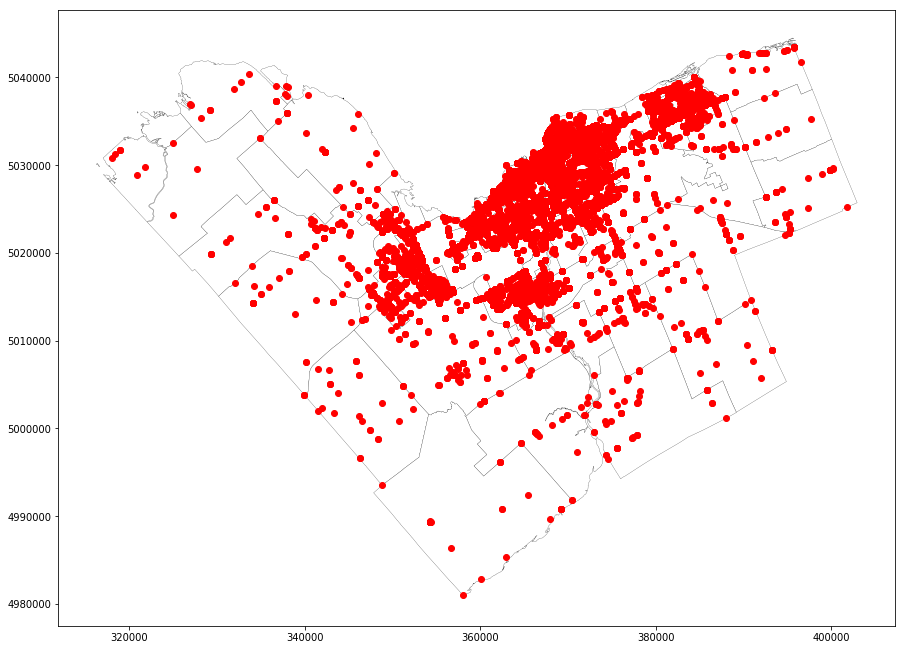

In [50]:
base = boundaries.plot(color='white', edgecolor='black',figsize =(15.0,15.0),linewidth=0.2)
collision_data_inter.plot(ax = base, color = 'red')

## 7.3 Collisions Non-Related with Intersections

In [51]:
#collision_data_noninter = gpd.read_file(collision_data_nonintersections_file, index = 'ROW_NUMBER')
collision_data_noninter = collision_data[ (collision_data['Collision_'] != '02 - Intersection related') & 
                                      (collision_data['Collision_'] != '03 - At intersection')]
collision_data_noninter.reset_index(drop=True, inplace=True)
collision_data_noninter.info()
collision_data_noninter.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20245 entries, 0 to 20244
Data columns (total 19 columns):
Record        20245 non-null int64
Location      20245 non-null object
LocationA     20240 non-null object
LocationB     20240 non-null object
X             20245 non-null float64
Y             20245 non-null float64
Date          20245 non-null object
Time          20245 non-null object
Environmen    20244 non-null object
Road_Surfa    20245 non-null object
Traffic_Co    20245 non-null object
Collision_    20239 non-null object
Light         20243 non-null object
Collisio_1    20245 non-null object
Impact_typ    20245 non-null object
Longitude     20245 non-null float64
Latitude      20245 non-null float64
Date_Time     20245 non-null object
geometry      20245 non-null object
dtypes: float64(4), int64(1), object(14)
memory usage: 2.9+ MB


Record                                           Location  \
0       2    EVEREST PRIV btwn RUSSELL RD & ST. LAURENT BLVD   
1       3            DAVID DR btwn HOWDEN AVE & SULLIVAN AVE   
2       4  JEANNE D'ARC BLVD btwn HARLEQUIN CRES & HARLEQ...   
3       5              HUNT CLUB RD btwn MALAK ST & ESSON ST   
4       6       IRIS ST btwn TO BE DETERMINED & SOUTHWOOD DR   

           LocationA                             LocationB            X  \
0       EVEREST PRIV    btwn RUSSELL RD & ST. LAURENT BLVD  372924.6597   
1           DAVID DR        btwn HOWDEN AVE & SULLIVAN AVE  363134.9056   
2  JEANNE D'ARC BLVD  btwn HARLEQUIN CRES & HARLEQUIN CRES  382379.4913   
3       HUNT CLUB RD              btwn MALAK ST & ESSON ST  374210.1205   
4            IRIS ST  btwn TO BE DETERMINED & SOUTHWOOD DR  360768.6171   

             Y      Date        Time  Environmen Road_Surfa       Traffic_Co  \
0  5029755.729  1/1/2015  2:55:00 AM  01 - Clear   01 - Dry  10 - No control   
1  5022989.571  1/1/2015  3:11:00 AM  01 - Clear   06 - Ice  10 - No control   
2  5039190.164  1/1/2015  4:00:00 AM  01 - Clear   01 - Dry  10 - No control   
3  5025666.529  1/1/2015  4:51:00 AM  01 - Clear   01 - Dry  10 - No control   
4  5023405.220  1/1/2015  8:44:00 AM  01 - Clear   01 - Dry  10 - No control   

              Collision_          Light             Collisio_1  \
0  01 - Non intersection      07 - Dark         03 - P.D. only   
1  01 - Non intersection      07 - Dark         03 - P.D. only   
2  01 - Non intersection      07 - Dark         03 - P.D. only   
3  01 - Non intersection      07 - Dark         03 - P.D. only   
4  01 - Non intersection  01 - Daylight  02 - Non-fatal injury   

                    Impact_typ  Longitude   Latitude      Date_Time  \
0               07 - SMV other -75.629757  45.404424  1/1/2015 2:55   
1  06 - SMV unattended vehicle -75.755601  45.344427  1/1/2015 3:11   
2  06 - SMV unattended vehicle -75.507508  45.488323  1/1/2015 4:00   
3               07 - SMV other -75.613913  45.367505  1/1/2015 4:51   
4               07 - SMV other -75.785748  45.348360  1/1/2015 8:44   

                          geometry  
0  POINT (372924.6597 5029755.729)  
1  POINT (363134.9056 5022989.571)  
2  POINT (382379.4913 5039190.164)  
3  POINT (374210.1205 5025666.529)  
4   POINT (360768.6171 5023405.22)

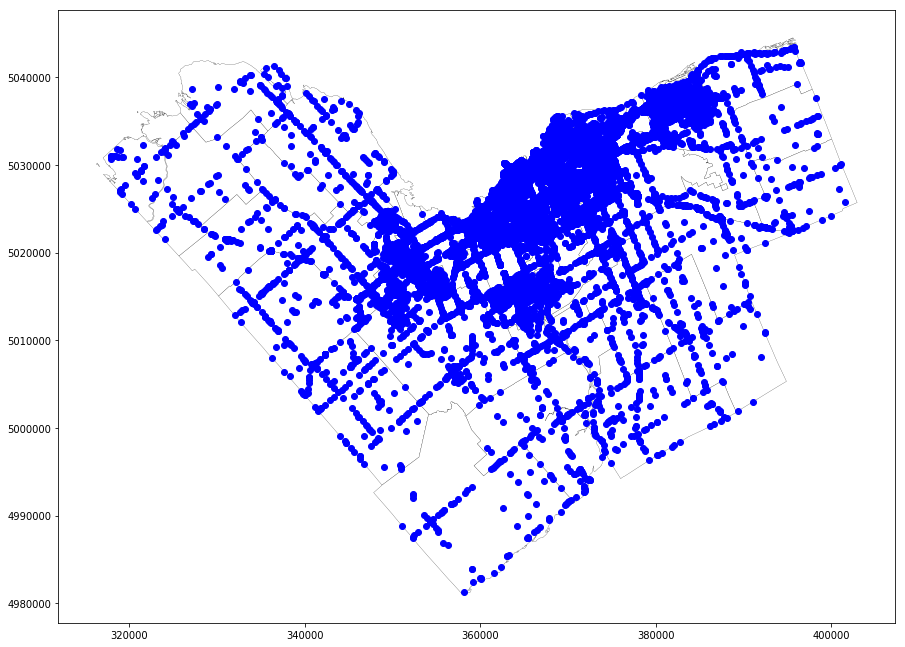

In [52]:
base = boundaries.plot(color='white', edgecolor='black',figsize =(15.0,15.0),linewidth=0.2)
collision_data_noninter.plot(ax = base, color = 'blue')

## 7.4 Plot Collision Colored by Type

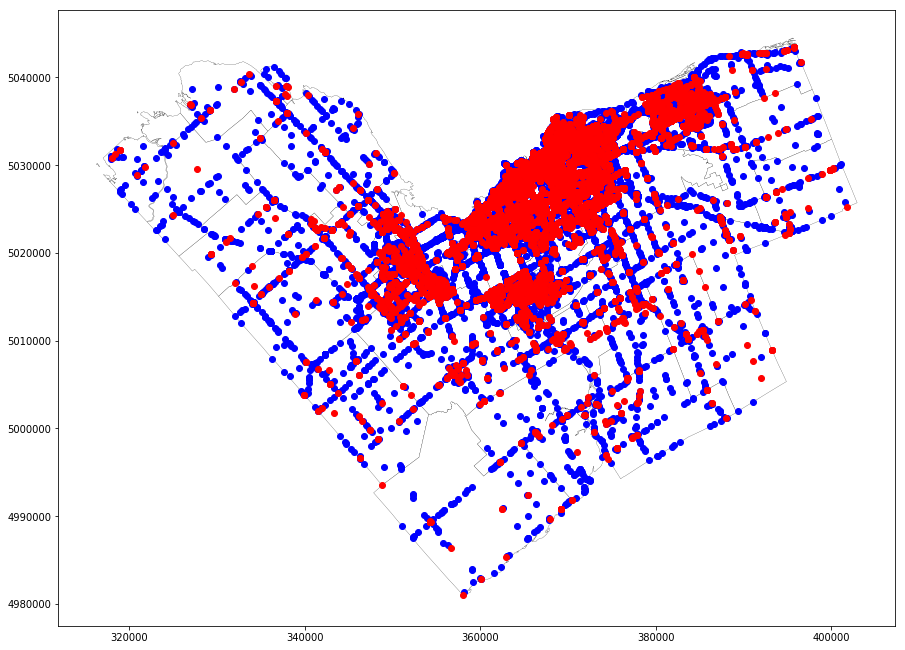

In [92]:
base = boundaries.plot(color='white', edgecolor='black',figsize =(15.0,15.0),linewidth=0.2)
collision_data_noninter.plot(ax = base, color = 'blue')
collision_data_inter.plot(ax = base, color = 'red')

## 7.5 Match Collisions to Neighborhoods

### 7.5.1 Collisions (Intersections)

In [54]:
collision_data_inter['ONS_ID'] = ""
collision_data_inter['ONS_NAME'] = ""
collision_data_inter = assing_nearest_area_by_whithin(collision_data_inter,boundaries)
collision_data_inter.head()

C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Start Time:2019-02-21 20:16:02
Number of items to Assign:23249
Checking Roads for Area:Orleans Industrial
  Number of Roads No Assigned (Empty ONS_ID):23249 %:100.0
  Number of Roads to be Assigned (Match Current Area):94
Iteration Time:0:00:00
Checking Roads for Area:Beechwood Cemetery
  Number of Roads No Assigned (Empty ONS_ID):23155 %:99.59568153468966
  Number of Roads to be Assigned (Match Current Area):7
Iteration Time:0:00:00
Checking Roads for Area:Notre-Dame Cemetery
  Number of Roads No Assigned (Empty ONS_ID):23148 %:99.56557271280485
  Number of Roads to be Assigned (Match Current Area):16
Iteration Time:0:00:00
Checking Roads for Area:Carleton University
  Number of Roads No Assigned (Empty ONS_ID):23132 %:99.49675254849672
  Number of Roads to be Assigned (Match Current Area):92
Iteration Time:0:00:00
Checking Roads for Area:Lebreton Development
  Number of Roads No Assigned (Empty ONS_ID):23040 %:99.10103660372489
  Number of Roads to be Assigned (Match Current Area):15

  Number of Roads No Assigned (Empty ONS_ID):14239 %:61.24564497397738
  Number of Roads to be Assigned (Match Current Area):275
Iteration Time:0:00:00
Checking Roads for Area:Greely
  Number of Roads No Assigned (Empty ONS_ID):13964 %:60.06279839993118
  Number of Roads to be Assigned (Match Current Area):164
Iteration Time:0:00:01
Checking Roads for Area:Greenbelt
  Number of Roads No Assigned (Empty ONS_ID):13800 %:59.35739171577272
  Number of Roads to be Assigned (Match Current Area):922
Iteration Time:0:00:07
Checking Roads for Area:Greenboro East
  Number of Roads No Assigned (Empty ONS_ID):12878 %:55.39162974751603
  Number of Roads to be Assigned (Match Current Area):141
Iteration Time:0:00:00
Checking Roads for Area:Hawthorne Meadows - Sheffield Glen
  Number of Roads No Assigned (Empty ONS_ID):12737 %:54.785152049550526
  Number of Roads to be Assigned (Match Current Area):120
Iteration Time:0:00:00
Checking Roads for Area:Hintonburg - Mechanicsville
  Number of Roads No Ass

  Number of Roads to be Assigned (Match Current Area):261
Iteration Time:0:00:00
Checking Roads for Area:Riverside Park
  Number of Roads No Assigned (Empty ONS_ID):4576 %:19.68256699212869
  Number of Roads to be Assigned (Match Current Area):213
Iteration Time:0:00:00
Checking Roads for Area:Riverside South - Leitrim
  Number of Roads No Assigned (Empty ONS_ID):4363 %:18.766398554776554
  Number of Roads to be Assigned (Match Current Area):253
Iteration Time:0:00:00
Checking Roads for Area:Rockcliffe Park
  Number of Roads No Assigned (Empty ONS_ID):4110 %:17.678179706654053
  Number of Roads to be Assigned (Match Current Area):47
Iteration Time:0:00:00
Checking Roads for Area:Rothwell Heights - Beacon Hill North
  Number of Roads No Assigned (Empty ONS_ID):4063 %:17.476020473998876
  Number of Roads to be Assigned (Match Current Area):103
Iteration Time:0:00:00
Checking Roads for Area:Russell - Edwards
  Number of Roads No Assigned (Empty ONS_ID):3960 %:17.032990666265214
  Number o

Record                                   Location             LocationA  \
0       1                  LAURIER AVE @ O'CONNOR ST           LAURIER AVE   
1       8                KING EDWARD AVE @ RIDEAU ST       KING EDWARD AVE   
2       9                BEATRICE DR @ STRANDHERD DR           BEATRICE DR   
3      11  QUEEN ELIZABETH DRWY @ QUEEN ELIZABETH PL  QUEEN ELIZABETH DRWY   
4      15          OLD TENTH LINE RD @ TENTH LINE RD     OLD TENTH LINE RD   

              LocationB            X            Y      Date         Time  \
0         @ O'CONNOR ST  367635.7368  5031359.059  1/1/2015  12:30:00 AM   
1           @ RIDEAU ST  368511.7072  5032414.670  1/1/2015   1:15:00 PM   
2       @ STRANDHERD DR  365527.3770  5015322.928  1/1/2015   1:54:00 PM   
3  @ QUEEN ELIZABETH PL  368583.7409  5028844.026  1/1/2015   3:15:00 PM   
4       @ TENTH LINE RD  383042.9790  5038359.461  1/1/2015   5:30:00 PM   

   Environmen       Road_Surfa                     ...                       \
0  01 - Clear         01 - Dry                     ...                        
1   03 - Snow  03 - Loose snow                     ...                        
2  01 - Clear         01 - Dry                     ...                        
3  01 - Clear         01 - Dry                     ...                        
4   03 - Snow         02 - Wet                     ...                        

                  Collision_          Light             Collisio_1  \
0       03 - At intersection      07 - Dark         03 - P.D. only   
1       03 - At intersection  01 - Daylight         03 - P.D. only   
2       03 - At intersection  01 - Daylight  02 - Non-fatal injury   
3       03 - At intersection  01 - Daylight  02 - Non-fatal injury   
4  02 - Intersection related      05 - Dusk         03 - P.D. only   

              Impact_typ  Longitude   Latitude       Date_Time  \
0             02 - Angle -75.697108  45.419345   1/1/2015 0:30   
1          03 - Rear end -75.685779  45.428764  1/1/2015 13:15   
2  05 - Turning movement -75.726014  45.275240  1/1/2015 13:54   
3             02 - Angle -75.685321  45.396630  1/1/2015 15:15   
4          03 - Rear end -75.499153  45.480775  1/1/2015 17:30   

                          geometry ONS_ID  \
0  POINT (367635.7368 5031359.059)     24   
1   POINT (368511.7072 5032414.67)     63   
2   POINT (365527.377 5015322.928)     69   
3  POINT (368583.7409 5028844.026)     41   
4   POINT (383042.979 5038359.461)     79   

                                      ONS_NAME  
0                                   Centretown  
1                                    Lowertown  
2  Stonebridge - Halfmoon Bay - Heart's Desire  
3                            Glebe - Dows Lake  
4                           Queenswood Heights  

[5 rows x 21 columns]

In [55]:
collision_data_inter = assign_nearest_area_by_mindistance(collision_data_inter,boundaries)

collision_data_inter['ONS_ID'] = collision_data_inter['ONS_ID'].astype(str)
collision_data_inter['ONS_NAME'] = collision_data_inter['ONS_NAME'].astype(str)

collision_data_inter.to_file('06 - Ottawa Tabular Collision Data Intersections with Neighborhoods Opendata.shp', driver='ESRI Shapefile')
#collision_data_inter.to_file('06 - Ottawa Collision Data Intersections with Neighborhoods Opendata.geojson', driver='GeoJSON')
collision_data_inter[collision_data_inter['ONS_ID']==""]

Start Time:2019-02-21 20:16:24
Number of items to Assign:151
  Percentage done: 100%
Total Execution Time:0:00:01


C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Empty GeoDataFrame
Columns: [Record, Location, LocationA, LocationB, X, Y, Date, Time, Environmen, Road_Surfa, Traffic_Co, Collision_, Light, Collisio_1, Impact_typ, Longitude, Latitude, Date_Time, geometry, ONS_ID, ONS_NAME]
Index: []

[0 rows x 21 columns]

### 7.5.2 Collisions (Non-Intersections)

In [56]:
collision_data_noninter['ONS_ID'] = ""
collision_data_noninter['ONS_NAME'] = ""
collision_data_noninter = assing_nearest_area_by_whithin(collision_data_noninter,boundaries)
collision_data_noninter.head()

C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Start Time:2019-02-21 20:16:42
Number of items to Assign:20245
Checking Roads for Area:Orleans Industrial
  Number of Roads No Assigned (Empty ONS_ID):20245 %:100.0
  Number of Roads to be Assigned (Match Current Area):34
Iteration Time:0:00:00
Checking Roads for Area:Beechwood Cemetery
  Number of Roads No Assigned (Empty ONS_ID):20211 %:99.83205729809829
  Number of Roads to be Assigned (Match Current Area):9
Iteration Time:0:00:00
Checking Roads for Area:Notre-Dame Cemetery
  Number of Roads No Assigned (Empty ONS_ID):20202 %:99.78760187700667
  Number of Roads to be Assigned (Match Current Area):3
Iteration Time:0:00:00
Checking Roads for Area:Carleton University
  Number of Roads No Assigned (Empty ONS_ID):20199 %:99.77278340330946
  Number of Roads to be Assigned (Match Current Area):53
Iteration Time:0:00:01
Checking Roads for Area:Lebreton Development
  Number of Roads No Assigned (Empty ONS_ID):20146 %:99.5109903679921
  Number of Roads to be Assigned (Match Current Area):63
I

Iteration Time:0:00:00
Checking Roads for Area:Glen Cairn - Kanata South Business Park
  Number of Roads No Assigned (Empty ONS_ID):12896 %:63.69967893306989
  Number of Roads to be Assigned (Match Current Area):140
Iteration Time:0:00:01
Checking Roads for Area:Greely
  Number of Roads No Assigned (Empty ONS_ID):12756 %:63.008150160533475
  Number of Roads to be Assigned (Match Current Area):170
Iteration Time:0:00:00
Checking Roads for Area:Greenbelt
  Number of Roads No Assigned (Empty ONS_ID):12586 %:62.16843665102494
  Number of Roads to be Assigned (Match Current Area):1525
Iteration Time:0:00:07
Checking Roads for Area:Greenboro East
  Number of Roads No Assigned (Empty ONS_ID):11061 %:54.63571252161028
  Number of Roads to be Assigned (Match Current Area):97
Iteration Time:0:00:00
Checking Roads for Area:Hawthorne Meadows - Sheffield Glen
  Number of Roads No Assigned (Empty ONS_ID):10964 %:54.15658187206718
  Number of Roads to be Assigned (Match Current Area):63
Iteration Tim

  Number of Roads No Assigned (Empty ONS_ID):4476 %:22.10916275623611
  Number of Roads to be Assigned (Match Current Area):160
Iteration Time:0:00:00
Checking Roads for Area:Playfair Park - Lynda Park - Guildwood Estates
  Number of Roads No Assigned (Empty ONS_ID):4316 %:21.31884415905162
  Number of Roads to be Assigned (Match Current Area):39
Iteration Time:0:00:00
Checking Roads for Area:Qualicum - Redwood Park
  Number of Roads No Assigned (Empty ONS_ID):4277 %:21.126204000987904
  Number of Roads to be Assigned (Match Current Area):82
Iteration Time:0:00:00
Checking Roads for Area:Richmond
  Number of Roads No Assigned (Empty ONS_ID):4195 %:20.721165719930845
  Number of Roads to be Assigned (Match Current Area):378
Iteration Time:0:00:00
Checking Roads for Area:Riverside Park
  Number of Roads No Assigned (Empty ONS_ID):3817 %:18.85403803408249
  Number of Roads to be Assigned (Match Current Area):147
Iteration Time:0:00:00
Checking Roads for Area:Riverside South - Leitrim
  Nu

Record                                           Location  \
0       2    EVEREST PRIV btwn RUSSELL RD & ST. LAURENT BLVD   
1       3            DAVID DR btwn HOWDEN AVE & SULLIVAN AVE   
2       4  JEANNE D'ARC BLVD btwn HARLEQUIN CRES & HARLEQ...   
3       5              HUNT CLUB RD btwn MALAK ST & ESSON ST   
4       6       IRIS ST btwn TO BE DETERMINED & SOUTHWOOD DR   

           LocationA                             LocationB            X  \
0       EVEREST PRIV    btwn RUSSELL RD & ST. LAURENT BLVD  372924.6597   
1           DAVID DR        btwn HOWDEN AVE & SULLIVAN AVE  363134.9056   
2  JEANNE D'ARC BLVD  btwn HARLEQUIN CRES & HARLEQUIN CRES  382379.4913   
3       HUNT CLUB RD              btwn MALAK ST & ESSON ST  374210.1205   
4            IRIS ST  btwn TO BE DETERMINED & SOUTHWOOD DR  360768.6171   

             Y      Date        Time  Environmen Road_Surfa  \
0  5029755.729  1/1/2015  2:55:00 AM  01 - Clear   01 - Dry   
1  5022989.571  1/1/2015  3:11:00 AM  01 - Clear   06 - Ice   
2  5039190.164  1/1/2015  4:00:00 AM  01 - Clear   01 - Dry   
3  5025666.529  1/1/2015  4:51:00 AM  01 - Clear   01 - Dry   
4  5023405.220  1/1/2015  8:44:00 AM  01 - Clear   01 - Dry   

                  ...                             Collision_          Light  \
0                 ...                  01 - Non intersection      07 - Dark   
1                 ...                  01 - Non intersection      07 - Dark   
2                 ...                  01 - Non intersection      07 - Dark   
3                 ...                  01 - Non intersection      07 - Dark   
4                 ...                  01 - Non intersection  01 - Daylight   

              Collisio_1                   Impact_typ  Longitude   Latitude  \
0         03 - P.D. only               07 - SMV other -75.629757  45.404424   
1         03 - P.D. only  06 - SMV unattended vehicle -75.755601  45.344427   
2         03 - P.D. only  06 - SMV unattended vehicle -75.507508  45.488323   
3         03 - P.D. only               07 - SMV other -75.613913  45.367505   
4  02 - Non-fatal injury               07 - SMV other -75.785748  45.348360   

       Date_Time                         geometry ONS_ID  \
0  1/1/2015 2:55  POINT (372924.6597 5029755.729)     36   
1  1/1/2015 3:11  POINT (363134.9056 5022989.571)     31   
2  1/1/2015 4:00  POINT (382379.4913 5039190.164)     76   
3  1/1/2015 4:51  POINT (374210.1205 5025666.529)     50   
4  1/1/2015 8:44   POINT (360768.6171 5023405.22)     54   

                             ONS_NAME  
0                     East Industrial  
1  Cityview - Crestview - Meadowlands  
2                  Chatelaine Village  
3                      Hunt Club Park  
4                                Iris  

[5 rows x 21 columns]

In [57]:
collision_data_noninter = assign_nearest_area_by_mindistance(collision_data_noninter,boundaries)

collision_data_noninter['ONS_ID'] = collision_data_noninter['ONS_ID'].astype(str)
collision_data_noninter['ONS_NAME'] = collision_data_noninter['ONS_NAME'].astype(str)

collision_data_noninter.to_file('07 - Ottawa Tabular Collision Data Nonintersections with Neighborhoods Opendata.shp', driver='ESRI Shapefile')
#collision_data_noninter.to_file('07 - Ottawa Tabular Collision Data Nonintersections with Neighborhoods Opendata.geojson', driver='GeoJSON')
collision_data_noninter[collision_data_noninter['ONS_ID']==""]

Start Time:2019-02-21 20:17:03
Number of items to Assign:182
  Percentage done: 100%
Total Execution Time:0:00:01


C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Empty GeoDataFrame
Columns: [Record, Location, LocationA, LocationB, X, Y, Date, Time, Environmen, Road_Surfa, Traffic_Co, Collision_, Light, Collisio_1, Impact_typ, Longitude, Latitude, Date_Time, geometry, ONS_ID, ONS_NAME]
Index: []

[0 rows x 21 columns]

### 7.5.3 Collision by Type in Carleton Area

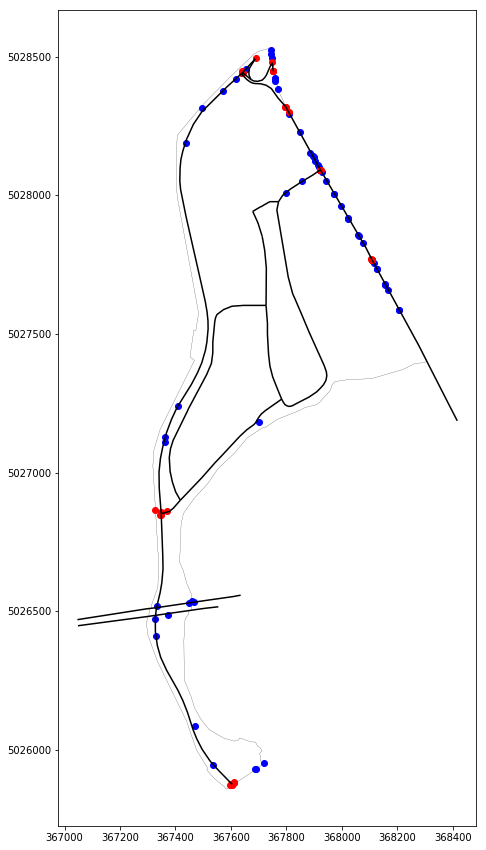

In [58]:
collision_data_noninter_carleton = collision_data_noninter[collision_data_noninter['ONS_NAME'] == 'Carleton University']
collision_data_inter_carleton = collision_data_inter[collision_data_inter['ONS_NAME'] == 'Carleton University']
roads_carleton = roads[roads['ONS_NAME'] == 'Carleton University']

base = carleton.plot(color='white', edgecolor='black',figsize =(15.0,15.0),linewidth=0.2)
collision_data_noninter_carleton.plot(ax = base, color = 'blue')
collision_data_inter_carleton.plot(ax = base, color = 'red')
roads_carleton.plot(ax = base, color = 'black')

## 7.6 Match Collisions (Non-Intersections) to Road Segments using Spatial Index (RTREE)

In [61]:
def assign_nearest_road_segment_by_mindistance(points, roads):
    
    start = datetime.datetime.now().replace(microsecond=0)
    print("Start Time:"+str(start))
        
    spatial_index = roads.sindex

    
    points['ROAD_SUBTYPE'] =""
    points['ROAD_SUBCLASS'] =""
    points['ROAD_SEGMENT'] =""
    points['ROAD_NAME'] =""
    points['ROAD_ROW_NUMBER'] = ""
    
    points['ROAD_SINUOSITY'] = ""
    points['ROAD_LEN'] = ""
    points['ROAD_DIRECTION'] = ""
    
    road_subtype = points.columns.get_loc('ROAD_SUBTYPE')
    road_subclass = points.columns.get_loc('ROAD_SUBCLASS')
    road_segment = points.columns.get_loc('ROAD_SEGMENT')
    road_name = points.columns.get_loc('ROAD_NAME')
    road_row_n = points.columns.get_loc('ROAD_ROW_NUMBER')
    
    road_sinuosity = points.columns.get_loc('ROAD_SINUOSITY')
    road_len = points.columns.get_loc('ROAD_LEN')
    road_direction = points.columns.get_loc('ROAD_DIRECTION')

    total_point = len(points)
    one_per_point = int(round(total_point / 100))
    #print(" One per cent is "+ str(one_per_point))
    print("Total number of Points to Handle:" + str(total_point))
    j = 0
    
    start_per = datetime.datetime.now().replace(microsecond=0)
    
    for index_point, row_point in points.iterrows():
        
        if (j == one_per_point): 
            end_per = datetime.datetime.now().replace(microsecond=0)
            per_done_point = round((1 - (total_point - index_point)/total_point)*100)
            print(" Percentage done: " + str(per_done_point) + str("% in ") + str(end_per - start_per))
            j = 0
            start_per = datetime.datetime.now().replace(microsecond=0)
        
        
        if row_point.geometry != None:
        
            buffer_point = row_point['geometry'].buffer(100.0)
            
            buffer_point_bounds = buffer_point.bounds
             
            mask_roads_around= list(spatial_index.intersection(buffer_point_bounds)) 
            
            roads_around = roads.iloc[mask_roads_around]
                
            #mask_roads_around = roads['geometry'].intersects(buffer_point)
        
            #roads_around = roads[mask_roads_around]
        
            if (len(roads_around) > 0):
                d = roads_around.distance(row_point.geometry)
                d_min = d.min()
            
                road_id = d[d==d_min].index[0]
        
                closest_road = roads.iloc[road_id]
        
                #print("Name of the Closes Road:" + str(closest_road['ROAD_NAME']) + str(closest_road['RD_SEGMENT']))
        
                points.iat[index_point,road_subtype] = closest_road['SUBTYPE']
                points.iat[index_point,road_subclass] = closest_road['SUBCLASS']
            
                points.iat[index_point,road_segment] = closest_road['RD_SEGMENT']
                points.iat[index_point,road_name] = closest_road['ROAD_NAME']
                points.iat[index_point,road_row_n] = closest_road['ROW_NUMBER']
                
                points.iat[index_point,road_sinuosity] = closest_road['SINUOSITY']
                points.iat[index_point,road_len] = closest_road['SHAPE_Leng']
                points.iat[index_point,road_direction] = closest_road['DIRECTION']
                
        j= j+1

    print("  Percentage done: 100%")
    end = datetime.datetime.now().replace(microsecond=0)    
    print("Total Execution Time:" + str(end - start))
    
    return(points)

In [62]:
collision_data_noninter = assign_nearest_road_segment_by_mindistance(collision_data_noninter, roads)
collision_data_noninter.head()

Start Time:2019-02-21 20:17:17


C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Total number of Points to Handle:20245
 Percentage done: 1% in 0:00:01
 Percentage done: 2% in 0:00:00
 Percentage done: 3% in 0:00:00
 Percentage done: 4% in 0:00:01
 Percentage done: 5% in 0:00:00
 Percentage done: 6% in 0:00:01
 Percentage done: 7% in 0:00:00
 Percentage done: 8% in 0:00:01
 Percentage done: 9% in 0:00:00
 Percentage done: 10% in 0:00:01
 Percentage done: 11% in 0:00:00
 Percentage done: 12% in 0:00:01
 Percentage done: 13% in 0:00:00
 Percentage done: 14% in 0:00:01
 Percentage done: 15% in 0:00:00
 Percentage done: 16% in 0:00:01
 Percentage done: 17% in 0:00:01
 Percentage done: 18% in 0:00:00
 Percentage done: 19% in 0:00:01
 Percentage done: 20% in 0:00:00
 Percentage done: 21% in 0:00:01
 Percentage done: 22% in 0:00:00
 Percentage done: 23% in 0:00:01
 Percentage done: 24% in 0:00:01
 Percentage done: 25% in 0:00:00
 Percentage done: 26% in 0:00:01
 Percentage done: 27% in 0:00:00
 Percentage done: 28% in 0:00:01
 Percentage done: 29% in 0:00:00
 Percentage d

Record                                           Location  \
0       2    EVEREST PRIV btwn RUSSELL RD & ST. LAURENT BLVD   
1       3            DAVID DR btwn HOWDEN AVE & SULLIVAN AVE   
2       4  JEANNE D'ARC BLVD btwn HARLEQUIN CRES & HARLEQ...   
3       5              HUNT CLUB RD btwn MALAK ST & ESSON ST   
4       6       IRIS ST btwn TO BE DETERMINED & SOUTHWOOD DR   

           LocationA                             LocationB            X  \
0       EVEREST PRIV    btwn RUSSELL RD & ST. LAURENT BLVD  372924.6597   
1           DAVID DR        btwn HOWDEN AVE & SULLIVAN AVE  363134.9056   
2  JEANNE D'ARC BLVD  btwn HARLEQUIN CRES & HARLEQUIN CRES  382379.4913   
3       HUNT CLUB RD              btwn MALAK ST & ESSON ST  374210.1205   
4            IRIS ST  btwn TO BE DETERMINED & SOUTHWOOD DR  360768.6171   

             Y      Date        Time  Environmen Road_Surfa      ...        \
0  5029755.729  1/1/2015  2:55:00 AM  01 - Clear   01 - Dry      ...         
1  5022989.571  1/1/2015  3:11:00 AM  01 - Clear   06 - Ice      ...         
2  5039190.164  1/1/2015  4:00:00 AM  01 - Clear   01 - Dry      ...         
3  5025666.529  1/1/2015  4:51:00 AM  01 - Clear   01 - Dry      ...         
4  5023405.220  1/1/2015  8:44:00 AM  01 - Clear   01 - Dry      ...         

  ONS_ID                            ONS_NAME ROAD_SUBTYPE ROAD_SUBCLASS  \
0     36                     East Industrial            5         LOCAL   
1     31  Cityview - Crestview - Meadowlands            5         LOCAL   
2     76                  Chatelaine Village            3  MAJCOLLECTOR   
3     50                      Hunt Club Park            2      ARTERIAL   
4     54                                Iris            3  MAJCOLLECTOR   

  ROAD_SEGMENT          ROAD_NAME  ROAD_ROW_NUMBER ROAD_SINUOSITY ROAD_LEN  \
0     e___1GYG       EVEREST PRIV            24310        1.11641   272.16   
1     __3Z0GDI           DAVID DR             3247              1  275.857   
2     __3Z0A7R  JEANNE D'ARC BLVD            13078        1.00084  105.468   
3     __3Z08D1       HUNT CLUB RD             8647              1  513.258   
4     __3ZAH82            IRIS ST            10014        1.00253  137.343   

  ROAD_DIRECTION  
0             EW  
1             EW  
2             EW  
3             EW  
4             EW  

[5 rows x 29 columns]

In [63]:
collision_data_noninter[collision_data_noninter['ROAD_NAME'] == ""]

Empty GeoDataFrame
Columns: [Record, Location, LocationA, LocationB, X, Y, Date, Time, Environmen, Road_Surfa, Traffic_Co, Collision_, Light, Collisio_1, Impact_typ, Longitude, Latitude, Date_Time, geometry, ONS_ID, ONS_NAME, ROAD_SUBTYPE, ROAD_SUBCLASS, ROAD_SEGMENT, ROAD_NAME, ROAD_ROW_NUMBER, ROAD_SINUOSITY, ROAD_LEN, ROAD_DIRECTION]
Index: []

[0 rows x 29 columns]

In [64]:
collision_data_noninter['ROAD_SUBTYPE'] = collision_data_noninter['ROAD_SUBTYPE'].astype(str)
collision_data_noninter['ROAD_SUBCLASS'] = collision_data_noninter['ROAD_SUBCLASS'].astype(str)
collision_data_noninter['ROAD_SEGMENT'] = collision_data_noninter['ROAD_SEGMENT'].astype(str)
collision_data_noninter['ROAD_NAME'] = collision_data_noninter['ROAD_NAME'].astype(str)
collision_data_noninter['ROAD_ROW_NUMBER'] = collision_data_noninter['ROAD_ROW_NUMBER'].astype(str)

collision_data_noninter.to_file('08 - Ottawa Tabular Collision Data Nonintersections with Neighborhoods and Road Segments Opendata.shp', driver='ESRI Shapefile')
#collision_data_noninter.to_file('08 - Ottawa Tabular Collision Data Nonintersections with Neighborhoods and Road Segments Opendata.geojson', driver='GeoJSON')

C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

## 7.7 Match Collisions (Intersections) to Roads Intersections

In [ ]:
def assign_nearest_intersection_segment_by_mindistance(points, roads):
    
    start = datetime.datetime.now().replace(microsecond=0)
    print("Start Time:"+str(start))
    
    spatial_index = roads.sindex
    
    points['ROAD_SUBTYPE'] =""
    points['ROAD_SUBCLASS'] =""
    points['ROAD_SEGMENT'] =""
    points['ROAD_NAME'] =""
    points['ROAD_ROW_NUMBER'] = ""
    
    points['ROAD_SINUOSITY'] = 1.0
    points['ROAD_LEN'] = 1.0
    points['ROAD_DIRECTION'] = "NA"
    
    road_subtype = points.columns.get_loc('ROAD_SUBTYPE')
    road_subclass = points.columns.get_loc('ROAD_SUBCLASS')
    road_segment = points.columns.get_loc('ROAD_SEGMENT')
    road_name = points.columns.get_loc('ROAD_NAME')
    road_row_n = points.columns.get_loc('ROAD_ROW_NUMBER')
    
    total_point = len(points)
    one_per_point = int(round(total_point / 100))
    #print(" One per cent is "+ str(one_per_point))
    print("Total number of Points to Handle:" + str(total_point))
    j = 0
    
    start_per = datetime.datetime.now().replace(microsecond=0)
    
    for index_point, row_point in points.iterrows():
        
        #print("Punto ID" + str(row_point['ROW_ID']))
        
        if (j == one_per_point): 
            end_per = datetime.datetime.now().replace(microsecond=0)
            per_done_point = round((1 - (total_point - index_point)/total_point)*100)
            print(" Percentage done:" + str(per_done_point) + str("% in ") + str(end_per - start_per))
            j = 0
            start_per = datetime.datetime.now().replace(microsecond=0)
        
        
        if row_point.geometry != None:
            
            
            buffer_point = row_point['geometry'].buffer(100.0)
            
            buffer_point_bounds = buffer_point.bounds
            
            mask_roads_around= list(spatial_index.intersection(buffer_point_bounds)) 
            
            roads_around = roads.iloc[mask_roads_around]
            
            if (len(roads_around) > 0):
        
                d = roads_around.distance(row_point.geometry)
                d_min = d.min()
            
                road_id = d[d==d_min].index[0]
        
                closest_road = roads.iloc[road_id]
        
                #print("Name of the Closes Road:" + str(closest_road['ROAD_NAME']) + str(closest_road['RD_SEGMENT']))
        
                points.iat[index_point,road_subtype] = closest_road['SUBTYPE']
                points.iat[index_point,road_subclass] = closest_road['SUBCLASS']
            
                points.iat[index_point,road_segment] = closest_road['INTER_RD_SEGMENT']
                points.iat[index_point,road_name] = closest_road['INTER_NAME']
                points.iat[index_point,road_row_n] = closest_road['ROW_NUMBER']
                
                #points.iat[index_point,road_sinuosity] = closest_road['SINUOSITY']
                #points.iat[index_point,road_len] = closest_road['SHAPE_Leng']
                #points.iat[index_point,road_direction] = closest_road['DIRECTION']
        j= j+1
        
        
    print("  Percentage done: 100")
    end = datetime.datetime.now().replace(microsecond=0)    
    print("Total Execution Time:" + str(end - start))
    return(points)

In [65]:
collision_data_inter = assign_nearest_intersection_segment_by_mindistance(collision_data_inter, intersections)
collision_data_inter.head()

Start Time:2019-02-21 20:18:25


C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

Total number of Points to Handle:23249
 Percentage done:1% in 0:00:00
 Percentage done:2% in 0:00:01
 Percentage done:3% in 0:00:00
 Percentage done:4% in 0:00:01
 Percentage done:5% in 0:00:00
 Percentage done:6% in 0:00:00
 Percentage done:7% in 0:00:01
 Percentage done:8% in 0:00:00
 Percentage done:9% in 0:00:01
 Percentage done:10% in 0:00:00
 Percentage done:11% in 0:00:00
 Percentage done:12% in 0:00:01
 Percentage done:13% in 0:00:00
 Percentage done:14% in 0:00:01
 Percentage done:15% in 0:00:00
 Percentage done:16% in 0:00:00
 Percentage done:17% in 0:00:01
 Percentage done:18% in 0:00:00
 Percentage done:19% in 0:00:01
 Percentage done:20% in 0:00:00
 Percentage done:21% in 0:00:01
 Percentage done:22% in 0:00:00
 Percentage done:23% in 0:00:00
 Percentage done:24% in 0:00:01
 Percentage done:25% in 0:00:00
 Percentage done:26% in 0:00:01
 Percentage done:27% in 0:00:00
 Percentage done:28% in 0:00:00
 Percentage done:29% in 0:00:01
 Percentage done:30% in 0:00:00
 Percentag

Record                                   Location             LocationA  \
0       1                  LAURIER AVE @ O'CONNOR ST           LAURIER AVE   
1       8                KING EDWARD AVE @ RIDEAU ST       KING EDWARD AVE   
2       9                BEATRICE DR @ STRANDHERD DR           BEATRICE DR   
3      11  QUEEN ELIZABETH DRWY @ QUEEN ELIZABETH PL  QUEEN ELIZABETH DRWY   
4      15          OLD TENTH LINE RD @ TENTH LINE RD     OLD TENTH LINE RD   

              LocationB            X            Y      Date         Time  \
0         @ O'CONNOR ST  367635.7368  5031359.059  1/1/2015  12:30:00 AM   
1           @ RIDEAU ST  368511.7072  5032414.670  1/1/2015   1:15:00 PM   
2       @ STRANDHERD DR  365527.3770  5015322.928  1/1/2015   1:54:00 PM   
3  @ QUEEN ELIZABETH PL  368583.7409  5028844.026  1/1/2015   3:15:00 PM   
4       @ TENTH LINE RD  383042.9790  5038359.461  1/1/2015   5:30:00 PM   

   Environmen       Road_Surfa      ...       ONS_ID  \
0  01 - Clear         01 - Dry      ...           24   
1   03 - Snow  03 - Loose snow      ...           63   
2  01 - Clear         01 - Dry      ...           69   
3  01 - Clear         01 - Dry      ...           41   
4   03 - Snow         02 - Wet      ...           79   

                                      ONS_NAME ROAD_SUBTYPE   ROAD_SUBCLASS  \
0                                   Centretown            2  INTER-ARTERIAL   
1                                    Lowertown            2  INTER-ARTERIAL   
2  Stonebridge - Halfmoon Bay - Heart's Desire            2  INTER-ARTERIAL   
3                            Glebe - Dows Lake            8     INTER-LOCAL   
4                           Queenswood Heights            2  INTER-ARTERIAL   

                                ROAD_SEGMENT  \
0                        __3Z09QI @ __3Z09QQ   
1                        __3Z09HJ @ __3Z09HI   
2                        __3ZAJDR @ __4FP8LZ   
3  __3Z08JE @ __3Z089I @ __3Z05SW @ __3Z0EVZ   
4                        __3Z06BL @ __3Z060T   

                                           ROAD_NAME  ROAD_ROW_NUMBER  \
0                        O'CONNOR ST @ LAURIER AVE W             5539   
1                        KING EDWARD AVE @ RIDEAU ST            13320   
2                        STRANDHERD DR @ BEATRICE DR             6838   
3  QUEEN ELIZABETH DRWY @ BANK ST @ COLONEL BY DR...              685   
4                  OLD TENTH LINE RD @ TENTH LINE RD             5852   

  ROAD_SINUOSITY ROAD_LEN ROAD_DIRECTION  
0            1.0      1.0             NA  
1            1.0      1.0             NA  
2            1.0      1.0             NA  
3            1.0      1.0             NA  
4            1.0      1.0             NA  

[5 rows x 29 columns]

In [66]:
collision_data_inter[collision_data_inter['ROAD_NAME'] == ""]

Record                                        Location  \
114       243                        BASELINE RD @ LOBLAWS SC   
191       394                    CARLING AVE @ CIVIC HOSPITAL   
236       530                         PRESTON ST @ TRANSITWAY   
284       636  OGILVIE RD @ 185 E OF BATHGATE DR/185 E OF CIT   
391       858            SUSSEX DR @ 262 N OF KING EDWARD AVE   
495      1080  HAZELDEAN RD @ 246 E OF CASTLEFRANK RD/FARMBOY   
567      1237           GREENBANK RD @ 220 N OF STRANDHERD DR   
575      1252                    BROAD ST @ OTTAWA RIVER PKWY   
679      1424         DAZE ST @ 200 W OF BANK ST/SOUTHKEYS SC   
682      1427                     TRIM RD @ 150 S OF INNES RD   
690      1437                      RIDDELL DR @ SIXTH LINE RD   
739      1547     250 W OF STITTSVILLE MAIN ST @ HAZELDEAN RD   
764      1581                   TENTH LINE RD @ TENTH LINE RD   
773      1598   EAGLESON RD @ 146 N OF ABBEYHILL DR/HAZELDEAN   
916      1820            SUSSEX DR @ 262 N OF KING EDWARD AVE   
956      1911   EAGLESON RD @ 146 N OF ABBEYHILL DR/HAZELDEAN   
1225     2430           GREENBANK RD @ 220 N OF STRANDHERD DR   
1239     2451  COVENTRY RD @ 230 W OF ST. LAURENT BLVD/ST. LA   
1241     2455                    CARLING AVE @ CIVIC HOSPITAL   
1261     2498                         PRESTON ST @ TRANSITWAY   
1390     2758  MARCH RD @ 280 S OF CARLING AVE/GATEWAY MALL S   
1427     2830                  OGILVIE RD @ 240 W OF BLAIR RD   
1474     2917  MARCH RD @ 280 S OF CARLING AVE/GATEWAY MALL S   
1528     3012   OTTAWA RIVER PKWY @ REMIC RAPIDS ENT/TUNNEY'S   
1551     3048         DAZE ST @ 200 W OF BANK ST/SOUTHKEYS SC   
1558     3057            TERRY FOX DR @ 240 S OF EDGEWATER ST   
1568     3080  SILVER SEVEN RD @ 280 N OF PALLADIUM DR/COSTCO   
1577     3098                        BASELINE RD @ LOBLAWS SC   
1628     3200   EAGLESON RD @ 146 N OF ABBEYHILL DR/HAZELDEAN   
1688     3305                MER BLEUE RD @ 210 S OF INNES RD   
...       ...                                             ...   
19002   36099   OTTAWA RIVER PKWY @ REMIC RAPIDS ENT/TUNNEY'S   
19067   36230  INNES RD @ 240 E OF TENTH LINE RD/HOME DEPOT E   
19072   36239               TERRY FOX DR @ TRANS CANADA TRAIL   
19181   36441    INNES RD @ 260 E OF BELCOURT BLVD/WALMART SC   
19269   36594               TERRY FOX DR @ TRANS CANADA TRAIL   
19412   36814                    BROAD ST @ OTTAWA RIVER PKWY   
19461   36897                  FISHER AVE @ 220 S OF TRENT ST   
19651   37208           GREENBANK RD @ 220 N OF STRANDHERD DR   
19845   37526                 BASELINE RD @ COLLEGE SQUARE SC   
19912   37628        210 W OF MERIVALE RD @ WEST HUNT CLUB RD   
19919   37642            SUSSEX DR @ 262 N OF KING EDWARD AVE   
20332   38298   CHAMPLAIN BRIDGE/ISLAND PARK DR @ BATE ISLAND   
20394   38405                    CARLING AVE @ CIVIC HOSPITAL   
20577   38714     DES PERES BLANCS AVE @ DES PERES BLANCS AVE   
20820   39113                   TENTH LINE RD @ TENTH LINE RD   
20829   39132   OTTAWA RIVER PKWY @ REMIC RAPIDS ENT/TUNNEY'S   
20866   39192  TERRY FOX DR @ 135 S OF HAZELDEAN RD/SOBEY'S S   
20997   39392   OTTAWA RIVER PKWY @ REMIC RAPIDS ENT/TUNNEY'S   
21177   39717        210 W OF MERIVALE RD @ WEST HUNT CLUB RD   
21415   40147                   TENTH LINE RD @ TENTH LINE RD   
21603   40492  MERIVALE RD @ 170 N OF HUNTCLUB RD/COSTCO/CANA   
21682   40639  MERIVALE RD @ 170 N OF HUNTCLUB RD/COSTCO/CANA   
21932   41095              ST. JOSEPH BLVD @ 500 E OF HART RD   
22304   41810         DAZE ST @ 200 W OF BANK ST/SOUTHKEYS SC   
22353   41895  GREENBANK RD @ 207 S OF BELLMAN DR/GREENBANK S   
22707   42563        210 W OF MERIVALE RD @ WEST HUNT CLUB RD   
22734   42598         DAZE ST @ 200 W OF BANK ST/SOUTHKEYS SC   
23028   43088   OTTAWA RIVER PKWY @ REMIC RAPIDS ENT/TUNNEY'S   
23071   43165  MERIVALE RD @ 170 N OF HUNTCLUB RD/COSTCO/CANA   
23147   43299                 BASELINE RD 

In [67]:
collision_data_inter['ROAD_SUBTYPE'] = collision_data_inter['ROAD_SUBTYPE'].astype(str)
collision_data_inter['ROAD_SUBCLASS'] = collision_data_inter['ROAD_SUBCLASS'].astype(str)
collision_data_inter['ROAD_SEGMENT'] = collision_data_inter['ROAD_SEGMENT'].astype(str)
collision_data_inter['ROAD_NAME'] = collision_data_inter['ROAD_NAME'].astype(str)
collision_data_inter['ROAD_ROW_NUMBER'] = collision_data_inter['ROAD_ROW_NUMBER'].astype(str)

collision_data_inter.to_file('09 - Ottawa Tabular Collision Data Intersections with Neighborhoods and Intersections Segments Opendata.shp', driver='ESRI Shapefile')
#collision_data_inter.to_file('09 - Ottawa Tabular Collision Data Intersections with Neighborhoods and Intersections Segments Opendata.geojson', driver='GeoJSON')

C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

# 8. Ottawa City Limits Tiles

In [68]:
city_limits_tiles = gpd.read_file(city_limits_tiles, index = 'TILE_ID')

city_limits_tiles.info()
city_limits_tiles.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 6 columns):
left        3068 non-null float64
bottom      3068 non-null float64
right       3068 non-null float64
top         3068 non-null float64
TILE_ID     3068 non-null object
geometry    3068 non-null object
dtypes: float64(4), object(2)
memory usage: 143.9+ KB


left     bottom     right        top TILE_ID  \
0  316000.0  5028000.0  317000.0  5029000.0       1   
1  316000.0  5029000.0  317000.0  5030000.0       2   
2  316000.0  5030000.0  317000.0  5031000.0       3   
3  317000.0  5027000.0  318000.0  5028000.0       4   
4  317000.0  5028000.0  318000.0  5029000.0       5   

                                            geometry  
0  POLYGON ((317000 5028979.657794777, 316981.198...  
1  POLYGON ((316981.1982305301 5029000, 316719.92...  
2  POLYGON ((316152.0467342392 5030000, 316214.15...  
3  POLYGON ((318000 5027893.801827927, 317972.891...  
4  POLYGON ((317902.0839710883 5028000, 317770.68...

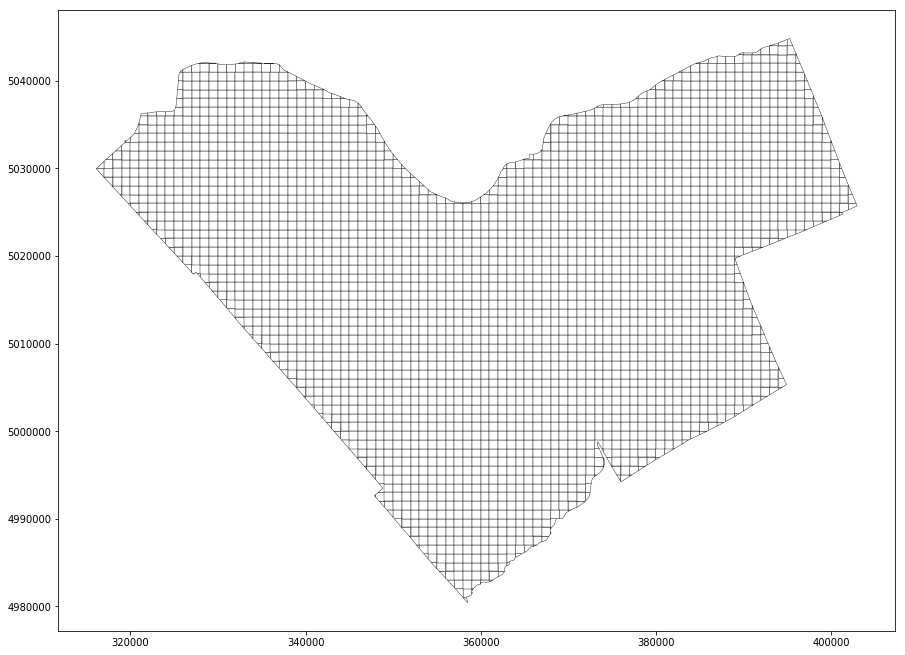

In [69]:
city_limits_tiles.plot(color='white', edgecolor='black',figsize =(15.0,15.0),linewidth=0.4)

## 8.1 Match Collisions with a Tile 

In [70]:
def assing_nearest_tile_by_whithin(items, tiles):
    
    start = datetime.datetime.now().replace(microsecond=0)
    print("Start Time:"+str(start))
    
    #spatial_index = tiles.sindex
    
    tile_id = items.columns.get_loc('TILE_ID')

    total = len(items)
    print("Number of items to Assign:" + str(total))
 
    start_iter = datetime.datetime.now().replace(microsecond=0)

    for index, row in tiles.iterrows():
 
        if (index != 0):
            print("Iteration Time:" + str(end_iter - start_iter))
            start_iter = datetime.datetime.now().replace(microsecond=0)
            
        print("Checking Items for Tile Area:" + str(row['TILE_ID']))
        items_temp = items[items['TILE_ID'] == ""]
        total_now = len(items_temp)
        
        per_no_assigned = (1 - (total - total_now) / total) * 100
        per_assigned = (100 - per_no_assigned)
        
        print("  Number of Items No Assigned (Empty TILE_ID):" + str(total_now) + " %:" + str(per_no_assigned))
        
        if row.geometry != None:
            
            mask = items_temp.within(row['geometry'])
        
            items_in = items_temp[mask]
            
            print("  Number of Items to be Assigned (Match Current Tile):"+ str(len(items_in)))
        
            for index2, row2 in items_in.iterrows():
                items.iat[index2,tile_id] = row['TILE_ID']
        
        end_iter = datetime.datetime.now().replace(microsecond=0)
    
    end = datetime.datetime.now().replace(microsecond=0)
    
    print("Total Execution Time:" + str(end - start))
            
    return(items)

## 8.2 Match Collisions (Non-Intersections) to a Tile

In [71]:
collision_data_noninter['TILE_ID'] = ""
collision_data_noninter = assing_nearest_tile_by_whithin(collision_data_noninter,city_limits_tiles)
collision_data_noninter.head()

C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Start Time:2019-02-21 20:19:28
Number of items to Assign:20245
Checking Items for Tile Area:1
  Number of Items No Assigned (Empty TILE_ID):20245 %:100.0
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2
  Number of Items No Assigned (Empty TILE_ID):20245 %:100.0
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:3
  Number of Items No Assigned (Empty TILE_ID):20245 %:100.0
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:4
  Number of Items No Assigned (Empty TILE_ID):20245 %:100.0
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:5
  Number of Items No Assigned (Empty TILE_ID):20245 %:100.0
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:6
  Number of Items No Assigned (Empty TILE_ID):20245 %:10

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:48
  Number of Items No Assigned (Empty TILE_ID):20218 %:99.86663373672512
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:49
  Number of Items No Assigned (Empty TILE_ID):20218 %:99.86663373672512
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:50
  Number of Items No Assigned (Empty TILE_ID):20218 %:99.86663373672512
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:51
  Number of Items No Assigned (Empty TILE_ID):20218 %:99.86663373672512
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:52
  Number of Items No Assigned (Empty TILE_ID):20218 %:99.86663373672512
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checki

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:93
  Number of Items No Assigned (Empty TILE_ID):20202 %:99.78760187700667
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:01
Checking Items for Tile Area:94
  Number of Items No Assigned (Empty TILE_ID):20198 %:99.76784391207705
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:95
  Number of Items No Assigned (Empty TILE_ID):20195 %:99.75302543837985
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:96
  Number of Items No Assigned (Empty TILE_ID):20195 %:99.75302543837985
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:97
  Number of Items No Assigned (Empty TILE_ID):20195 %:99.75302543837985
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checki

  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:139
  Number of Items No Assigned (Empty TILE_ID):20174 %:99.6492961224994
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:140
  Number of Items No Assigned (Empty TILE_ID):20174 %:99.6492961224994
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:141
  Number of Items No Assigned (Empty TILE_ID):20173 %:99.64435663126699
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:142
  Number of Items No Assigned (Empty TILE_ID):20173 %:99.64435663126699
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:143
  Number of Items No Assigned (Empty TILE_ID):20173 %:99.64435663126699
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Che

  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:184
  Number of Items No Assigned (Empty TILE_ID):20156 %:99.56038528031613
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:185
  Number of Items No Assigned (Empty TILE_ID):20156 %:99.56038528031613
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:186
  Number of Items No Assigned (Empty TILE_ID):20156 %:99.56038528031613
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:187
  Number of Items No Assigned (Empty TILE_ID):20156 %:99.56038528031613
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:188
  Number of Items No Assigned (Empty TILE_ID):20156 %:99.56038528031613
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:230
  Number of Items No Assigned (Empty TILE_ID):20134 %:99.45171647320325
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:231
  Number of Items No Assigned (Empty TILE_ID):20134 %:99.45171647320325
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:232
  Number of Items No Assigned (Empty TILE_ID):20132 %:99.44183749073845
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:233
  Number of Items No Assigned (Empty TILE_ID):20132 %:99.44183749073845
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:234
  Number of Items No Assigned (Empty TILE_ID):20131 %:99.43689799950604
  Number of Items to be Assigned (Match Current Tile):7
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:276
  Number of Items No Assigned (Empty TILE_ID):20084 %:99.2047419115831
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:277
  Number of Items No Assigned (Empty TILE_ID):20084 %:99.2047419115831
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:278
  Number of Items No Assigned (Empty TILE_ID):20084 %:99.2047419115831
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:279
  Number of Items No Assigned (Empty TILE_ID):20084 %:99.2047419115831
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:280
  Number of Items No Assigned (Empty TILE_ID):20084 %:99.2047419115831
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checki

  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:321
  Number of Items No Assigned (Empty TILE_ID):20066 %:99.11583106939985
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:01
Checking Items for Tile Area:322
  Number of Items No Assigned (Empty TILE_ID):20062 %:99.09607310447024
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:323
  Number of Items No Assigned (Empty TILE_ID):20060 %:99.08619412200544
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:324
  Number of Items No Assigned (Empty TILE_ID):20060 %:99.08619412200544
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:325
  Number of Items No Assigned (Empty TILE_ID):20060 %:99.08619412200544
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:366
  Number of Items No Assigned (Empty TILE_ID):20030 %:98.93800938503334
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:367
  Number of Items No Assigned (Empty TILE_ID):20030 %:98.93800938503334
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:368
  Number of Items No Assigned (Empty TILE_ID):20030 %:98.93800938503334
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:369
  Number of Items No Assigned (Empty TILE_ID):20030 %:98.93800938503334
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:370
  Number of Items No Assigned (Empty TILE_ID):20029 %:98.93306989380093
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:411
  Number of Items No Assigned (Empty TILE_ID):19989 %:98.73549024450482
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:412
  Number of Items No Assigned (Empty TILE_ID):19989 %:98.73549024450482
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:413
  Number of Items No Assigned (Empty TILE_ID):19989 %:98.73549024450482
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:414
  Number of Items No Assigned (Empty TILE_ID):19989 %:98.73549024450482
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:415
  Number of Items No Assigned (Empty TILE_ID):19986 %:98.72067177080761
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:456
  Number of Items No Assigned (Empty TILE_ID):19913 %:98.36008891084218
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:457
  Number of Items No Assigned (Empty TILE_ID):19913 %:98.36008891084218
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:458
  Number of Items No Assigned (Empty TILE_ID):19913 %:98.36008891084218
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:01
Checking Items for Tile Area:459
  Number of Items No Assigned (Empty TILE_ID):19912 %:98.35514941960977
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:460
  Number of Items No Assigned (Empty TILE_ID):19911 %:98.35020992837738
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:501
  Number of Items No Assigned (Empty TILE_ID):19872 %:98.15756977031366
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:502
  Number of Items No Assigned (Empty TILE_ID):19872 %:98.15756977031366
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:503
  Number of Items No Assigned (Empty TILE_ID):19871 %:98.15263027908125
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:504
  Number of Items No Assigned (Empty TILE_ID):19871 %:98.15263027908125
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:505
  Number of Items No Assigned (Empty TILE_ID):19871 %:98.15263027908125
  Number of Items to be Assigned (Match Current Tile):8
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):39
Iteration Time:0:00:00
Checking Items for Tile Area:546
  Number of Items No Assigned (Empty TILE_ID):19797 %:97.78710792788343
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:547
  Number of Items No Assigned (Empty TILE_ID):19795 %:97.77722894541863
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:548
  Number of Items No Assigned (Empty TILE_ID):19795 %:97.77722894541863
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:549
  Number of Items No Assigned (Empty TILE_ID):19793 %:97.76734996295382
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:550
  Number of Items No Assigned (Empty TILE_ID):19791 %:97.75747098048902
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:01


  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:591
  Number of Items No Assigned (Empty TILE_ID):19746 %:97.53519387503087
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:592
  Number of Items No Assigned (Empty TILE_ID):19746 %:97.53519387503087
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:593
  Number of Items No Assigned (Empty TILE_ID):19746 %:97.53519387503087
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:594
  Number of Items No Assigned (Empty TILE_ID):19746 %:97.53519387503087
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:595
  Number of Items No Assigned (Empty TILE_ID):19744 %:97.52531489256606
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:637
  Number of Items No Assigned (Empty TILE_ID):19695 %:97.28327982217832
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:638
  Number of Items No Assigned (Empty TILE_ID):19695 %:97.28327982217832
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:639
  Number of Items No Assigned (Empty TILE_ID):19695 %:97.28327982217832
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:640
  Number of Items No Assigned (Empty TILE_ID):19694 %:97.27834033094591
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:01
Checking Items for Tile Area:641
  Number of Items No Assigned (Empty TILE_ID):19691 %:97.2635218572487
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Ch

  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:682
  Number of Items No Assigned (Empty TILE_ID):19627 %:96.94739441837491
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:683
  Number of Items No Assigned (Empty TILE_ID):19627 %:96.94739441837491
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:684
  Number of Items No Assigned (Empty TILE_ID):19627 %:96.94739441837491
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:685
  Number of Items No Assigned (Empty TILE_ID):19627 %:96.94739441837491
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:686
  Number of Items No Assigned (Empty TILE_ID):19627 %:96.94739441837491
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items No Assigned (Empty TILE_ID):19591 %:96.7695727340084
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:727
  Number of Items No Assigned (Empty TILE_ID):19591 %:96.7695727340084
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:728
  Number of Items No Assigned (Empty TILE_ID):19591 %:96.7695727340084
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:729
  Number of Items No Assigned (Empty TILE_ID):19591 %:96.7695727340084
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:730
  Number of Items No Assigned (Empty TILE_ID):19591 %:96.7695727340084
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:731
  Number of Items No Assigned (Empty TILE_ID):19590 %:96.764633242776
  Number of Ite

  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:773
  Number of Items No Assigned (Empty TILE_ID):19515 %:96.39417140034577
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:774
  Number of Items No Assigned (Empty TILE_ID):19514 %:96.38923190911336
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:775
  Number of Items No Assigned (Empty TILE_ID):19514 %:96.38923190911336
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:776
  Number of Items No Assigned (Empty TILE_ID):19513 %:96.38429241788096
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:777
  Number of Items No Assigned (Empty TILE_ID):19510 %:96.36947394418375
  Number of Items to be Assigned (Match Current Tile):6
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:818
  Number of Items No Assigned (Empty TILE_ID):19433 %:95.98913311928871
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:819
  Number of Items No Assigned (Empty TILE_ID):19433 %:95.98913311928871
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:00
Checking Items for Tile Area:820
  Number of Items No Assigned (Empty TILE_ID):19429 %:95.9693751543591
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:01
Checking Items for Tile Area:821
  Number of Items No Assigned (Empty TILE_ID):19427 %:95.9594961718943
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:822
  Number of Items No Assigned (Empty TILE_ID):19426 %:95.9545566806619
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Chec

  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:863
  Number of Items No Assigned (Empty TILE_ID):19329 %:95.47542603111879
  Number of Items to be Assigned (Match Current Tile):5
Iteration Time:0:00:00
Checking Items for Tile Area:864
  Number of Items No Assigned (Empty TILE_ID):19324 %:95.45072857495678
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:865
  Number of Items No Assigned (Empty TILE_ID):19324 %:95.45072857495678
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:866
  Number of Items No Assigned (Empty TILE_ID):19321 %:95.43591010125957
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:01
Checking Items for Tile Area:867
  Number of Items No Assigned (Empty TILE_ID):19320 %:95.43097061002716
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
C

  Number of Items No Assigned (Empty TILE_ID):19158 %:94.63077303037787
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:908
  Number of Items No Assigned (Empty TILE_ID):19155 %:94.61595455668066
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:909
  Number of Items No Assigned (Empty TILE_ID):19155 %:94.61595455668066
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:910
  Number of Items No Assigned (Empty TILE_ID):19155 %:94.61595455668066
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:911
  Number of Items No Assigned (Empty TILE_ID):19154 %:94.61101506544826
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:912
  Number of Items No Assigned (Empty TILE_ID):19153 %:94.60607557421585
  Number

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:953
  Number of Items No Assigned (Empty TILE_ID):18988 %:93.79105952086934
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:954
  Number of Items No Assigned (Empty TILE_ID):18988 %:93.79105952086934
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:955
  Number of Items No Assigned (Empty TILE_ID):18988 %:93.79105952086934
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:956
  Number of Items No Assigned (Empty TILE_ID):18987 %:93.78612002963695
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:957
  Number of Items No Assigned (Empty TILE_ID):18987 %:93.78612002963695
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:998
  Number of Items No Assigned (Empty TILE_ID):18745 %:92.59076315139541
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:999
  Number of Items No Assigned (Empty TILE_ID):18744 %:92.585823660163
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1000
  Number of Items No Assigned (Empty TILE_ID):18744 %:92.585823660163
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1001
  Number of Items No Assigned (Empty TILE_ID):18744 %:92.585823660163
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1002
  Number of Items No Assigned (Empty TILE_ID):18744 %:92.585823660163
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checki

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1043
  Number of Items No Assigned (Empty TILE_ID):18444 %:91.10397629044209
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1044
  Number of Items No Assigned (Empty TILE_ID):18444 %:91.10397629044209
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1045
  Number of Items No Assigned (Empty TILE_ID):18443 %:91.09903679920967
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1046
  Number of Items No Assigned (Empty TILE_ID):18443 %:91.09903679920967
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1047
  Number of Items No Assigned (Empty TILE_ID):18443 %:91.09903679920967
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1089
  Number of Items No Assigned (Empty TILE_ID):18234 %:90.06668313163743
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1090
  Number of Items No Assigned (Empty TILE_ID):18234 %:90.06668313163743
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1091
  Number of Items No Assigned (Empty TILE_ID):18234 %:90.06668313163743
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1092
  Number of Items No Assigned (Empty TILE_ID):18234 %:90.06668313163743
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1093
  Number of Items No Assigned (Empty TILE_ID):18234 %:90.06668313163743
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00

  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:1134
  Number of Items No Assigned (Empty TILE_ID):18012 %:88.97011607804396
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1135
  Number of Items No Assigned (Empty TILE_ID):18012 %:88.97011607804396
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1136
  Number of Items No Assigned (Empty TILE_ID):18012 %:88.97011607804396
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1137
  Number of Items No Assigned (Empty TILE_ID):18012 %:88.97011607804396
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1138
  Number of Items No Assigned (Empty TILE_ID):18012 %:88.97011607804396
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00

  Number of Items No Assigned (Empty TILE_ID):17814 %:87.99209681402816
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1179
  Number of Items No Assigned (Empty TILE_ID):17813 %:87.98715732279575
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1180
  Number of Items No Assigned (Empty TILE_ID):17812 %:87.98221783156335
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1181
  Number of Items No Assigned (Empty TILE_ID):17812 %:87.98221783156335
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1182
  Number of Items No Assigned (Empty TILE_ID):17812 %:87.98221783156335
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1183
  Number of Items No Assigned (Empty TILE_ID):17812 %:87.98221783156335
  N

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1223
  Number of Items No Assigned (Empty TILE_ID):17682 %:87.34008397135096
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1224
  Number of Items No Assigned (Empty TILE_ID):17682 %:87.34008397135096
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1225
  Number of Items No Assigned (Empty TILE_ID):17681 %:87.33514448011854
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1226
  Number of Items No Assigned (Empty TILE_ID):17680 %:87.33020498888615
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1227
  Number of Items No Assigned (Empty TILE_ID):17680 %:87.33020498888615
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00

  Number of Items No Assigned (Empty TILE_ID):17484 %:86.36206470733514
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1268
  Number of Items No Assigned (Empty TILE_ID):17484 %:86.36206470733514
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1269
  Number of Items No Assigned (Empty TILE_ID):17484 %:86.36206470733514
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1270
  Number of Items No Assigned (Empty TILE_ID):17484 %:86.36206470733514
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1271
  Number of Items No Assigned (Empty TILE_ID):17484 %:86.36206470733514
  Number of Items to be Assigned (Match Current Tile):6
Iteration Time:0:00:00
Checking Items for Tile Area:1272
  Number of Items No Assigned (Empty TILE_ID):17478 %:86.33242775994073
  N

  Number of Items No Assigned (Empty TILE_ID):17222 %:85.06791800444554
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1313
  Number of Items No Assigned (Empty TILE_ID):17222 %:85.06791800444554
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1314
  Number of Items No Assigned (Empty TILE_ID):17222 %:85.06791800444554
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1315
  Number of Items No Assigned (Empty TILE_ID):17222 %:85.06791800444554
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1316
  Number of Items No Assigned (Empty TILE_ID):17222 %:85.06791800444554
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1317
  Number of Items No Assigned (Empty TILE_ID):17222 %:85.06791800444554
  N

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1359
  Number of Items No Assigned (Empty TILE_ID):17026 %:84.09977772289454
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1360
  Number of Items No Assigned (Empty TILE_ID):17026 %:84.09977772289454
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1361
  Number of Items No Assigned (Empty TILE_ID):17026 %:84.09977772289454
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1362
  Number of Items No Assigned (Empty TILE_ID):17026 %:84.09977772289454
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1363
  Number of Items No Assigned (Empty TILE_ID):17026 %:84.09977772289454
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00

  Number of Items No Assigned (Empty TILE_ID):16782 %:82.89454186218819
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1405
  Number of Items No Assigned (Empty TILE_ID):16782 %:82.89454186218819
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1406
  Number of Items No Assigned (Empty TILE_ID):16782 %:82.89454186218819
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1407
  Number of Items No Assigned (Empty TILE_ID):16782 %:82.89454186218819
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1408
  Number of Items No Assigned (Empty TILE_ID):16781 %:82.8896023709558
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1409
  Number of Items No Assigned (Empty TILE_ID):16781 %:82.8896023709558
  Num

  Number of Items No Assigned (Empty TILE_ID):16443 %:81.22005433440356
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1450
  Number of Items No Assigned (Empty TILE_ID):16443 %:81.22005433440356
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1451
  Number of Items No Assigned (Empty TILE_ID):16443 %:81.22005433440356
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1452
  Number of Items No Assigned (Empty TILE_ID):16443 %:81.22005433440356
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1453
  Number of Items No Assigned (Empty TILE_ID):16443 %:81.22005433440356
  Number of Items to be Assigned (Match Current Tile):5
Iteration Time:0:00:00
Checking Items for Tile Area:1454
  Number of Items No Assigned (Empty TILE_ID):16438 %:81.19535687824154
  N

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1495
  Number of Items No Assigned (Empty TILE_ID):15972 %:78.89355396394171
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1496
  Number of Items No Assigned (Empty TILE_ID):15972 %:78.89355396394171
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1497
  Number of Items No Assigned (Empty TILE_ID):15972 %:78.89355396394171
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1498
  Number of Items No Assigned (Empty TILE_ID):15971 %:78.88861447270932
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1499
  Number of Items No Assigned (Empty TILE_ID):15971 %:78.88861447270932
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00

  Number of Items No Assigned (Empty TILE_ID):15541 %:76.76463324277599
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1540
  Number of Items No Assigned (Empty TILE_ID):15541 %:76.76463324277599
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1541
  Number of Items No Assigned (Empty TILE_ID):15541 %:76.76463324277599
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1542
  Number of Items No Assigned (Empty TILE_ID):15541 %:76.76463324277599
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1543
  Number of Items No Assigned (Empty TILE_ID):15540 %:76.7596937515436
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1544
  Number of Items No Assigned (Empty TILE_ID):15540 %:76.7596937515436
  Num

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1585
  Number of Items No Assigned (Empty TILE_ID):14908 %:73.63793529266486
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1586
  Number of Items No Assigned (Empty TILE_ID):14908 %:73.63793529266486
  Number of Items to be Assigned (Match Current Tile):5
Iteration Time:0:00:00
Checking Items for Tile Area:1587
  Number of Items No Assigned (Empty TILE_ID):14903 %:73.61323783650285
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1588
  Number of Items No Assigned (Empty TILE_ID):14903 %:73.61323783650285
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1589
  Number of Items No Assigned (Empty TILE_ID):14903 %:73.61323783650285
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00

  Number of Items No Assigned (Empty TILE_ID):14036 %:69.33069893800938
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1631
  Number of Items No Assigned (Empty TILE_ID):14036 %:69.33069893800938
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1632
  Number of Items No Assigned (Empty TILE_ID):14036 %:69.33069893800938
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1633
  Number of Items No Assigned (Empty TILE_ID):14035 %:69.32575944677698
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:00
Checking Items for Tile Area:1634
  Number of Items No Assigned (Empty TILE_ID):14031 %:69.30600148184737
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1635
  Number of Items No Assigned (Empty TILE_ID):14031 %:69.30600148184737
  N

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1675
  Number of Items No Assigned (Empty TILE_ID):13002 %:64.22326500370461
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1676
  Number of Items No Assigned (Empty TILE_ID):13001 %:64.21832551247222
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1677
  Number of Items No Assigned (Empty TILE_ID):13001 %:64.21832551247222
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1678
  Number of Items No Assigned (Empty TILE_ID):13000 %:64.2133860212398
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1679
  Number of Items No Assigned (Empty TILE_ID):13000 %:64.2133860212398
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:0

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1720
  Number of Items No Assigned (Empty TILE_ID):11986 %:59.20474191158311
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1721
  Number of Items No Assigned (Empty TILE_ID):11986 %:59.20474191158311
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1722
  Number of Items No Assigned (Empty TILE_ID):11986 %:59.20474191158311
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1723
  Number of Items No Assigned (Empty TILE_ID):11985 %:59.1998024203507
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1724
  Number of Items No Assigned (Empty TILE_ID):11985 %:59.1998024203507
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:0

  Number of Items No Assigned (Empty TILE_ID):11073 %:54.69498641639912
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1766
  Number of Items No Assigned (Empty TILE_ID):11073 %:54.69498641639912
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1767
  Number of Items No Assigned (Empty TILE_ID):11072 %:54.690046925166705
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:1768
  Number of Items No Assigned (Empty TILE_ID):11070 %:54.6801679427019
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1769
  Number of Items No Assigned (Empty TILE_ID):11070 %:54.6801679427019
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1770
  Number of Items No Assigned (Empty TILE_ID):11070 %:54.6801679427019
  Num

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1811
  Number of Items No Assigned (Empty TILE_ID):9607 %:47.453692269696226
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1812
  Number of Items No Assigned (Empty TILE_ID):9607 %:47.453692269696226
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1813
  Number of Items No Assigned (Empty TILE_ID):9607 %:47.453692269696226
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1814
  Number of Items No Assigned (Empty TILE_ID):9607 %:47.453692269696226
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1815
  Number of Items No Assigned (Empty TILE_ID):9607 %:47.453692269696226
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00

  Number of Items No Assigned (Empty TILE_ID):7924 %:39.14052852556187
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1858
  Number of Items No Assigned (Empty TILE_ID):7923 %:39.13558903432946
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:1859
  Number of Items No Assigned (Empty TILE_ID):7920 %:39.12077056063226
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1860
  Number of Items No Assigned (Empty TILE_ID):7920 %:39.12077056063226
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1861
  Number of Items No Assigned (Empty TILE_ID):7919 %:39.11583106939985
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1862
  Number of Items No Assigned (Empty TILE_ID):7919 %:39.11583106939985
  Number 

  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:00
Checking Items for Tile Area:1906
  Number of Items No Assigned (Empty TILE_ID):6974 %:34.44801185477896
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1907
  Number of Items No Assigned (Empty TILE_ID):6973 %:34.443072363546555
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1908
  Number of Items No Assigned (Empty TILE_ID):6973 %:34.443072363546555
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:1909
  Number of Items No Assigned (Empty TILE_ID):6970 %:34.428253889849344
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1910
  Number of Items No Assigned (Empty TILE_ID):6969 %:34.423314398616945
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:

  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:1953
  Number of Items No Assigned (Empty TILE_ID):5966 %:29.469004692516677
  Number of Items to be Assigned (Match Current Tile):5
Iteration Time:0:00:00
Checking Items for Tile Area:1954
  Number of Items No Assigned (Empty TILE_ID):5961 %:29.44430723635466
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:00
Checking Items for Tile Area:1955
  Number of Items No Assigned (Empty TILE_ID):5957 %:29.424549271425036
  Number of Items to be Assigned (Match Current Tile):14
Iteration Time:0:00:00
Checking Items for Tile Area:1956
  Number of Items No Assigned (Empty TILE_ID):5943 %:29.355396394171397
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1957
  Number of Items No Assigned (Empty TILE_ID):5943 %:29.355396394171397
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1998
  Number of Items No Assigned (Empty TILE_ID):5246 %:25.912571005186468
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1999
  Number of Items No Assigned (Empty TILE_ID):5246 %:25.912571005186468
  Number of Items to be Assigned (Match Current Tile):18
Iteration Time:0:00:00
Checking Items for Tile Area:2000
  Number of Items No Assigned (Empty TILE_ID):5228 %:25.823660163003215
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:2001
  Number of Items No Assigned (Empty TILE_ID):5228 %:25.823660163003215
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2002
  Number of Items No Assigned (Empty TILE_ID):5228 %:25.823660163003215
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:0

  Number of Items No Assigned (Empty TILE_ID):4484 %:22.148678686095337
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2044
  Number of Items No Assigned (Empty TILE_ID):4484 %:22.148678686095337
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2045
  Number of Items No Assigned (Empty TILE_ID):4483 %:22.14373919486293
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2046
  Number of Items No Assigned (Empty TILE_ID):4483 %:22.14373919486293
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:00
Checking Items for Tile Area:2047
  Number of Items No Assigned (Empty TILE_ID):4479 %:22.12398122993332
  Number of Items to be Assigned (Match Current Tile):5
Iteration Time:0:00:00
Checking Items for Tile Area:2048
  Number of Items No Assigned (Empty TILE_ID):4474 %:22.099283773771305
  Numb

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2094
  Number of Items No Assigned (Empty TILE_ID):3867 %:19.101012595702638
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2095
  Number of Items No Assigned (Empty TILE_ID):3867 %:19.101012595702638
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:2096
  Number of Items No Assigned (Empty TILE_ID):3865 %:19.091133613237833
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2097
  Number of Items No Assigned (Empty TILE_ID):3865 %:19.091133613237833
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2098
  Number of Items No Assigned (Empty TILE_ID):3865 %:19.091133613237833
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2142
  Number of Items No Assigned (Empty TILE_ID):3286 %:16.23116818967646
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:00
Checking Items for Tile Area:2143
  Number of Items No Assigned (Empty TILE_ID):3282 %:16.211410224746846
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2144
  Number of Items No Assigned (Empty TILE_ID):3281 %:16.206470733514443
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:00
Checking Items for Tile Area:2145
  Number of Items No Assigned (Empty TILE_ID):3277 %:16.186712768584833
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2146
  Number of Items No Assigned (Empty TILE_ID):3277 %:16.186712768584833
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:

  Number of Items No Assigned (Empty TILE_ID):2766 %:13.662632748826875
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2190
  Number of Items No Assigned (Empty TILE_ID):2765 %:13.657693257594472
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2191
  Number of Items No Assigned (Empty TILE_ID):2765 %:13.657693257594472
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:00
Checking Items for Tile Area:2192
  Number of Items No Assigned (Empty TILE_ID):2761 %:13.63793529266486
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:2193
  Number of Items No Assigned (Empty TILE_ID):2758 %:13.62311681896765
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2194
  Number of Items No Assigned (Empty TILE_ID):2757 %:13.618177327735248
  Num

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2235
  Number of Items No Assigned (Empty TILE_ID):2428 %:11.993084712274637
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2236
  Number of Items No Assigned (Empty TILE_ID):2428 %:11.993084712274637
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2237
  Number of Items No Assigned (Empty TILE_ID):2427 %:11.988145221042235
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:2238
  Number of Items No Assigned (Empty TILE_ID):2424 %:11.973326747345025
  Number of Items to be Assigned (Match Current Tile):7
Iteration Time:0:00:00
Checking Items for Tile Area:2239
  Number of Items No Assigned (Empty TILE_ID):2417 %:11.938750308718205
  Number of Items to be Assigned (Match Current Tile):17
Iteration Time:0:0

  Number of Items No Assigned (Empty TILE_ID):2220 %:10.965670535934802
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2283
  Number of Items No Assigned (Empty TILE_ID):2219 %:10.9607310447024
  Number of Items to be Assigned (Match Current Tile):9
Iteration Time:0:00:00
Checking Items for Tile Area:2284
  Number of Items No Assigned (Empty TILE_ID):2210 %:10.916275623610773
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2285
  Number of Items No Assigned (Empty TILE_ID):2210 %:10.916275623610773
  Number of Items to be Assigned (Match Current Tile):8
Iteration Time:0:00:00
Checking Items for Tile Area:2286
  Number of Items No Assigned (Empty TILE_ID):2202 %:10.876759693751548
  Number of Items to be Assigned (Match Current Tile):6
Iteration Time:0:00:00
Checking Items for Tile Area:2287
  Number of Items No Assigned (Empty TILE_ID):2196 %:10.84712274635713
  Numb

  Number of Items No Assigned (Empty TILE_ID):2095 %:10.348234131884414
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:2333
  Number of Items No Assigned (Empty TILE_ID):2093 %:10.338355149419609
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2334
  Number of Items No Assigned (Empty TILE_ID):2093 %:10.338355149419609
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2335
  Number of Items No Assigned (Empty TILE_ID):2092 %:10.333415658187207
  Number of Items to be Assigned (Match Current Tile):8
Iteration Time:0:00:00
Checking Items for Tile Area:2336
  Number of Items No Assigned (Empty TILE_ID):2084 %:10.293899728327983
  Number of Items to be Assigned (Match Current Tile):12
Iteration Time:0:00:00
Checking Items for Tile Area:2337
  Number of Items No Assigned (Empty TILE_ID):2072 %:10.234625833539146
  

  Number of Items to be Assigned (Match Current Tile):15
Iteration Time:0:00:00
Checking Items for Tile Area:2381
  Number of Items No Assigned (Empty TILE_ID):1811 %:8.94541862188195
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2382
  Number of Items No Assigned (Empty TILE_ID):1811 %:8.94541862188195
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2383
  Number of Items No Assigned (Empty TILE_ID):1811 %:8.94541862188195
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2384
  Number of Items No Assigned (Empty TILE_ID):1811 %:8.94541862188195
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2385
  Number of Items No Assigned (Empty TILE_ID):1811 %:8.94541862188195
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Check

  Number of Items to be Assigned (Match Current Tile):6
Iteration Time:0:00:00
Checking Items for Tile Area:2433
  Number of Items No Assigned (Empty TILE_ID):1518 %:7.498147690787849
  Number of Items to be Assigned (Match Current Tile):20
Iteration Time:0:00:00
Checking Items for Tile Area:2434
  Number of Items No Assigned (Empty TILE_ID):1498 %:7.3993578661397885
  Number of Items to be Assigned (Match Current Tile):18
Iteration Time:0:00:00
Checking Items for Tile Area:2435
  Number of Items No Assigned (Empty TILE_ID):1480 %:7.3104470239565345
  Number of Items to be Assigned (Match Current Tile):49
Iteration Time:0:00:00
Checking Items for Tile Area:2436
  Number of Items No Assigned (Empty TILE_ID):1431 %:7.068411953568788
  Number of Items to be Assigned (Match Current Tile):46
Iteration Time:0:00:00
Checking Items for Tile Area:2437
  Number of Items No Assigned (Empty TILE_ID):1385 %:6.841195356878238
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:0

  Number of Items No Assigned (Empty TILE_ID):1196 %:5.907631513954059
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2487
  Number of Items No Assigned (Empty TILE_ID):1196 %:5.907631513954059
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2488
  Number of Items No Assigned (Empty TILE_ID):1196 %:5.907631513954059
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:2489
  Number of Items No Assigned (Empty TILE_ID):1194 %:5.897752531489253
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2490
  Number of Items No Assigned (Empty TILE_ID):1194 %:5.897752531489253
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2491
  Number of Items No Assigned (Empty TILE_ID):1194 %:5.897752531489253
  Number 

  Number of Items No Assigned (Empty TILE_ID):977 %:4.82588293405779
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:2532
  Number of Items No Assigned (Empty TILE_ID):977 %:4.82588293405779
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:2533
  Number of Items No Assigned (Empty TILE_ID):975 %:4.816003951592984
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2534
  Number of Items No Assigned (Empty TILE_ID):975 %:4.816003951592984
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2535
  Number of Items No Assigned (Empty TILE_ID):975 %:4.816003951592984
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2536
  Number of Items No Assigned (Empty TILE_ID):975 %:4.816003951592984
  Number of Items

  Number of Items No Assigned (Empty TILE_ID):733 %:3.620647073351446
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2591
  Number of Items No Assigned (Empty TILE_ID):733 %:3.620647073351446
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2592
  Number of Items No Assigned (Empty TILE_ID):733 %:3.620647073351446
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2593
  Number of Items No Assigned (Empty TILE_ID):733 %:3.620647073351446
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:2594
  Number of Items No Assigned (Empty TILE_ID):730 %:3.605828599654237
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2595
  Number of Items No Assigned (Empty TILE_ID):730 %:3.605828599654237
  Number of Ite

  Number of Items No Assigned (Empty TILE_ID):562 %:2.7759940726105214
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:2648
  Number of Items No Assigned (Empty TILE_ID):560 %:2.7661150901457154
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2649
  Number of Items No Assigned (Empty TILE_ID):560 %:2.7661150901457154
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2650
  Number of Items No Assigned (Empty TILE_ID):560 %:2.7661150901457154
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:2651
  Number of Items No Assigned (Empty TILE_ID):557 %:2.7512966164485064
  Number of Items to be Assigned (Match Current Tile):7
Iteration Time:0:00:00
Checking Items for Tile Area:2652
  Number of Items No Assigned (Empty TILE_ID):550 %:2.7167201778216854
  Number 

Iteration Time:0:00:00
Checking Items for Tile Area:2712
  Number of Items No Assigned (Empty TILE_ID):404 %:1.9955544578908357
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2713
  Number of Items No Assigned (Empty TILE_ID):404 %:1.9955544578908357
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2714
  Number of Items No Assigned (Empty TILE_ID):403 %:1.9906149666584327
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:2715
  Number of Items No Assigned (Empty TILE_ID):401 %:1.9807359841936267
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2716
  Number of Items No Assigned (Empty TILE_ID):401 %:1.9807359841936267
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2717
  Number of Items No As

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2759
  Number of Items No Assigned (Empty TILE_ID):347 %:1.7140034576438645
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2760
  Number of Items No Assigned (Empty TILE_ID):347 %:1.7140034576438645
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2761
  Number of Items No Assigned (Empty TILE_ID):346 %:1.7090639664114615
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2762
  Number of Items No Assigned (Empty TILE_ID):345 %:1.7041244751790585
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2763
  Number of Items No Assigned (Empty TILE_ID):345 %:1.7041244751790585
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):5
Iteration Time:0:00:00
Checking Items for Tile Area:2809
  Number of Items No Assigned (Empty TILE_ID):286 %:1.4126944924672813
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2810
  Number of Items No Assigned (Empty TILE_ID):286 %:1.4126944924672813
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2811
  Number of Items No Assigned (Empty TILE_ID):286 %:1.4126944924672813
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2812
  Number of Items No Assigned (Empty TILE_ID):286 %:1.4126944924672813
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2813
  Number of Items No Assigned (Empty TILE_ID):286 %:1.4126944924672813
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2858
  Number of Items No Assigned (Empty TILE_ID):254 %:1.254630773030374
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:2859
  Number of Items No Assigned (Empty TILE_ID):251 %:1.239812299333165
  Number of Items to be Assigned (Match Current Tile):9
Iteration Time:0:00:00
Checking Items for Tile Area:2860
  Number of Items No Assigned (Empty TILE_ID):242 %:1.195356878241538
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:00
Checking Items for Tile Area:2861
  Number of Items No Assigned (Empty TILE_ID):238 %:1.175598913311926
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2862
  Number of Items No Assigned (Empty TILE_ID):238 %:1.175598913311926
  Number of Items to be Assigned (Match Current Tile):5
Iteration Time:0:00:00
Checki

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2920
  Number of Items No Assigned (Empty TILE_ID):150 %:0.7409236848604617
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2921
  Number of Items No Assigned (Empty TILE_ID):150 %:0.7409236848604617
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2922
  Number of Items No Assigned (Empty TILE_ID):150 %:0.7409236848604617
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2923
  Number of Items No Assigned (Empty TILE_ID):149 %:0.7359841936280587
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2924
  Number of Items No Assigned (Empty TILE_ID):148 %:0.7310447023956557
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
C

  Number of Items No Assigned (Empty TILE_ID):63 %:0.31118794764138924
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2983
  Number of Items No Assigned (Empty TILE_ID):63 %:0.31118794764138924
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:2984
  Number of Items No Assigned (Empty TILE_ID):61 %:0.30130896517658323
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:2985
  Number of Items No Assigned (Empty TILE_ID):58 %:0.2864904914793742
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2986
  Number of Items No Assigned (Empty TILE_ID):57 %:0.2815510002469712
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2987
  Number of Items No Assigned (Empty TILE_ID):57 %:0.2815510002469712
  Number of 

Record                                           Location  \
0       2    EVEREST PRIV btwn RUSSELL RD & ST. LAURENT BLVD   
1       3            DAVID DR btwn HOWDEN AVE & SULLIVAN AVE   
2       4  JEANNE D'ARC BLVD btwn HARLEQUIN CRES & HARLEQ...   
3       5              HUNT CLUB RD btwn MALAK ST & ESSON ST   
4       6       IRIS ST btwn TO BE DETERMINED & SOUTHWOOD DR   

           LocationA                             LocationB            X  \
0       EVEREST PRIV    btwn RUSSELL RD & ST. LAURENT BLVD  372924.6597   
1           DAVID DR        btwn HOWDEN AVE & SULLIVAN AVE  363134.9056   
2  JEANNE D'ARC BLVD  btwn HARLEQUIN CRES & HARLEQUIN CRES  382379.4913   
3       HUNT CLUB RD              btwn MALAK ST & ESSON ST  374210.1205   
4            IRIS ST  btwn TO BE DETERMINED & SOUTHWOOD DR  360768.6171   

             Y      Date        Time  Environmen Road_Surfa   ...    \
0  5029755.729  1/1/2015  2:55:00 AM  01 - Clear   01 - Dry   ...     
1  5022989.571  1/1/2015  3:11:00 AM  01 - Clear   06 - Ice   ...     
2  5039190.164  1/1/2015  4:00:00 AM  01 - Clear   01 - Dry   ...     
3  5025666.529  1/1/2015  4:51:00 AM  01 - Clear   01 - Dry   ...     
4  5023405.220  1/1/2015  8:44:00 AM  01 - Clear   01 - Dry   ...     

                             ONS_NAME ROAD_SUBTYPE ROAD_SUBCLASS ROAD_SEGMENT  \
0                     East Industrial            5         LOCAL     e___1GYG   
1  Cityview - Crestview - Meadowlands            5         LOCAL     __3Z0GDI   
2                  Chatelaine Village            3  MAJCOLLECTOR     __3Z0A7R   
3                      Hunt Club Park            2      ARTERIAL     __3Z08D1   
4                                Iris            3  MAJCOLLECTOR     __3ZAH82   

           ROAD_NAME  ROAD_ROW_NUMBER  ROAD_SINUOSITY ROAD_LEN ROAD_DIRECTION  \
0       EVEREST PRIV            24310         1.11641   272.16             EW   
1           DAVID DR             3247               1  275.857             EW   
2  JEANNE D'ARC BLVD            13078         1.00084  105.468             EW   
3       HUNT CLUB RD             8647               1  513.258             EW   
4            IRIS ST            10014         1.00253  137.343             EW   

  TILE_ID  
0    2034  
1    1611  
2    2481  
3    2116  
4    1473  

[5 rows x 30 columns]

In [72]:
def assign_nearest_tile_by_mindistance(points, tiles):
    
    start = datetime.datetime.now().replace(microsecond=0)
    print("Start Time:"+str(start))
        
    spatial_index = tiles.sindex
    
    item_tile_id = points.columns.get_loc('TILE_ID')

        
    total_point = len(points)
    one_per_point = int(round(total_point / 100))
    #print(" One per cent is "+ str(one_per_point))
    print("Total number of Points to Handle:" + str(total_point))
    j = 0
    
    start_per = datetime.datetime.now().replace(microsecond=0)
    
    points_temp = points[points['TILE_ID'] == ""]
    
    for index_point, row_point in points_temp.iterrows():
        
        if (j == one_per_point): 
            end_per = datetime.datetime.now().replace(microsecond=0)
            per_done_point = round((1 - (total_point - index_point)/total_point)*100)
            print(" Percentage done: " + str(per_done_point) + str("% in ") + str(end_per - start_per))
            j = 0
            start_per = datetime.datetime.now().replace(microsecond=0)
        
        
        if row_point.geometry != None:
        
            buffer_point = row_point['geometry'].buffer(100.0)
            
            buffer_point_bounds = buffer_point.bounds
             
            mask_tiles_around= list(spatial_index.intersection(buffer_point_bounds)) 
            
            tiles_around = roads.iloc[mask_tiles_around]
                
        
            if (len(tiles_around) > 0):
                d = tiles_around.distance(row_point.geometry)
                d_min = d.min()
            
                tile_id = d[d==d_min].index[0]
        
                closest_tile = tiles.iloc[tile_id]
        
                points.iat[index_point,item_tile_id] = closest_tile['TILE_ID']
            
                
        j= j+1

    print("  Percentage done: 100%")
    end = datetime.datetime.now().replace(microsecond=0)    
    print("Total Execution Time:" + str(end - start))
    
    return(points)

In [73]:
collision_data_noninter = assign_nearest_tile_by_mindistance(collision_data_noninter,city_limits_tiles)
collision_data_noninter.head()

Start Time:2019-02-21 20:23:32
Total number of Points to Handle:20245
  Percentage done: 100%
Total Execution Time:0:00:00


Record                                           Location  \
0       2    EVEREST PRIV btwn RUSSELL RD & ST. LAURENT BLVD   
1       3            DAVID DR btwn HOWDEN AVE & SULLIVAN AVE   
2       4  JEANNE D'ARC BLVD btwn HARLEQUIN CRES & HARLEQ...   
3       5              HUNT CLUB RD btwn MALAK ST & ESSON ST   
4       6       IRIS ST btwn TO BE DETERMINED & SOUTHWOOD DR   

           LocationA                             LocationB            X  \
0       EVEREST PRIV    btwn RUSSELL RD & ST. LAURENT BLVD  372924.6597   
1           DAVID DR        btwn HOWDEN AVE & SULLIVAN AVE  363134.9056   
2  JEANNE D'ARC BLVD  btwn HARLEQUIN CRES & HARLEQUIN CRES  382379.4913   
3       HUNT CLUB RD              btwn MALAK ST & ESSON ST  374210.1205   
4            IRIS ST  btwn TO BE DETERMINED & SOUTHWOOD DR  360768.6171   

             Y      Date        Time  Environmen Road_Surfa   ...    \
0  5029755.729  1/1/2015  2:55:00 AM  01 - Clear   01 - Dry   ...     
1  5022989.571  1/1/2015  3:11:00 AM  01 - Clear   06 - Ice   ...     
2  5039190.164  1/1/2015  4:00:00 AM  01 - Clear   01 - Dry   ...     
3  5025666.529  1/1/2015  4:51:00 AM  01 - Clear   01 - Dry   ...     
4  5023405.220  1/1/2015  8:44:00 AM  01 - Clear   01 - Dry   ...     

                             ONS_NAME ROAD_SUBTYPE ROAD_SUBCLASS ROAD_SEGMENT  \
0                     East Industrial            5         LOCAL     e___1GYG   
1  Cityview - Crestview - Meadowlands            5         LOCAL     __3Z0GDI   
2                  Chatelaine Village            3  MAJCOLLECTOR     __3Z0A7R   
3                      Hunt Club Park            2      ARTERIAL     __3Z08D1   
4                                Iris            3  MAJCOLLECTOR     __3ZAH82   

           ROAD_NAME  ROAD_ROW_NUMBER  ROAD_SINUOSITY ROAD_LEN ROAD_DIRECTION  \
0       EVEREST PRIV            24310         1.11641   272.16             EW   
1           DAVID DR             3247               1  275.857             EW   
2  JEANNE D'ARC BLVD            13078         1.00084  105.468             EW   
3       HUNT CLUB RD             8647               1  513.258             EW   
4            IRIS ST            10014         1.00253  137.343             EW   

  TILE_ID  
0    2034  
1    1611  
2    2481  
3    2116  
4    1473  

[5 rows x 30 columns]

In [74]:
collision_data_noninter[collision_data_noninter['TILE_ID'] == ""].head()

Empty GeoDataFrame
Columns: [Record, Location, LocationA, LocationB, X, Y, Date, Time, Environmen, Road_Surfa, Traffic_Co, Collision_, Light, Collisio_1, Impact_typ, Longitude, Latitude, Date_Time, geometry, ONS_ID, ONS_NAME, ROAD_SUBTYPE, ROAD_SUBCLASS, ROAD_SEGMENT, ROAD_NAME, ROAD_ROW_NUMBER, ROAD_SINUOSITY, ROAD_LEN, ROAD_DIRECTION, TILE_ID]
Index: []

[0 rows x 30 columns]

In [75]:
collision_data_noninter.to_file('10 - Ottawa Tabular Collision Data Nonintersections with Neighborhoods - Road Segments and Tiles Opendata.shp', driver='ESRI Shapefile')

## 8.3 Match Collisions (Intersections) to a Tile 

In [76]:
collision_data_inter['TILE_ID'] = ""
collision_data_inter = assing_nearest_tile_by_whithin(collision_data_inter,city_limits_tiles)
collision_data_inter.head()

C:\Users\Enrique\Anaconda3\envs\Test2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Start Time:2019-02-21 20:23:47
Number of items to Assign:23249
Checking Items for Tile Area:1
  Number of Items No Assigned (Empty TILE_ID):23249 %:100.0
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2
  Number of Items No Assigned (Empty TILE_ID):23249 %:100.0
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:3
  Number of Items No Assigned (Empty TILE_ID):23249 %:100.0
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:4
  Number of Items No Assigned (Empty TILE_ID):23249 %:100.0
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:5
  Number of Items No Assigned (Empty TILE_ID):23249 %:100.0
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:6
  Number of Items No Assigned (Empty TILE_ID):23249 %:10

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:47
  Number of Items No Assigned (Empty TILE_ID):23242 %:99.96989117811519
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:48
  Number of Items No Assigned (Empty TILE_ID):23242 %:99.96989117811519
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:49
  Number of Items No Assigned (Empty TILE_ID):23242 %:99.96989117811519
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:50
  Number of Items No Assigned (Empty TILE_ID):23242 %:99.96989117811519
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:51
  Number of Items No Assigned (Empty TILE_ID):23242 %:99.96989117811519
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checki

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:93
  Number of Items No Assigned (Empty TILE_ID):23242 %:99.96989117811519
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:94
  Number of Items No Assigned (Empty TILE_ID):23242 %:99.96989117811519
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:95
  Number of Items No Assigned (Empty TILE_ID):23242 %:99.96989117811519
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:96
  Number of Items No Assigned (Empty TILE_ID):23242 %:99.96989117811519
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:97
  Number of Items No Assigned (Empty TILE_ID):23242 %:99.96989117811519
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checki

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:138
  Number of Items No Assigned (Empty TILE_ID):23240 %:99.96128865757667
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:139
  Number of Items No Assigned (Empty TILE_ID):23240 %:99.96128865757667
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:140
  Number of Items No Assigned (Empty TILE_ID):23240 %:99.96128865757667
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:141
  Number of Items No Assigned (Empty TILE_ID):23239 %:99.9569873973074
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:142
  Number of Items No Assigned (Empty TILE_ID):23239 %:99.9569873973074
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Che

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:184
  Number of Items No Assigned (Empty TILE_ID):23237 %:99.9483848767689
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:185
  Number of Items No Assigned (Empty TILE_ID):23237 %:99.9483848767689
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:186
  Number of Items No Assigned (Empty TILE_ID):23237 %:99.9483848767689
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:187
  Number of Items No Assigned (Empty TILE_ID):23237 %:99.9483848767689
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:188
  Number of Items No Assigned (Empty TILE_ID):23237 %:99.9483848767689
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checki

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:230
  Number of Items No Assigned (Empty TILE_ID):23229 %:99.91397479461483
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:231
  Number of Items No Assigned (Empty TILE_ID):23229 %:99.91397479461483
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:232
  Number of Items No Assigned (Empty TILE_ID):23229 %:99.91397479461483
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:233
  Number of Items No Assigned (Empty TILE_ID):23229 %:99.91397479461483
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:234
  Number of Items No Assigned (Empty TILE_ID):23229 %:99.91397479461483
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:276
  Number of Items No Assigned (Empty TILE_ID):23226 %:99.90107101380704
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:277
  Number of Items No Assigned (Empty TILE_ID):23226 %:99.90107101380704
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:278
  Number of Items No Assigned (Empty TILE_ID):23226 %:99.90107101380704
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:279
  Number of Items No Assigned (Empty TILE_ID):23226 %:99.90107101380704
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:280
  Number of Items No Assigned (Empty TILE_ID):23226 %:99.90107101380704
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:322
  Number of Items No Assigned (Empty TILE_ID):23224 %:99.89246849326852
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:323
  Number of Items No Assigned (Empty TILE_ID):23224 %:99.89246849326852
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:324
  Number of Items No Assigned (Empty TILE_ID):23224 %:99.89246849326852
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:325
  Number of Items No Assigned (Empty TILE_ID):23224 %:99.89246849326852
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:326
  Number of Items No Assigned (Empty TILE_ID):23224 %:99.89246849326852
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:368
  Number of Items No Assigned (Empty TILE_ID):23212 %:99.84085337003742
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:369
  Number of Items No Assigned (Empty TILE_ID):23212 %:99.84085337003742
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:370
  Number of Items No Assigned (Empty TILE_ID):23212 %:99.84085337003742
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:371
  Number of Items No Assigned (Empty TILE_ID):23212 %:99.84085337003742
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:372
  Number of Items No Assigned (Empty TILE_ID):23212 %:99.84085337003742
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:414
  Number of Items No Assigned (Empty TILE_ID):23206 %:99.81504580842187
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:415
  Number of Items No Assigned (Empty TILE_ID):23206 %:99.81504580842187
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:416
  Number of Items No Assigned (Empty TILE_ID):23206 %:99.81504580842187
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:417
  Number of Items No Assigned (Empty TILE_ID):23206 %:99.81504580842187
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:418
  Number of Items No Assigned (Empty TILE_ID):23206 %:99.81504580842187
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:460
  Number of Items No Assigned (Empty TILE_ID):23194 %:99.76343068519076
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:461
  Number of Items No Assigned (Empty TILE_ID):23194 %:99.76343068519076
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:462
  Number of Items No Assigned (Empty TILE_ID):23194 %:99.76343068519076
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:463
  Number of Items No Assigned (Empty TILE_ID):23194 %:99.76343068519076
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:464
  Number of Items No Assigned (Empty TILE_ID):23194 %:99.76343068519076
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:506
  Number of Items No Assigned (Empty TILE_ID):23188 %:99.7376231235752
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:507
  Number of Items No Assigned (Empty TILE_ID):23188 %:99.7376231235752
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:508
  Number of Items No Assigned (Empty TILE_ID):23188 %:99.7376231235752
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:509
  Number of Items No Assigned (Empty TILE_ID):23188 %:99.7376231235752
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:00
Checking Items for Tile Area:510
  Number of Items No Assigned (Empty TILE_ID):23184 %:99.72041808249817
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Check

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:552
  Number of Items No Assigned (Empty TILE_ID):23173 %:99.67310421953633
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:553
  Number of Items No Assigned (Empty TILE_ID):23173 %:99.67310421953633
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:554
  Number of Items No Assigned (Empty TILE_ID):23173 %:99.67310421953633
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:555
  Number of Items No Assigned (Empty TILE_ID):23173 %:99.67310421953633
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:556
  Number of Items No Assigned (Empty TILE_ID):23173 %:99.67310421953633
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:598
  Number of Items No Assigned (Empty TILE_ID):23167 %:99.64729665792078
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:599
  Number of Items No Assigned (Empty TILE_ID):23166 %:99.64299539765152
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:600
  Number of Items No Assigned (Empty TILE_ID):23166 %:99.64299539765152
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:601
  Number of Items No Assigned (Empty TILE_ID):23166 %:99.64299539765152
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:602
  Number of Items No Assigned (Empty TILE_ID):23166 %:99.64299539765152
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:01
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:644
  Number of Items No Assigned (Empty TILE_ID):23148 %:99.56557271280485
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:645
  Number of Items No Assigned (Empty TILE_ID):23148 %:99.56557271280485
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:646
  Number of Items No Assigned (Empty TILE_ID):23148 %:99.56557271280485
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:647
  Number of Items No Assigned (Empty TILE_ID):23148 %:99.56557271280485
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:648
  Number of Items No Assigned (Empty TILE_ID):23148 %:99.56557271280485
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:690
  Number of Items No Assigned (Empty TILE_ID):23121 %:99.44943868553486
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:691
  Number of Items No Assigned (Empty TILE_ID):23121 %:99.44943868553486
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:692
  Number of Items No Assigned (Empty TILE_ID):23121 %:99.44943868553486
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:693
  Number of Items No Assigned (Empty TILE_ID):23121 %:99.44943868553486
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:694
  Number of Items No Assigned (Empty TILE_ID):23121 %:99.44943868553486
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items No Assigned (Empty TILE_ID):23106 %:99.38491978149597
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:736
  Number of Items No Assigned (Empty TILE_ID):23106 %:99.38491978149597
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:737
  Number of Items No Assigned (Empty TILE_ID):23106 %:99.38491978149597
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:738
  Number of Items No Assigned (Empty TILE_ID):23106 %:99.38491978149597
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:739
  Number of Items No Assigned (Empty TILE_ID):23106 %:99.38491978149597
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:740
  Number of Items No Assigned (Empty TILE_ID):23106 %:99.38491978149597
  Number

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:781
  Number of Items No Assigned (Empty TILE_ID):23093 %:99.3290033979956
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:782
  Number of Items No Assigned (Empty TILE_ID):23093 %:99.3290033979956
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:783
  Number of Items No Assigned (Empty TILE_ID):23092 %:99.32470213772635
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:784
  Number of Items No Assigned (Empty TILE_ID):23092 %:99.32470213772635
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:785
  Number of Items No Assigned (Empty TILE_ID):23092 %:99.32470213772635
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Che

  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:00
Checking Items for Tile Area:826
  Number of Items No Assigned (Empty TILE_ID):23068 %:99.22147189126414
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:827
  Number of Items No Assigned (Empty TILE_ID):23068 %:99.22147189126414
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:828
  Number of Items No Assigned (Empty TILE_ID):23068 %:99.22147189126414
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:829
  Number of Items No Assigned (Empty TILE_ID):23068 %:99.22147189126414
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:830
  Number of Items No Assigned (Empty TILE_ID):23068 %:99.22147189126414
  Number of Items to be Assigned (Match Current Tile):7
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:872
  Number of Items No Assigned (Empty TILE_ID):23047 %:99.1311454256097
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:873
  Number of Items No Assigned (Empty TILE_ID):23047 %:99.1311454256097
  Number of Items to be Assigned (Match Current Tile):30
Iteration Time:0:00:00
Checking Items for Tile Area:874
  Number of Items No Assigned (Empty TILE_ID):23017 %:99.00210761753193
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:875
  Number of Items No Assigned (Empty TILE_ID):23015 %:98.99350509699342
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:876
  Number of Items No Assigned (Empty TILE_ID):23015 %:98.99350509699342
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Ch

  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:918
  Number of Items No Assigned (Empty TILE_ID):22988 %:98.87737106972342
  Number of Items to be Assigned (Match Current Tile):55
Iteration Time:0:00:01
Checking Items for Tile Area:919
  Number of Items No Assigned (Empty TILE_ID):22933 %:98.6408017549142
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:920
  Number of Items No Assigned (Empty TILE_ID):22933 %:98.6408017549142
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:921
  Number of Items No Assigned (Empty TILE_ID):22933 %:98.6408017549142
  Number of Items to be Assigned (Match Current Tile):7
Iteration Time:0:00:00
Checking Items for Tile Area:922
  Number of Items No Assigned (Empty TILE_ID):22926 %:98.61069293302937
  Number of Items to be Assigned (Match Current Tile):7
Iteration Time:0:00:00
Che

  Number of Items to be Assigned (Match Current Tile):62
Iteration Time:0:00:00
Checking Items for Tile Area:964
  Number of Items No Assigned (Empty TILE_ID):22795 %:98.04722783775647
  Number of Items to be Assigned (Match Current Tile):7
Iteration Time:0:00:00
Checking Items for Tile Area:965
  Number of Items No Assigned (Empty TILE_ID):22788 %:98.01711901587164
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:966
  Number of Items No Assigned (Empty TILE_ID):22785 %:98.00421523506387
  Number of Items to be Assigned (Match Current Tile):32
Iteration Time:0:00:00
Checking Items for Tile Area:967
  Number of Items No Assigned (Empty TILE_ID):22753 %:97.8665749064476
  Number of Items to be Assigned (Match Current Tile):11
Iteration Time:0:00:00
Checking Items for Tile Area:968
  Number of Items No Assigned (Empty TILE_ID):22742 %:97.81926104348574
  Number of Items to be Assigned (Match Current Tile):30
Iteration Time:0:00:0

  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:1010
  Number of Items No Assigned (Empty TILE_ID):22564 %:97.05363671555766
  Number of Items to be Assigned (Match Current Tile):14
Iteration Time:0:00:00
Checking Items for Tile Area:1011
  Number of Items No Assigned (Empty TILE_ID):22550 %:96.99341907178804
  Number of Items to be Assigned (Match Current Tile):46
Iteration Time:0:00:00
Checking Items for Tile Area:1012
  Number of Items No Assigned (Empty TILE_ID):22504 %:96.79556109940212
  Number of Items to be Assigned (Match Current Tile):5
Iteration Time:0:00:00
Checking Items for Tile Area:1013
  Number of Items No Assigned (Empty TILE_ID):22499 %:96.77405479805583
  Number of Items to be Assigned (Match Current Tile):52
Iteration Time:0:00:01
Checking Items for Tile Area:1014
  Number of Items No Assigned (Empty TILE_ID):22447 %:96.55038926405437
  Number of Items to be Assigned (Match Current Tile):82
Iteration Time:

  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1056
  Number of Items No Assigned (Empty TILE_ID):22248 %:95.69443847047184
  Number of Items to be Assigned (Match Current Tile):8
Iteration Time:0:00:00
Checking Items for Tile Area:1057
  Number of Items No Assigned (Empty TILE_ID):22240 %:95.66002838831777
  Number of Items to be Assigned (Match Current Tile):93
Iteration Time:0:00:01
Checking Items for Tile Area:1058
  Number of Items No Assigned (Empty TILE_ID):22147 %:95.2600111832767
  Number of Items to be Assigned (Match Current Tile):97
Iteration Time:0:00:00
Checking Items for Tile Area:1059
  Number of Items No Assigned (Empty TILE_ID):22050 %:94.84278893715859
  Number of Items to be Assigned (Match Current Tile):66
Iteration Time:0:00:00
Checking Items for Tile Area:1060
  Number of Items No Assigned (Empty TILE_ID):21984 %:94.5589057593875
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:0

  Number of Items to be Assigned (Match Current Tile):31
Iteration Time:0:00:00
Checking Items for Tile Area:1102
  Number of Items No Assigned (Empty TILE_ID):21884 %:94.12877973246161
  Number of Items to be Assigned (Match Current Tile):140
Iteration Time:0:00:01
Checking Items for Tile Area:1103
  Number of Items No Assigned (Empty TILE_ID):21744 %:93.52660329476537
  Number of Items to be Assigned (Match Current Tile):17
Iteration Time:0:00:00
Checking Items for Tile Area:1104
  Number of Items No Assigned (Empty TILE_ID):21727 %:93.45348187018796
  Number of Items to be Assigned (Match Current Tile):14
Iteration Time:0:00:00
Checking Items for Tile Area:1105
  Number of Items No Assigned (Empty TILE_ID):21713 %:93.39326422641834
  Number of Items to be Assigned (Match Current Tile):109
Iteration Time:0:00:00
Checking Items for Tile Area:1106
  Number of Items No Assigned (Empty TILE_ID):21604 %:92.92442685706912
  Number of Items to be Assigned (Match Current Tile):21
Iteration T

  Number of Items to be Assigned (Match Current Tile):6
Iteration Time:0:00:00
Checking Items for Tile Area:1148
  Number of Items No Assigned (Empty TILE_ID):21500 %:92.4770957890662
  Number of Items to be Assigned (Match Current Tile):104
Iteration Time:0:00:00
Checking Items for Tile Area:1149
  Number of Items No Assigned (Empty TILE_ID):21396 %:92.02976472106327
  Number of Items to be Assigned (Match Current Tile):24
Iteration Time:0:00:00
Checking Items for Tile Area:1150
  Number of Items No Assigned (Empty TILE_ID):21372 %:91.92653447460106
  Number of Items to be Assigned (Match Current Tile):18
Iteration Time:0:00:01
Checking Items for Tile Area:1151
  Number of Items No Assigned (Empty TILE_ID):21354 %:91.8491117897544
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1152
  Number of Items No Assigned (Empty TILE_ID):21354 %:91.8491117897544
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:0

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1194
  Number of Items No Assigned (Empty TILE_ID):21201 %:91.19101896855778
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:1195
  Number of Items No Assigned (Empty TILE_ID):21198 %:91.17811518775001
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1196
  Number of Items No Assigned (Empty TILE_ID):21198 %:91.17811518775001
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1197
  Number of Items No Assigned (Empty TILE_ID):21198 %:91.17811518775001
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1198
  Number of Items No Assigned (Empty TILE_ID):21198 %:91.17811518775001
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1240
  Number of Items No Assigned (Empty TILE_ID):21112 %:90.80820680459375
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1241
  Number of Items No Assigned (Empty TILE_ID):21112 %:90.80820680459375
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1242
  Number of Items No Assigned (Empty TILE_ID):21112 %:90.80820680459375
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1243
  Number of Items No Assigned (Empty TILE_ID):21112 %:90.80820680459375
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1244
  Number of Items No Assigned (Empty TILE_ID):21111 %:90.8039055443245
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:

  Number of Items to be Assigned (Match Current Tile):5
Iteration Time:0:00:00
Checking Items for Tile Area:1286
  Number of Items No Assigned (Empty TILE_ID):21025 %:90.43399716116822
  Number of Items to be Assigned (Match Current Tile):23
Iteration Time:0:00:00
Checking Items for Tile Area:1287
  Number of Items No Assigned (Empty TILE_ID):21002 %:90.33506817497526
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:01
Checking Items for Tile Area:1288
  Number of Items No Assigned (Empty TILE_ID):20999 %:90.32216439416749
  Number of Items to be Assigned (Match Current Tile):19
Iteration Time:0:00:00
Checking Items for Tile Area:1289
  Number of Items No Assigned (Empty TILE_ID):20980 %:90.24044044905158
  Number of Items to be Assigned (Match Current Tile):18
Iteration Time:0:00:00
Checking Items for Tile Area:1290
  Number of Items No Assigned (Empty TILE_ID):20962 %:90.16301776420491
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0

  Number of Items to be Assigned (Match Current Tile):34
Iteration Time:0:00:00
Checking Items for Tile Area:1332
  Number of Items No Assigned (Empty TILE_ID):20847 %:89.66837283324014
  Number of Items to be Assigned (Match Current Tile):62
Iteration Time:0:00:00
Checking Items for Tile Area:1333
  Number of Items No Assigned (Empty TILE_ID):20785 %:89.40169469654609
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1334
  Number of Items No Assigned (Empty TILE_ID):20785 %:89.40169469654609
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1335
  Number of Items No Assigned (Empty TILE_ID):20785 %:89.40169469654609
  Number of Items to be Assigned (Match Current Tile):5
Iteration Time:0:00:00
Checking Items for Tile Area:1336
  Number of Items No Assigned (Empty TILE_ID):20780 %:89.3801883951998
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:0

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1378
  Number of Items No Assigned (Empty TILE_ID):20767 %:89.32427201169942
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1379
  Number of Items No Assigned (Empty TILE_ID):20767 %:89.32427201169942
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1380
  Number of Items No Assigned (Empty TILE_ID):20766 %:89.31997075143016
  Number of Items to be Assigned (Match Current Tile):77
Iteration Time:0:00:00
Checking Items for Tile Area:1381
  Number of Items No Assigned (Empty TILE_ID):20689 %:88.98877371069723
  Number of Items to be Assigned (Match Current Tile):32
Iteration Time:0:00:00
Checking Items for Tile Area:1382
  Number of Items No Assigned (Empty TILE_ID):20657 %:88.85113338208095
  Number of Items to be Assigned (Match Current Tile):20
Iteration Time:0

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1424
  Number of Items No Assigned (Empty TILE_ID):20597 %:88.59305776592542
  Number of Items to be Assigned (Match Current Tile):81
Iteration Time:0:00:00
Checking Items for Tile Area:1425
  Number of Items No Assigned (Empty TILE_ID):20516 %:88.24465568411544
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:1426
  Number of Items No Assigned (Empty TILE_ID):20513 %:88.23175190330767
  Number of Items to be Assigned (Match Current Tile):17
Iteration Time:0:00:00
Checking Items for Tile Area:1427
  Number of Items No Assigned (Empty TILE_ID):20496 %:88.15863047873027
  Number of Items to be Assigned (Match Current Tile):43
Iteration Time:0:00:00
Checking Items for Tile Area:1428
  Number of Items No Assigned (Empty TILE_ID):20453 %:87.97367628715213
  Number of Items to be Assigned (Match Current Tile):95
Iteration Time:

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1469
  Number of Items No Assigned (Empty TILE_ID):20249 %:87.09621919222332
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1470
  Number of Items No Assigned (Empty TILE_ID):20249 %:87.09621919222332
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:1471
  Number of Items No Assigned (Empty TILE_ID):20248 %:87.09191793195407
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:1472
  Number of Items No Assigned (Empty TILE_ID):20245 %:87.07901415114628
  Number of Items to be Assigned (Match Current Tile):135
Iteration Time:0:00:01
Checking Items for Tile Area:1473
  Number of Items No Assigned (Empty TILE_ID):20110 %:86.49834401479633
  Number of Items to be Assigned (Match Current Tile):119
Iteration Time:

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1514
  Number of Items No Assigned (Empty TILE_ID):19636 %:84.45954664716761
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1515
  Number of Items No Assigned (Empty TILE_ID):19636 %:84.45954664716761
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1516
  Number of Items No Assigned (Empty TILE_ID):19636 %:84.45954664716761
  Number of Items to be Assigned (Match Current Tile):95
Iteration Time:0:00:00
Checking Items for Tile Area:1517
  Number of Items No Assigned (Empty TILE_ID):19541 %:84.05092692158802
  Number of Items to be Assigned (Match Current Tile):68
Iteration Time:0:00:00
Checking Items for Tile Area:1518
  Number of Items No Assigned (Empty TILE_ID):19473 %:83.75844122327842
  Number of Items to be Assigned (Match Current Tile):13
Iteration Time:0

Iteration Time:0:00:01
Checking Items for Tile Area:1558
  Number of Items No Assigned (Empty TILE_ID):19176 %:82.48096692330853
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:1559
  Number of Items No Assigned (Empty TILE_ID):19174 %:82.47236440277001
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1560
  Number of Items No Assigned (Empty TILE_ID):19174 %:82.47236440277001
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1561
  Number of Items No Assigned (Empty TILE_ID):19174 %:82.47236440277001
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1562
  Number of Items No Assigned (Empty TILE_ID):19174 %:82.47236440277001
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1563
  Number of Items 

Iteration Time:0:00:00
Checking Items for Tile Area:1604
  Number of Items No Assigned (Empty TILE_ID):18487 %:79.51739859778914
  Number of Items to be Assigned (Match Current Tile):45
Iteration Time:0:00:00
Checking Items for Tile Area:1605
  Number of Items No Assigned (Empty TILE_ID):18442 %:79.3238418856725
  Number of Items to be Assigned (Match Current Tile):114
Iteration Time:0:00:00
Checking Items for Tile Area:1606
  Number of Items No Assigned (Empty TILE_ID):18328 %:78.83349821497698
  Number of Items to be Assigned (Match Current Tile):3
Iteration Time:0:00:00
Checking Items for Tile Area:1607
  Number of Items No Assigned (Empty TILE_ID):18325 %:78.82059443416921
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1608
  Number of Items No Assigned (Empty TILE_ID):18325 %:78.82059443416921
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1609
  Number of Item

  Number of Items to be Assigned (Match Current Tile):106
Iteration Time:0:00:00
Checking Items for Tile Area:1650
  Number of Items No Assigned (Empty TILE_ID):17339 %:74.57955180867995
  Number of Items to be Assigned (Match Current Tile):73
Iteration Time:0:00:00
Checking Items for Tile Area:1651
  Number of Items No Assigned (Empty TILE_ID):17266 %:74.26555980902405
  Number of Items to be Assigned (Match Current Tile):16
Iteration Time:0:00:00
Checking Items for Tile Area:1652
  Number of Items No Assigned (Empty TILE_ID):17250 %:74.1967396447159
  Number of Items to be Assigned (Match Current Tile):28
Iteration Time:0:00:00
Checking Items for Tile Area:1653
  Number of Items No Assigned (Empty TILE_ID):17222 %:74.07630435717665
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1654
  Number of Items No Assigned (Empty TILE_ID):17222 %:74.07630435717665
  Number of Items to be Assigned (Match Current Tile):22
Iteration Time

  Number of Items No Assigned (Empty TILE_ID):16180 %:69.59439115660888
  Number of Items to be Assigned (Match Current Tile):10
Iteration Time:0:00:00
Checking Items for Tile Area:1696
  Number of Items No Assigned (Empty TILE_ID):16170 %:69.5513785539163
  Number of Items to be Assigned (Match Current Tile):44
Iteration Time:0:00:00
Checking Items for Tile Area:1697
  Number of Items No Assigned (Empty TILE_ID):16126 %:69.3621231020689
  Number of Items to be Assigned (Match Current Tile):40
Iteration Time:0:00:01
Checking Items for Tile Area:1698
  Number of Items No Assigned (Empty TILE_ID):16086 %:69.19007269129855
  Number of Items to be Assigned (Match Current Tile):119
Iteration Time:0:00:00
Checking Items for Tile Area:1699
  Number of Items No Assigned (Empty TILE_ID):15967 %:68.67822271925674
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1700
  Number of Items No Assigned (Empty TILE_ID):15967 %:68.67822271925674


  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1741
  Number of Items No Assigned (Empty TILE_ID):14877 %:63.98984902576454
  Number of Items to be Assigned (Match Current Tile):25
Iteration Time:0:00:00
Checking Items for Tile Area:1742
  Number of Items No Assigned (Empty TILE_ID):14852 %:63.88231751903308
  Number of Items to be Assigned (Match Current Tile):98
Iteration Time:0:00:00
Checking Items for Tile Area:1743
  Number of Items No Assigned (Empty TILE_ID):14754 %:63.46079401264571
  Number of Items to be Assigned (Match Current Tile):9
Iteration Time:0:00:00
Checking Items for Tile Area:1744
  Number of Items No Assigned (Empty TILE_ID):14745 %:63.42208267022238
  Number of Items to be Assigned (Match Current Tile):4
Iteration Time:0:00:00
Checking Items for Tile Area:1745
  Number of Items No Assigned (Empty TILE_ID):14741 %:63.40487762914534
  Number of Items to be Assigned (Match Current Tile):40
Iteration Time:0

  Number of Items to be Assigned (Match Current Tile):101
Iteration Time:0:00:00
Checking Items for Tile Area:1788
  Number of Items No Assigned (Empty TILE_ID):13573 %:58.381005634650954
  Number of Items to be Assigned (Match Current Tile):17
Iteration Time:0:00:00
Checking Items for Tile Area:1789
  Number of Items No Assigned (Empty TILE_ID):13556 %:58.30788421007356
  Number of Items to be Assigned (Match Current Tile):13
Iteration Time:0:00:00
Checking Items for Tile Area:1790
  Number of Items No Assigned (Empty TILE_ID):13543 %:58.25196782657318
  Number of Items to be Assigned (Match Current Tile):24
Iteration Time:0:00:00
Checking Items for Tile Area:1791
  Number of Items No Assigned (Empty TILE_ID):13519 %:58.14873758011097
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:1792
  Number of Items No Assigned (Empty TILE_ID):13517 %:58.14013505957245
  Number of Items to be Assigned (Match Current Tile):21
Iteration Ti

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1833
  Number of Items No Assigned (Empty TILE_ID):11508 %:49.49890317863134
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:1834
  Number of Items No Assigned (Empty TILE_ID):11506 %:49.49030065809282
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1835
  Number of Items No Assigned (Empty TILE_ID):11506 %:49.49030065809282
  Number of Items to be Assigned (Match Current Tile):7
Iteration Time:0:00:01
Checking Items for Tile Area:1836
  Number of Items No Assigned (Empty TILE_ID):11499 %:49.46019183620801
  Number of Items to be Assigned (Match Current Tile):29
Iteration Time:0:00:00
Checking Items for Tile Area:1837
  Number of Items No Assigned (Empty TILE_ID):11470 %:49.3354552883995
  Number of Items to be Assigned (Match Current Tile):8
Iteration Time:0:00

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1881
  Number of Items No Assigned (Empty TILE_ID):9094 %:39.11566088864037
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1882
  Number of Items No Assigned (Empty TILE_ID):9094 %:39.11566088864037
  Number of Items to be Assigned (Match Current Tile):5
Iteration Time:0:00:00
Checking Items for Tile Area:1883
  Number of Items No Assigned (Empty TILE_ID):9089 %:39.09415458729407
  Number of Items to be Assigned (Match Current Tile):7
Iteration Time:0:00:00
Checking Items for Tile Area:1884
  Number of Items No Assigned (Empty TILE_ID):9082 %:39.06404576540926
  Number of Items to be Assigned (Match Current Tile):16
Iteration Time:0:00:00
Checking Items for Tile Area:1885
  Number of Items No Assigned (Empty TILE_ID):9066 %:38.995225601101126
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1928
  Number of Items No Assigned (Empty TILE_ID):8062 %:34.676760290765195
  Number of Items to be Assigned (Match Current Tile):6
Iteration Time:0:00:00
Checking Items for Tile Area:1929
  Number of Items No Assigned (Empty TILE_ID):8056 %:34.650952729149644
  Number of Items to be Assigned (Match Current Tile):20
Iteration Time:0:00:00
Checking Items for Tile Area:1930
  Number of Items No Assigned (Empty TILE_ID):8036 %:34.56492752376447
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1931
  Number of Items No Assigned (Empty TILE_ID):8036 %:34.56492752376447
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:1932
  Number of Items No Assigned (Empty TILE_ID):8036 %:34.56492752376447
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:0

  Number of Items No Assigned (Empty TILE_ID):6659 %:28.642092132994968
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1976
  Number of Items No Assigned (Empty TILE_ID):6659 %:28.642092132994968
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1977
  Number of Items No Assigned (Empty TILE_ID):6659 %:28.642092132994968
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1978
  Number of Items No Assigned (Empty TILE_ID):6659 %:28.642092132994968
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:1979
  Number of Items No Assigned (Empty TILE_ID):6659 %:28.642092132994968
  Number of Items to be Assigned (Match Current Tile):13
Iteration Time:0:00:00
Checking Items for Tile Area:1980
  Number of Items No Assigned (Empty TILE_ID):6646 %:28.5861757494946
  Nu

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2021
  Number of Items No Assigned (Empty TILE_ID):5786 %:24.887091917931958
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2022
  Number of Items No Assigned (Empty TILE_ID):5786 %:24.887091917931958
  Number of Items to be Assigned (Match Current Tile):13
Iteration Time:0:00:00
Checking Items for Tile Area:2023
  Number of Items No Assigned (Empty TILE_ID):5773 %:24.831175534431594
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2024
  Number of Items No Assigned (Empty TILE_ID):5773 %:24.831175534431594
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2025
  Number of Items No Assigned (Empty TILE_ID):5773 %:24.831175534431594
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:0

  Number of Items No Assigned (Empty TILE_ID):4747 %:20.418082498171962
  Number of Items to be Assigned (Match Current Tile):16
Iteration Time:0:00:01
Checking Items for Tile Area:2071
  Number of Items No Assigned (Empty TILE_ID):4731 %:20.349262333863827
  Number of Items to be Assigned (Match Current Tile):41
Iteration Time:0:00:00
Checking Items for Tile Area:2072
  Number of Items No Assigned (Empty TILE_ID):4690 %:20.172910662824208
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2073
  Number of Items No Assigned (Empty TILE_ID):4689 %:20.16860940255495
  Number of Items to be Assigned (Match Current Tile):88
Iteration Time:0:00:00
Checking Items for Tile Area:2074
  Number of Items No Assigned (Empty TILE_ID):4601 %:19.790098498860164
  Number of Items to be Assigned (Match Current Tile):35
Iteration Time:0:00:00
Checking Items for Tile Area:2075
  Number of Items No Assigned (Empty TILE_ID):4566 %:19.63955438943611
 

  Number of Items No Assigned (Empty TILE_ID):3778 %:16.250161297260103
  Number of Items to be Assigned (Match Current Tile):13
Iteration Time:0:00:00
Checking Items for Tile Area:2121
  Number of Items No Assigned (Empty TILE_ID):3765 %:16.194244913759736
  Number of Items to be Assigned (Match Current Tile):92
Iteration Time:0:00:00
Checking Items for Tile Area:2122
  Number of Items No Assigned (Empty TILE_ID):3673 %:15.798528968987913
  Number of Items to be Assigned (Match Current Tile):33
Iteration Time:0:00:00
Checking Items for Tile Area:2123
  Number of Items No Assigned (Empty TILE_ID):3640 %:15.656587380102371
  Number of Items to be Assigned (Match Current Tile):118
Iteration Time:0:00:00
Checking Items for Tile Area:2124
  Number of Items No Assigned (Empty TILE_ID):3522 %:15.149038668329817
  Number of Items to be Assigned (Match Current Tile):135
Iteration Time:0:00:00
Checking Items for Tile Area:2125
  Number of Items No Assigned (Empty TILE_ID):3387 %:14.568368531979

  Number of Items to be Assigned (Match Current Tile):6
Iteration Time:0:00:00
Checking Items for Tile Area:2171
  Number of Items No Assigned (Empty TILE_ID):2657 %:11.428448535420877
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:01
Checking Items for Tile Area:2172
  Number of Items No Assigned (Empty TILE_ID):2656 %:11.424147275151618
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2173
  Number of Items No Assigned (Empty TILE_ID):2656 %:11.424147275151618
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2174
  Number of Items No Assigned (Empty TILE_ID):2656 %:11.424147275151618
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2175
  Number of Items No Assigned (Empty TILE_ID):2656 %:11.424147275151618
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00

  Number of Items No Assigned (Empty TILE_ID):2433 %:10.464966235106887
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2216
  Number of Items No Assigned (Empty TILE_ID):2433 %:10.464966235106887
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:2217
  Number of Items No Assigned (Empty TILE_ID):2433 %:10.464966235106887
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2218
  Number of Items No Assigned (Empty TILE_ID):2433 %:10.464966235106887
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2219
  Number of Items No Assigned (Empty TILE_ID):2433 %:10.464966235106887
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2220
  Number of Items No Assigned (Empty TILE_ID):2433 %:10.464966235106887
  N

  Number of Items No Assigned (Empty TILE_ID):2296 %:9.875693578218414
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2264
  Number of Items No Assigned (Empty TILE_ID):2296 %:9.875693578218414
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2265
  Number of Items No Assigned (Empty TILE_ID):2296 %:9.875693578218414
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:01
Checking Items for Tile Area:2266
  Number of Items No Assigned (Empty TILE_ID):2296 %:9.875693578218414
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2267
  Number of Items No Assigned (Empty TILE_ID):2296 %:9.875693578218414
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2268
  Number of Items No Assigned (Empty TILE_ID):2296 %:9.875693578218414
  Number 

  Number of Items No Assigned (Empty TILE_ID):2244 %:9.652028044216953
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2311
  Number of Items No Assigned (Empty TILE_ID):2244 %:9.652028044216953
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2312
  Number of Items No Assigned (Empty TILE_ID):2244 %:9.652028044216953
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2313
  Number of Items No Assigned (Empty TILE_ID):2244 %:9.652028044216953
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2314
  Number of Items No Assigned (Empty TILE_ID):2244 %:9.652028044216953
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2315
  Number of Items No Assigned (Empty TILE_ID):2244 %:9.652028044216953
  Number 

  Number of Items No Assigned (Empty TILE_ID):1876 %:8.06916426512968
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2362
  Number of Items No Assigned (Empty TILE_ID):1876 %:8.06916426512968
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2363
  Number of Items No Assigned (Empty TILE_ID):1876 %:8.06916426512968
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2364
  Number of Items No Assigned (Empty TILE_ID):1876 %:8.06916426512968
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2365
  Number of Items No Assigned (Empty TILE_ID):1876 %:8.06916426512968
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2366
  Number of Items No Assigned (Empty TILE_ID):1876 %:8.06916426512968
  Number of Ite

  Number of Items No Assigned (Empty TILE_ID):1566 %:6.735773581659421
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2419
  Number of Items No Assigned (Empty TILE_ID):1566 %:6.735773581659421
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2420
  Number of Items No Assigned (Empty TILE_ID):1566 %:6.735773581659421
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2421
  Number of Items No Assigned (Empty TILE_ID):1565 %:6.731472321390164
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2422
  Number of Items No Assigned (Empty TILE_ID):1565 %:6.731472321390164
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2423
  Number of Items No Assigned (Empty TILE_ID):1565 %:6.731472321390164
  Number 

  Number of Items No Assigned (Empty TILE_ID):1349 %:5.802400103230243
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2468
  Number of Items No Assigned (Empty TILE_ID):1349 %:5.802400103230243
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2469
  Number of Items No Assigned (Empty TILE_ID):1348 %:5.798098842960986
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2470
  Number of Items No Assigned (Empty TILE_ID):1348 %:5.798098842960986
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2471
  Number of Items No Assigned (Empty TILE_ID):1348 %:5.798098842960986
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2472
  Number of Items No Assigned (Empty TILE_ID):1348 %:5.798098842960986
  Number 

  Number of Items to be Assigned (Match Current Tile):107
Iteration Time:0:00:00
Checking Items for Tile Area:2524
  Number of Items No Assigned (Empty TILE_ID):745 %:3.2044389005978724
  Number of Items to be Assigned (Match Current Tile):36
Iteration Time:0:00:00
Checking Items for Tile Area:2525
  Number of Items No Assigned (Empty TILE_ID):709 %:3.0495935309045596
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:2526
  Number of Items No Assigned (Empty TILE_ID):707 %:3.0409910103660343
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2527
  Number of Items No Assigned (Empty TILE_ID):707 %:3.0409910103660343
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2528
  Number of Items No Assigned (Empty TILE_ID):707 %:3.0409910103660343
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:0

  Number of Items No Assigned (Empty TILE_ID):367 %:1.5785625188180163
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2581
  Number of Items No Assigned (Empty TILE_ID):367 %:1.5785625188180163
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2582
  Number of Items No Assigned (Empty TILE_ID):367 %:1.5785625188180163
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2583
  Number of Items No Assigned (Empty TILE_ID):367 %:1.5785625188180163
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checking Items for Tile Area:2584
  Number of Items No Assigned (Empty TILE_ID):365 %:1.569959998279491
  Number of Items to be Assigned (Match Current Tile):5
Iteration Time:0:00:01
Checking Items for Tile Area:2585
  Number of Items No Assigned (Empty TILE_ID):360 %:1.5484536969332052
  Number o

  Number of Items No Assigned (Empty TILE_ID):279 %:1.200051615123232
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2626
  Number of Items No Assigned (Empty TILE_ID):279 %:1.200051615123232
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2627
  Number of Items No Assigned (Empty TILE_ID):279 %:1.200051615123232
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2628
  Number of Items No Assigned (Empty TILE_ID):279 %:1.200051615123232
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2629
  Number of Items No Assigned (Empty TILE_ID):279 %:1.200051615123232
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2630
  Number of Items No Assigned (Empty TILE_ID):279 %:1.200051615123232
  Number of Ite

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2675
  Number of Items No Assigned (Empty TILE_ID):220 %:0.9462772592369606
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2676
  Number of Items No Assigned (Empty TILE_ID):220 %:0.9462772592369606
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2677
  Number of Items No Assigned (Empty TILE_ID):220 %:0.9462772592369606
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2678
  Number of Items No Assigned (Empty TILE_ID):220 %:0.9462772592369606
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2679
  Number of Items No Assigned (Empty TILE_ID):220 %:0.9462772592369606
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2728
  Number of Items No Assigned (Empty TILE_ID):155 %:0.666695341735124
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2729
  Number of Items No Assigned (Empty TILE_ID):155 %:0.666695341735124
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2730
  Number of Items No Assigned (Empty TILE_ID):155 %:0.666695341735124
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2731
  Number of Items No Assigned (Empty TILE_ID):155 %:0.666695341735124
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2732
  Number of Items No Assigned (Empty TILE_ID):155 %:0.666695341735124
  Number of Items to be Assigned (Match Current Tile):2
Iteration Time:0:00:00
Checki

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2790
  Number of Items No Assigned (Empty TILE_ID):115 %:0.4946449309647716
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2791
  Number of Items No Assigned (Empty TILE_ID):115 %:0.4946449309647716
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2792
  Number of Items No Assigned (Empty TILE_ID):115 %:0.4946449309647716
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2793
  Number of Items No Assigned (Empty TILE_ID):115 %:0.4946449309647716
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2794
  Number of Items No Assigned (Empty TILE_ID):115 %:0.4946449309647716
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
C

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2862
  Number of Items No Assigned (Empty TILE_ID):86 %:0.36990838315626995
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:2863
  Number of Items No Assigned (Empty TILE_ID):85 %:0.3656071228870017
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2864
  Number of Items No Assigned (Empty TILE_ID):85 %:0.3656071228870017
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2865
  Number of Items No Assigned (Empty TILE_ID):85 %:0.3656071228870017
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2866
  Number of Items No Assigned (Empty TILE_ID):85 %:0.3656071228870017
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Check

  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2939
  Number of Items No Assigned (Empty TILE_ID):46 %:0.1978579723859064
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2940
  Number of Items No Assigned (Empty TILE_ID):46 %:0.1978579723859064
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2941
  Number of Items No Assigned (Empty TILE_ID):46 %:0.1978579723859064
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2942
  Number of Items No Assigned (Empty TILE_ID):46 %:0.1978579723859064
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2943
  Number of Items No Assigned (Empty TILE_ID):46 %:0.1978579723859064
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checki

  Number of Items No Assigned (Empty TILE_ID):22 %:0.09462772592369051
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2986
  Number of Items No Assigned (Empty TILE_ID):22 %:0.09462772592369051
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2987
  Number of Items No Assigned (Empty TILE_ID):22 %:0.09462772592369051
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2988
  Number of Items No Assigned (Empty TILE_ID):22 %:0.09462772592369051
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2989
  Number of Items No Assigned (Empty TILE_ID):22 %:0.09462772592369051
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:2990
  Number of Items No Assigned (Empty TILE_ID):22 %:0.09462772592369051
  Number 

  Number of Items No Assigned (Empty TILE_ID):8 %:0.03441008215406827
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:3058
  Number of Items No Assigned (Empty TILE_ID):8 %:0.03441008215406827
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:3059
  Number of Items No Assigned (Empty TILE_ID):8 %:0.03441008215406827
  Number of Items to be Assigned (Match Current Tile):1
Iteration Time:0:00:00
Checking Items for Tile Area:3060
  Number of Items No Assigned (Empty TILE_ID):7 %:0.03010882188481112
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:3061
  Number of Items No Assigned (Empty TILE_ID):7 %:0.03010882188481112
  Number of Items to be Assigned (Match Current Tile):0
Iteration Time:0:00:00
Checking Items for Tile Area:3062
  Number of Items No Assigned (Empty TILE_ID):7 %:0.03010882188481112
  Number of Ite

Record                                   Location             LocationA  \
0       1                  LAURIER AVE @ O'CONNOR ST           LAURIER AVE   
1       8                KING EDWARD AVE @ RIDEAU ST       KING EDWARD AVE   
2       9                BEATRICE DR @ STRANDHERD DR           BEATRICE DR   
3      11  QUEEN ELIZABETH DRWY @ QUEEN ELIZABETH PL  QUEEN ELIZABETH DRWY   
4      15          OLD TENTH LINE RD @ TENTH LINE RD     OLD TENTH LINE RD   

              LocationB            X            Y      Date         Time  \
0         @ O'CONNOR ST  367635.7368  5031359.059  1/1/2015  12:30:00 AM   
1           @ RIDEAU ST  368511.7072  5032414.670  1/1/2015   1:15:00 PM   
2       @ STRANDHERD DR  365527.3770  5015322.928  1/1/2015   1:54:00 PM   
3  @ QUEEN ELIZABETH PL  368583.7409  5028844.026  1/1/2015   3:15:00 PM   
4       @ TENTH LINE RD  383042.9790  5038359.461  1/1/2015   5:30:00 PM   

   Environmen       Road_Surfa   ...    \
0  01 - Clear         01 - Dry   ...     
1   03 - Snow  03 - Loose snow   ...     
2  01 - Clear         01 - Dry   ...     
3  01 - Clear         01 - Dry   ...     
4   03 - Snow         02 - Wet   ...     

                                      ONS_NAME ROAD_SUBTYPE   ROAD_SUBCLASS  \
0                                   Centretown            2  INTER-ARTERIAL   
1                                    Lowertown            2  INTER-ARTERIAL   
2  Stonebridge - Halfmoon Bay - Heart's Desire            2  INTER-ARTERIAL   
3                            Glebe - Dows Lake            8     INTER-LOCAL   
4                           Queenswood Heights            2  INTER-ARTERIAL   

                                ROAD_SEGMENT  \
0                        __3Z09QI @ __3Z09QQ   
1                        __3Z09HJ @ __3Z09HI   
2                        __3ZAJDR @ __4FP8LZ   
3  __3Z08JE @ __3Z089I @ __3Z05SW @ __3Z0EVZ   
4                        __3Z06BL @ __3Z060T   

                                           ROAD_NAME  ROAD_ROW_NUMBER  \
0                        O'CONNOR ST @ LAURIER AVE W             5539   
1                        KING EDWARD AVE @ RIDEAU ST            13320   
2                        STRANDHERD DR @ BEATRICE DR             6838   
3  QUEEN ELIZABETH DRWY @ BANK ST @ COLONEL BY DR...              685   
4                  OLD TENTH LINE RD @ TENTH LINE RD             5852   

   ROAD_SINUOSITY ROAD_LEN ROAD_DIRECTION TILE_ID  
0             1.0      1.0             NA    1804  
1             1.0      1.0             NA    1853  
2             1.0      1.0             NA    1696  
3             1.0      1.0             NA    1849  
4             1.0      1.0             NA    2524  

[5 rows x 30 columns]

In [77]:
collision_data_inter = assign_nearest_tile_by_mindistance(collision_data_inter,city_limits_tiles)
collision_data_inter.head()

Start Time:2019-02-21 20:28:05
Total number of Points to Handle:23249
  Percentage done: 100%
Total Execution Time:0:00:00


Record                                   Location             LocationA  \
0       1                  LAURIER AVE @ O'CONNOR ST           LAURIER AVE   
1       8                KING EDWARD AVE @ RIDEAU ST       KING EDWARD AVE   
2       9                BEATRICE DR @ STRANDHERD DR           BEATRICE DR   
3      11  QUEEN ELIZABETH DRWY @ QUEEN ELIZABETH PL  QUEEN ELIZABETH DRWY   
4      15          OLD TENTH LINE RD @ TENTH LINE RD     OLD TENTH LINE RD   

              LocationB            X            Y      Date         Time  \
0         @ O'CONNOR ST  367635.7368  5031359.059  1/1/2015  12:30:00 AM   
1           @ RIDEAU ST  368511.7072  5032414.670  1/1/2015   1:15:00 PM   
2       @ STRANDHERD DR  365527.3770  5015322.928  1/1/2015   1:54:00 PM   
3  @ QUEEN ELIZABETH PL  368583.7409  5028844.026  1/1/2015   3:15:00 PM   
4       @ TENTH LINE RD  383042.9790  5038359.461  1/1/2015   5:30:00 PM   

   Environmen       Road_Surfa   ...    \
0  01 - Clear         01 - Dry   ...     
1   03 - Snow  03 - Loose snow   ...     
2  01 - Clear         01 - Dry   ...     
3  01 - Clear         01 - Dry   ...     
4   03 - Snow         02 - Wet   ...     

                                      ONS_NAME ROAD_SUBTYPE   ROAD_SUBCLASS  \
0                                   Centretown            2  INTER-ARTERIAL   
1                                    Lowertown            2  INTER-ARTERIAL   
2  Stonebridge - Halfmoon Bay - Heart's Desire            2  INTER-ARTERIAL   
3                            Glebe - Dows Lake            8     INTER-LOCAL   
4                           Queenswood Heights            2  INTER-ARTERIAL   

                                ROAD_SEGMENT  \
0                        __3Z09QI @ __3Z09QQ   
1                        __3Z09HJ @ __3Z09HI   
2                        __3ZAJDR @ __4FP8LZ   
3  __3Z08JE @ __3Z089I @ __3Z05SW @ __3Z0EVZ   
4                        __3Z06BL @ __3Z060T   

                                           ROAD_NAME  ROAD_ROW_NUMBER  \
0                        O'CONNOR ST @ LAURIER AVE W             5539   
1                        KING EDWARD AVE @ RIDEAU ST            13320   
2                        STRANDHERD DR @ BEATRICE DR             6838   
3  QUEEN ELIZABETH DRWY @ BANK ST @ COLONEL BY DR...              685   
4                  OLD TENTH LINE RD @ TENTH LINE RD             5852   

   ROAD_SINUOSITY ROAD_LEN ROAD_DIRECTION TILE_ID  
0             1.0      1.0             NA    1804  
1             1.0      1.0             NA    1853  
2             1.0      1.0             NA    1696  
3             1.0      1.0             NA    1849  
4             1.0      1.0             NA    2524  

[5 rows x 30 columns]

In [78]:
collision_data_inter[collision_data_inter['TILE_ID'] == ""].head()

Empty GeoDataFrame
Columns: [Record, Location, LocationA, LocationB, X, Y, Date, Time, Environmen, Road_Surfa, Traffic_Co, Collision_, Light, Collisio_1, Impact_typ, Longitude, Latitude, Date_Time, geometry, ONS_ID, ONS_NAME, ROAD_SUBTYPE, ROAD_SUBCLASS, ROAD_SEGMENT, ROAD_NAME, ROAD_ROW_NUMBER, ROAD_SINUOSITY, ROAD_LEN, ROAD_DIRECTION, TILE_ID]
Index: []

[0 rows x 30 columns]

In [79]:
collision_data_inter.to_file('11 - Ottawa Tabular Collision Data Intersections with Neighborhoods - Intersections Segments and Tiles Opendata.shp', driver='ESRI Shapefile')

# 8.4 Save Collision GeoDataFrame (Intersection and Non-intersections) to cvs

In [110]:
df1 = pd.DataFrame(collision_data_inter.drop('geometry', axis=1), copy=True)
df2 = pd.DataFrame(collision_data_noninter.drop('geometry', axis=1), copy=True)

df = df1.append(df2)


df.rename(inplace=True, 
          columns={"Record": "ROW_ID", 
                   "Location": "LOCATION",
                   "LocationA": "LOCATION_A",
                   "LocationB": "LOCATION_B",
                   "X": "XCOORD",
                   "Y": "YCOORD",
                   "Date": "ACCIDENT_DATE",
                   "Time": "ACCIDENT_TIME",
                   "Environmen": "ENVIRONMENT_CONDITION",
                   "Road_Surfa": "ROAD_SURFACE_CONDITION",
                   "Traffic_Co": "TRAFFIC_CONTROL",
                   "Collision_" : "ACCIDENT_LOCATION",
                   "Light" : "LIGHT",
                   "Collisio_1": "CLASSIFICATION_OF_ACCIDENT",
                   "Impact_typ" : "IMPACT_TYPE",
                   "Longitude" : "LONGITUDE",
                   "Latitude" : "LATITUDE",
                   "Date_Time": "ACCIDENT_DATE_TIME"
            })
df.info()
df.to_csv("Ottawa Tabular Collision Data 2015-2017 - ALL FEATURES.csv", index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43494 entries, 0 to 20244
Data columns (total 29 columns):
ROW_ID                        43494 non-null int64
LOCATION                      43494 non-null object
LOCATION_A                    43485 non-null object
LOCATION_B                    43485 non-null object
XCOORD                        43494 non-null float64
YCOORD                        43494 non-null float64
ACCIDENT_DATE                 43494 non-null object
ACCIDENT_TIME                 43494 non-null object
ENVIRONMENT_CONDITION         43493 non-null object
ROAD_SURFACE_CONDITION        43494 non-null object
TRAFFIC_CONTROL               43472 non-null object
ACCIDENT_LOCATION             43488 non-null object
LIGHT                         43492 non-null object
CLASSIFICATION_OF_ACCIDENT    43494 non-null object
IMPACT_TYPE                   43494 non-null object
LONGITUDE                     43494 non-null float64
LATITUDE                      43494 non-null float64
ACCI

In [111]:
df.head()

ROW_ID                                   LOCATION            LOCATION_A  \
0       1                  LAURIER AVE @ O'CONNOR ST           LAURIER AVE   
1       8                KING EDWARD AVE @ RIDEAU ST       KING EDWARD AVE   
2       9                BEATRICE DR @ STRANDHERD DR           BEATRICE DR   
3      11  QUEEN ELIZABETH DRWY @ QUEEN ELIZABETH PL  QUEEN ELIZABETH DRWY   
4      15          OLD TENTH LINE RD @ TENTH LINE RD     OLD TENTH LINE RD   

             LOCATION_B       XCOORD       YCOORD ACCIDENT_DATE ACCIDENT_TIME  \
0         @ O'CONNOR ST  367635.7368  5031359.059      1/1/2015   12:30:00 AM   
1           @ RIDEAU ST  368511.7072  5032414.670      1/1/2015    1:15:00 PM   
2       @ STRANDHERD DR  365527.3770  5015322.928      1/1/2015    1:54:00 PM   
3  @ QUEEN ELIZABETH PL  368583.7409  5028844.026      1/1/2015    3:15:00 PM   
4       @ TENTH LINE RD  383042.9790  5038359.461      1/1/2015    5:30:00 PM   

  ENVIRONMENT_CONDITION ROAD_SURFACE_CONDITION   ...    \
0            01 - Clear               01 - Dry   ...     
1             03 - Snow        03 - Loose snow   ...     
2            01 - Clear               01 - Dry   ...     
3            01 - Clear               01 - Dry   ...     
4             03 - Snow               02 - Wet   ...     

                                      ONS_NAME ROAD_SUBTYPE   ROAD_SUBCLASS  \
0                                   Centretown            2  INTER-ARTERIAL   
1                                    Lowertown            2  INTER-ARTERIAL   
2  Stonebridge - Halfmoon Bay - Heart's Desire            2  INTER-ARTERIAL   
3                            Glebe - Dows Lake            8     INTER-LOCAL   
4                           Queenswood Heights            2  INTER-ARTERIAL   

                                ROAD_SEGMENT  \
0                        __3Z09QI @ __3Z09QQ   
1                        __3Z09HJ @ __3Z09HI   
2                        __3ZAJDR @ __4FP8LZ   
3  __3Z08JE @ __3Z089I @ __3Z05SW @ __3Z0EVZ   
4                        __3Z06BL @ __3Z060T   

                                           ROAD_NAME  ROAD_ROW_NUMBER  \
0                        O'CONNOR ST @ LAURIER AVE W             5539   
1                        KING EDWARD AVE @ RIDEAU ST            13320   
2                        STRANDHERD DR @ BEATRICE DR             6838   
3  QUEEN ELIZABETH DRWY @ BANK ST @ COLONEL BY DR...              685   
4                  OLD TENTH LINE RD @ TENTH LINE RD             5852   

   ROAD_SINUOSITY ROAD_LEN ROAD_DIRECTION TILE_ID  
0               1        1             NA    1804  
1               1        1             NA    1853  
2               1        1             NA    1696  
3               1        1             NA    1849  
4               1        1             NA    2524  

[5 rows x 29 columns]

## TEST

Number of Lines:1
Number de Points:1
0    True
dtype: bool


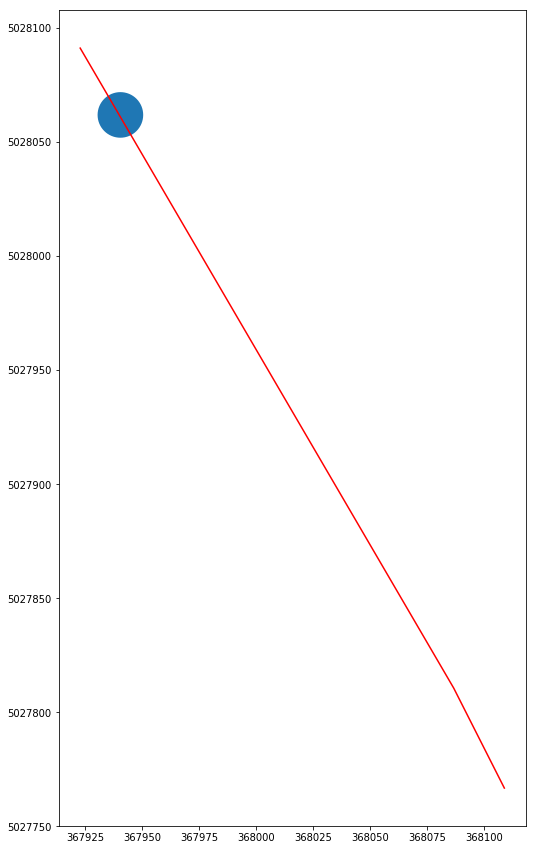

In [94]:
point = collision_data_noninter[collision_data_noninter['Record'] == 38017]
point.reset_index(drop=True, inplace=True)

line = roads[roads['ROW_NUMBER'] == 16625]
line.reset_index(drop=True, inplace=True)

print("Number of Lines:" + str(len(line)))
print("Number de Points:" + str(len(point)))

point_buffer = point.buffer(10.0)

x = line.intersects(point_buffer)

print(x)

base = point.plot(figsize =(15.0,15.0),color = 'blue')
point_buffer.plot(ax = base)
line.plot(ax = base, color = 'red')

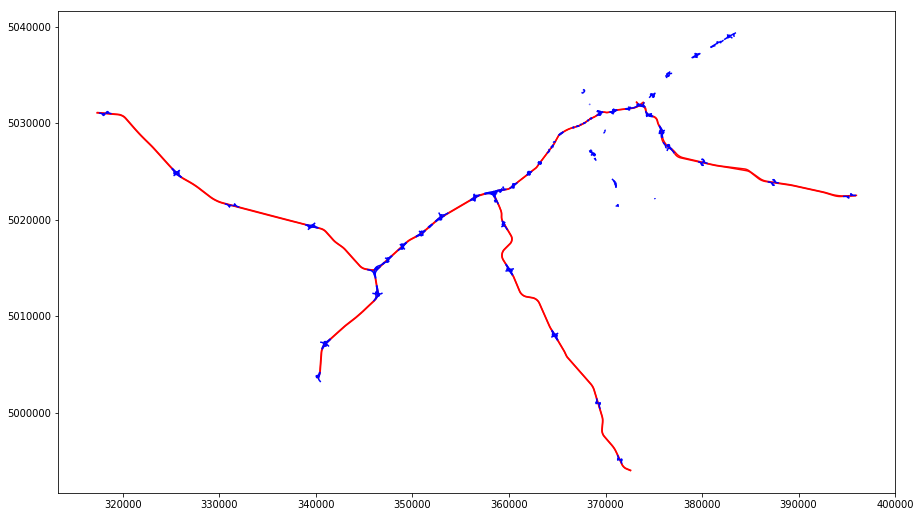

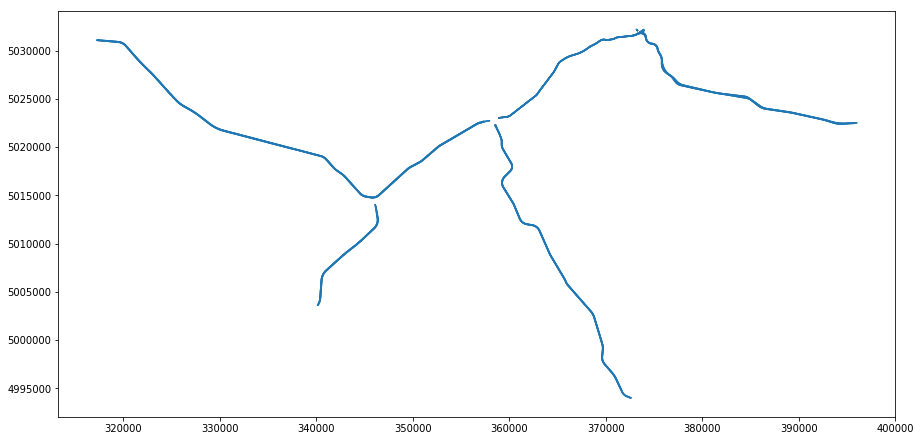

In [81]:
highway = roads[roads['SUBCLASS'] == 'HIGHWAY']
base = highway.plot(figsize =(15.0,15.0),color = 'red')

ramp = roads[roads['SUBCLASS'] == 'RAMP']
ramp.plot(ax = base, figsize =(15.0,15.0),color = 'blue')

intersections = gpd.sjoin(highway, highway, how = 'inner' , op = 'intersects')
intersections.plot(figsize =(15.0,15.0))

## Tiles Neighborhood

In [82]:
city_limits_tiles_centroid = city_limits_tiles.copy()
city_limits_tiles_centroid.geometry = city_limits_tiles.centroid

city_limits_tiles_centroid['ONS_ID'] = ""
city_limits_tiles_centroid['ONS_NAME'] = ""

city_limits_tiles_centroid = assing_nearest_area_by_whithin(city_limits_tiles_centroid,boundaries)
city_limits_tiles_centroid.head()

Start Time:2019-02-21 21:15:59
Number of items to Assign:3068
Checking Roads for Area:Orleans Industrial
  Number of Roads No Assigned (Empty ONS_ID):3068 %:100.0
  Number of Roads to be Assigned (Match Current Area):1
Iteration Time:0:00:00
Checking Roads for Area:Beechwood Cemetery
  Number of Roads No Assigned (Empty ONS_ID):3067 %:99.96740547588006
  Number of Roads to be Assigned (Match Current Area):1
Iteration Time:0:00:00
Checking Roads for Area:Notre-Dame Cemetery
  Number of Roads No Assigned (Empty ONS_ID):3066 %:99.9348109517601
  Number of Roads to be Assigned (Match Current Area):0
Iteration Time:0:00:00
Checking Roads for Area:Carleton University
  Number of Roads No Assigned (Empty ONS_ID):3066 %:99.9348109517601
  Number of Roads to be Assigned (Match Current Area):1
Iteration Time:0:00:00
Checking Roads for Area:Lebreton Development
  Number of Roads No Assigned (Empty ONS_ID):3065 %:99.90221642764016
  Number of Roads to be Assigned (Match Current Area):1
Iteration T

  Number of Roads to be Assigned (Match Current Area):168
Iteration Time:0:00:00
Checking Roads for Area:Greenboro East
  Number of Roads No Assigned (Empty ONS_ID):1998 %:65.1238591916558
  Number of Roads to be Assigned (Match Current Area):2
Iteration Time:0:00:00
Checking Roads for Area:Hawthorne Meadows - Sheffield Glen
  Number of Roads No Assigned (Empty ONS_ID):1996 %:65.05867014341591
  Number of Roads to be Assigned (Match Current Area):1
Iteration Time:0:00:00
Checking Roads for Area:Hintonburg - Mechanicsville
  Number of Roads No Assigned (Empty ONS_ID):1995 %:65.02607561929597
  Number of Roads to be Assigned (Match Current Area):1
Iteration Time:0:00:00
Checking Roads for Area:Hunt Club - Ottawa Airport
  Number of Roads No Assigned (Empty ONS_ID):1994 %:64.99348109517601
  Number of Roads to be Assigned (Match Current Area):15
Iteration Time:0:00:00
Checking Roads for Area:Hunt Club East - Western Community
  Number of Roads No Assigned (Empty ONS_ID):1979 %:64.50456323

Iteration Time:0:00:00
Checking Roads for Area:Skyline - Fisher Heights
  Number of Roads No Assigned (Empty ONS_ID):300 %:9.778357235984359
  Number of Roads to be Assigned (Match Current Area):1
Iteration Time:0:00:00
Checking Roads for Area:South Keys - Greenboro West
  Number of Roads No Assigned (Empty ONS_ID):299 %:9.745762711864403
  Number of Roads to be Assigned (Match Current Area):3
Iteration Time:0:00:00
Checking Roads for Area:Stittsville
  Number of Roads No Assigned (Empty ONS_ID):296 %:9.647979139504558
  Number of Roads to be Assigned (Match Current Area):25
Iteration Time:0:00:00
Checking Roads for Area:Tanglewood
  Number of Roads No Assigned (Empty ONS_ID):271 %:8.833116036505873
  Number of Roads to be Assigned (Match Current Area):2
Iteration Time:0:00:00
Checking Roads for Area:Trend - Arlington
  Number of Roads No Assigned (Empty ONS_ID):269 %:8.767926988265973
  Number of Roads to be Assigned (Match Current Area):2
Iteration Time:0:00:00
Checking Roads for Are

left     bottom     right        top TILE_ID  \
0  316000.0  5028000.0  317000.0  5029000.0       1   
1  316000.0  5029000.0  317000.0  5030000.0       2   
2  316000.0  5030000.0  317000.0  5031000.0       3   
3  317000.0  5027000.0  318000.0  5028000.0       4   
4  317000.0  5028000.0  318000.0  5029000.0       5   

                                      geometry ONS_ID ONS_NAME  
0    POINT (316993.73274351 5028993.219264926)                  
1   POINT (316688.666410125 5029658.485085732)                  
2  POINT (316712.1180656129 5030270.064814161)                  
3  POINT (317967.3406510823 5027964.575193623)     40  Galetta  
4    POINT (317657.93994177 5028637.373844731)     40  Galetta

In [83]:
city_limits_tiles['ONS_ID'] = city_limits_tiles_centroid['ONS_ID']
city_limits_tiles['ONS_NAME'] = city_limits_tiles_centroid['ONS_NAME']

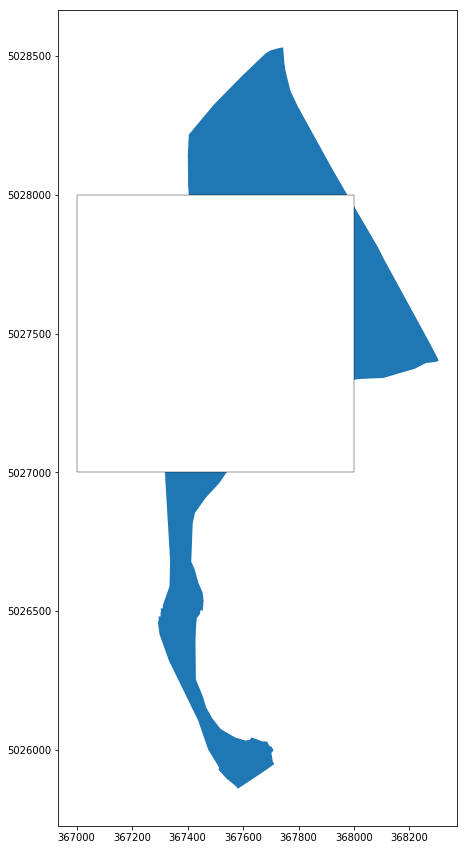

In [84]:
base = boundaries[boundaries['Name']== 'Carleton University'].plot(figsize =(15.0,15.0))
city_limits_tiles[city_limits_tiles['ONS_NAME'] == 'Carleton University'].plot(ax = base, color='white', edgecolor='black',figsize =(15.0,15.0),linewidth=0.4)